In [3]:

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the RDS file
readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/Cloudstorage/Dropbox/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)  # Convert to pandas DataFrame


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from clust_huge_amp import *
from fig5utils import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/')
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_7726/3000481659.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/Li


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [5]:
checkpoint_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_model_W0.0001_jointphi.pt'
checkpoint_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_0_10000/model.pt'
checkpoint = torch.load(checkpoint_path)
#model.load_state_dict(checkpoint['model_state_dict'])
cov_df=pce_df


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_7726/3057814312.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


In [5]:
def create_enhanced_calibration_plot(checkpoint_path, cov_df, n_bins=10, use_log_scale=True, min_bin_count=1000, save_path=None):
    """Create an enhanced calibration plot with modern styling and clear visualization."""
    # [Previous loading and calculation code remains the same until plotting]
    """Create calibration plots comparing predicted vs observed event rates for at-risk individuals.
    
    Args:
        checkpoint_path: Path to model checkpoint
        cov_df: DataFrame containing enrollment ages
        n_bins: Number of bins for calibration
        use_log_scale: Whether to use log-scale binning (recommended for rare events)
        min_bin_count: Minimum number of samples per bin
        save_path: Path to save plot
    """
    # Load checkpoint
    checkpoint = torch.load(checkpoint_path)
    state_dict = checkpoint['model_state_dict']
    
    # Get parameters from state dict
    lambda_ = state_dict['lambda_']  # Shape: (N, K, T)
    phi = state_dict['phi']  # Shape: (K, D, T)
    kappa = state_dict['kappa']  # Shape: scalar
    Y = checkpoint['Y']  # Shape: (N, D, T)
    
    # Calculate theta (normalized lambda)
    theta = torch.softmax(lambda_, dim=1)
    
    # Calculate phi probabilities (sigmoid)
    phi_prob = torch.sigmoid(phi)
    
    # Calculate pi (disease probabilities)
    pi = torch.einsum('nkt,kdt->ndt', theta, phi_prob) * kappa
    
    # Convert to numpy
    pi_np = pi.detach().numpy()
    Y_np = Y.detach().numpy()
    
    N, D, T = Y_np.shape
    
    # Create at_risk mask
    at_risk = np.ones_like(Y_np, dtype=bool)
    for n in range(N):
        for d in range(D):
            event_times = np.where(Y_np[n,d,:])[0]
            if len(event_times) > 0:
                at_risk[n,d,(event_times[0]+1):] = False
    
    # Create two sets of predictions/observations
    
    # 1. Enrollment only
    enroll_pred = []
    enroll_obs = []
    
    for d in range(D):
        for i, row in enumerate(cov_df.itertuples()):
            enroll_age = row.age
            enroll_time = int(enroll_age - 30)  # Convert age to time index
            
            if enroll_time < 0 or enroll_time >= T:
                continue
                
            if at_risk[i,d,enroll_time]:
                enroll_pred.append(pi_np[i,d,enroll_time])
                enroll_obs.append(Y_np[i,d,enroll_time])
    
    # 2. All follow-up
    all_pred = []
    all_obs = []
    
    for t in range(T):
        mask_t = at_risk[:,:,t]
        if mask_t.sum() > 0:
            all_pred.extend(pi_np[:,:,t][mask_t])
            all_obs.extend(Y_np[:,:,t][mask_t])
    
    # Set modern style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create figure with enhanced styling
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    
    # Use a modern color palette
    colors = sns.color_palette("husl", 2)
    
    def plot_calibration(pred, obs, ax):
        # Create bins in log or linear space
        if use_log_scale:
            bin_edges = np.logspace(np.log10(max(1e-7, min(pred))), 
                                  np.log10(max(pred)), 
                                  n_bins + 1)
        else:
            bin_edges = np.linspace(min(pred), max(pred), n_bins + 1)
        
        # Calculate statistics for each bin
        bin_means = []
        obs_means = []
        counts = []
        
        for i in range(n_bins):
            mask = (pred >= bin_edges[i]) & (pred < bin_edges[i + 1])
            if np.sum(mask) >= min_bin_count:
                bin_means.append(np.mean(pred[mask]))
                obs_means.append(np.mean(obs[mask]))
                counts.append(np.sum(mask))
        
        # Plot perfect calibration line
        if use_log_scale:
            ax.plot([1e-7, 1], [1e-7, 1], '--', color='gray', alpha=0.5, 
                   label='Perfect calibration', linewidth=2)
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:
            ax.plot([0, max(pred)], [0, max(pred)], '--', color='gray', alpha=0.5, 
                   label='Perfect calibration', linewidth=2)
        
        # Plot calibration curve with enhanced styling
        ax.plot(bin_means, obs_means, 'o-', color=colors[0], 
                markersize=10, linewidth=2.5, label='Observed rates',
                markerfacecolor='white', markeredgewidth=2)
        
        # Add counts as annotations with improved styling
        for i, (x, y, c) in enumerate(zip(bin_means, obs_means, counts)):
            ax.annotate(f'n={c:,}', (x, y), xytext=(0, 10), 
                       textcoords='offset points', ha='center', 
                       fontsize=9, fontweight='bold',
                       bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Add summary statistics with enhanced styling
        mse = np.mean((np.array(bin_means) - np.array(obs_means))**2)
        mean_pred = np.mean(pred)
        mean_obs = np.mean(obs)
        
        stats_text = f'MSE: {mse:.2e}\n'
        stats_text += f'Mean Predicted: {mean_pred:.2e}\n'
        stats_text += f'Mean Observed: {mean_obs:.2e}\n'
        stats_text += f'N total: {sum(counts):,}'
        
        ax.text(0.05, 0.95, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', 
                         edgecolor='gray', alpha=0.8))
        
        # Enhanced grid and labels
        ax.grid(True, which='both', linestyle='--', alpha=0.3)
        ax.set_xlabel('Predicted Event Rate', fontsize=12, fontweight='bold')
        ax.set_ylabel('Observed Event Rate', fontsize=12, fontweight='bold')
        ax.set_title('Calibration Across All Follow-up\n(At-Risk Only)', 
                    fontsize=14, pad=20, fontweight='bold')
        
        # Enhanced legend
        ax.legend(loc='lower right', frameon=True, 
                 facecolor='white', edgecolor='gray')
        
        # Add subtle background color
        ax.set_facecolor('#f8f9fa')
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # Create the plot
    plot_calibration(np.array(all_pred), np.array(all_obs), ax)
    
    plt.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    
    return fig

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_25088/2777476358.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


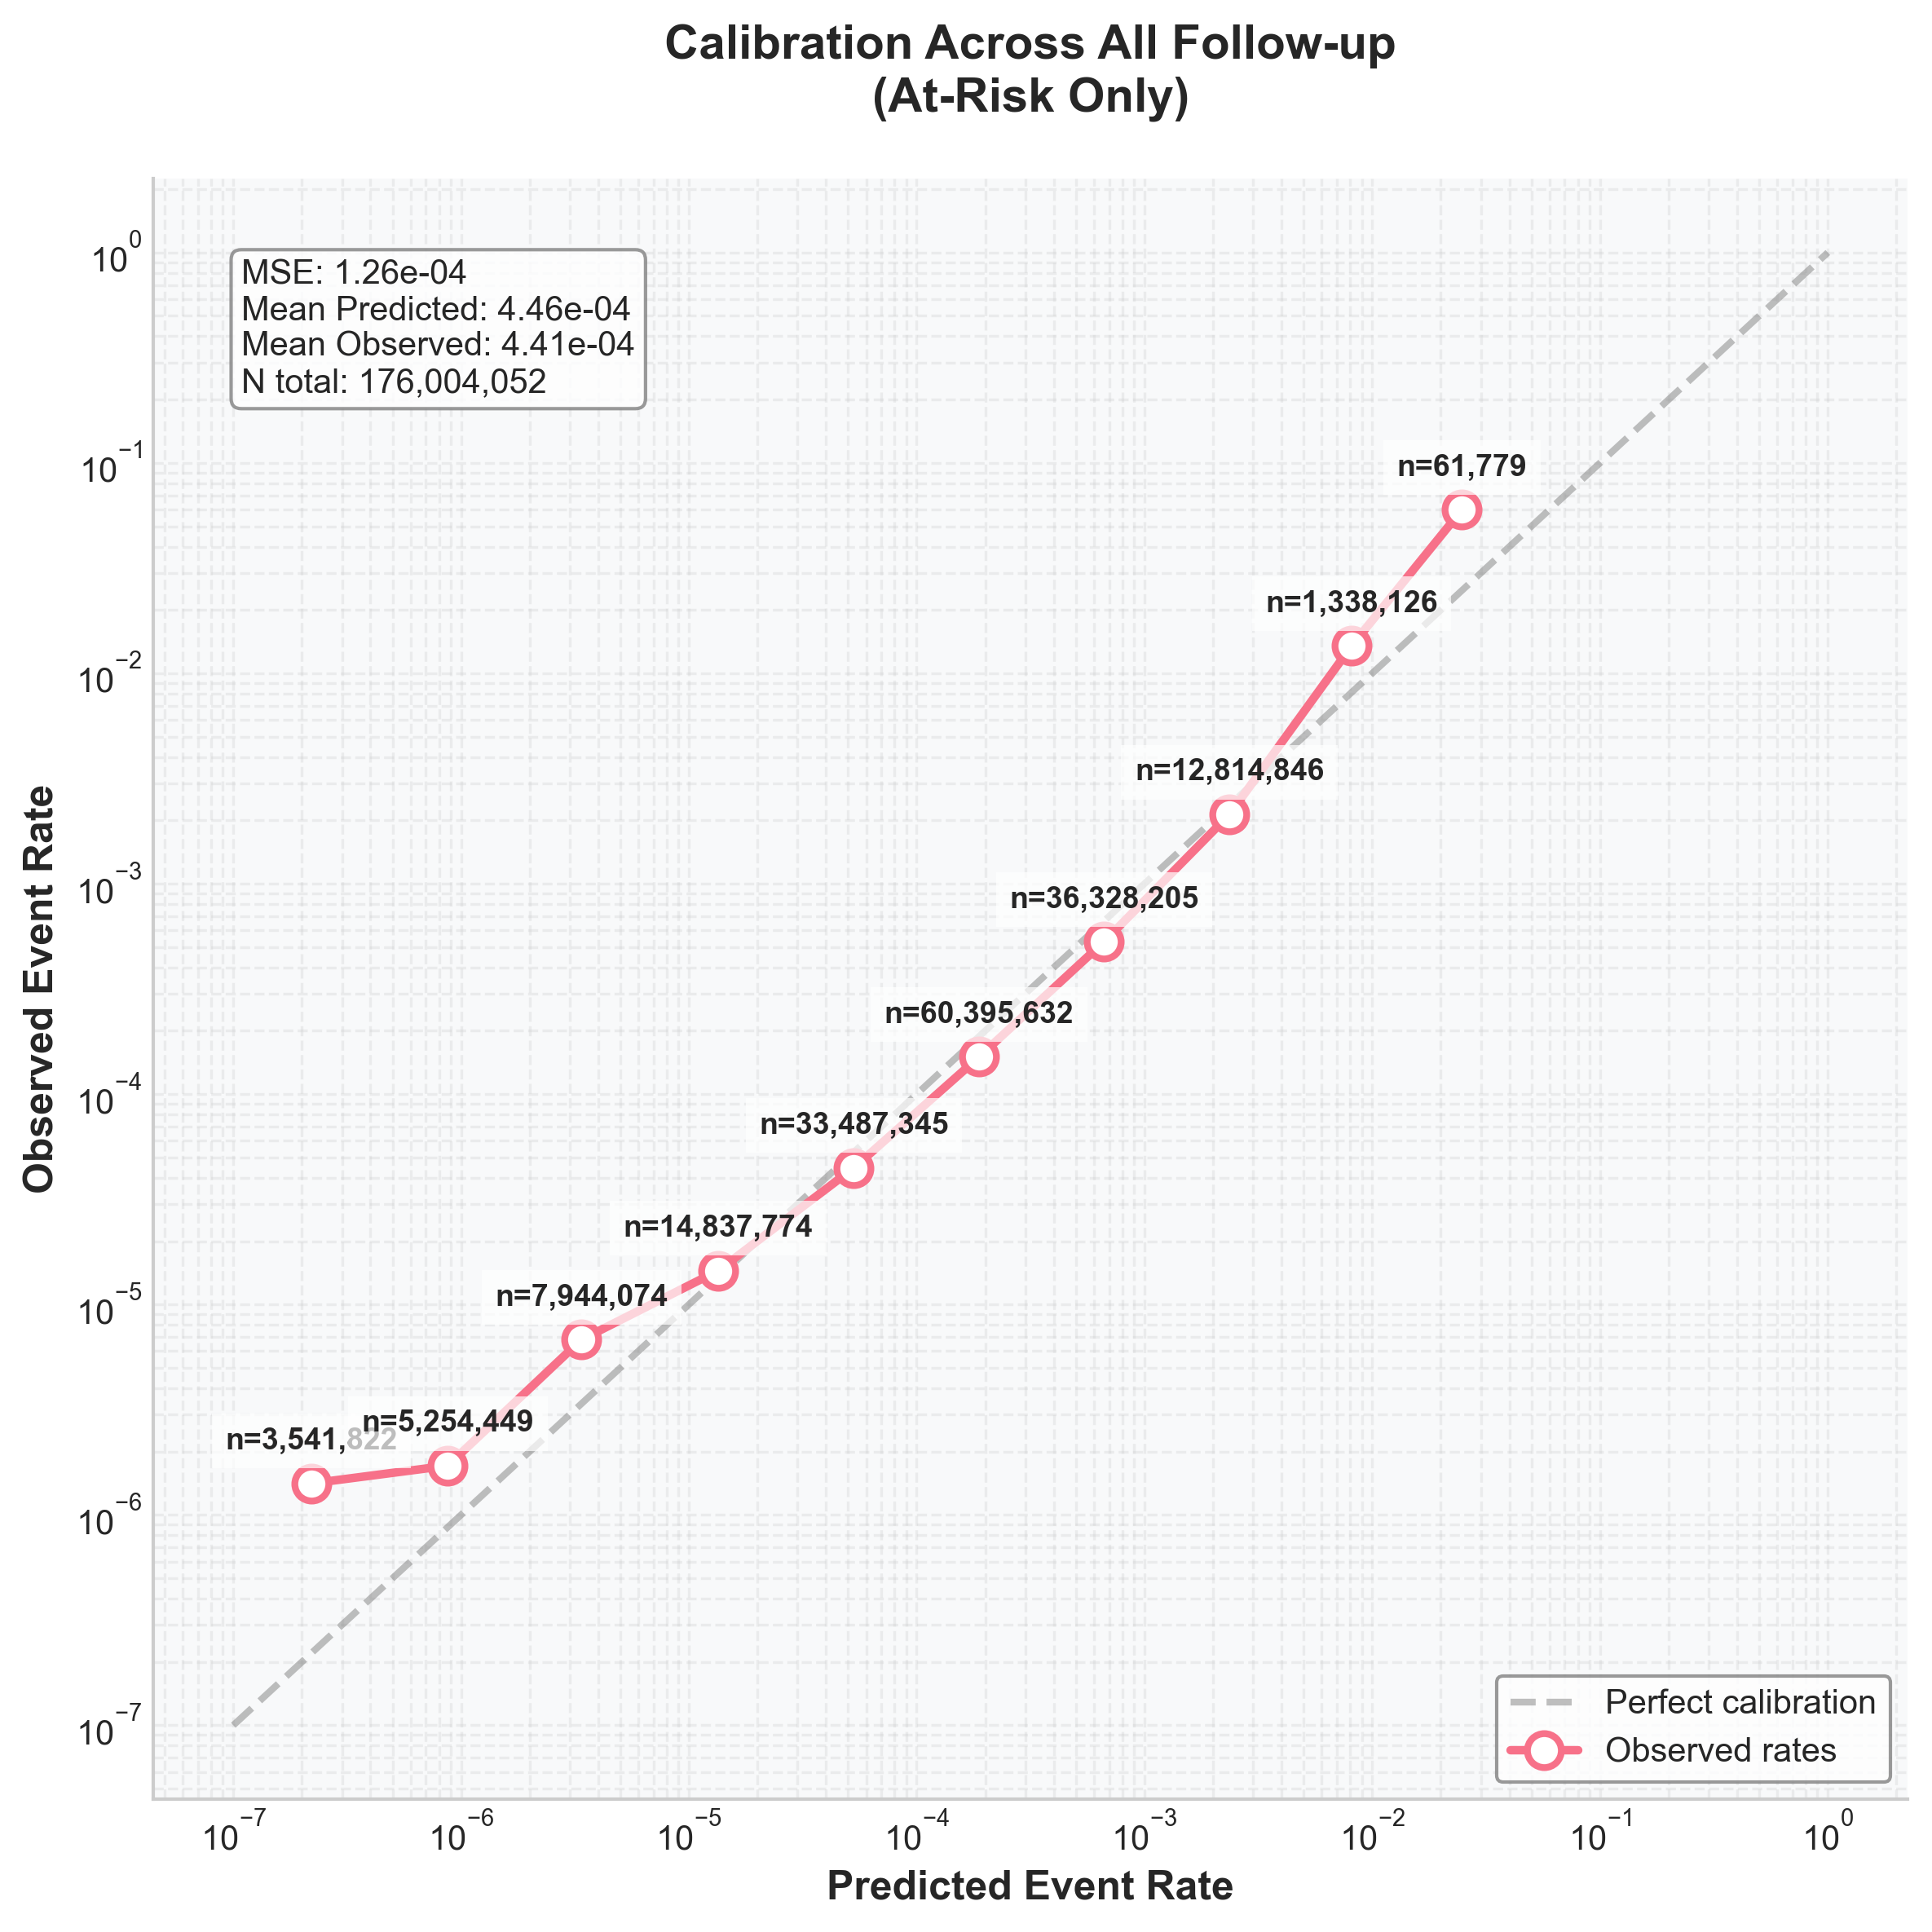

In [6]:
fig = create_enhanced_calibration_plot(
    checkpoint_path=checkpoint_path,
    cov_df=cov_df,
    save_path='calibration_plot.pdf'
)

In [12]:

mu_dt = torch.load(checkpoint_path)['prevalence_t']


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/2842720863.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mu_dt = torch.load(checkpoint_path)['prevalen

In [13]:
from fig5utils import *


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:2680: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  # Calculate phi probabilities (sigmoid)


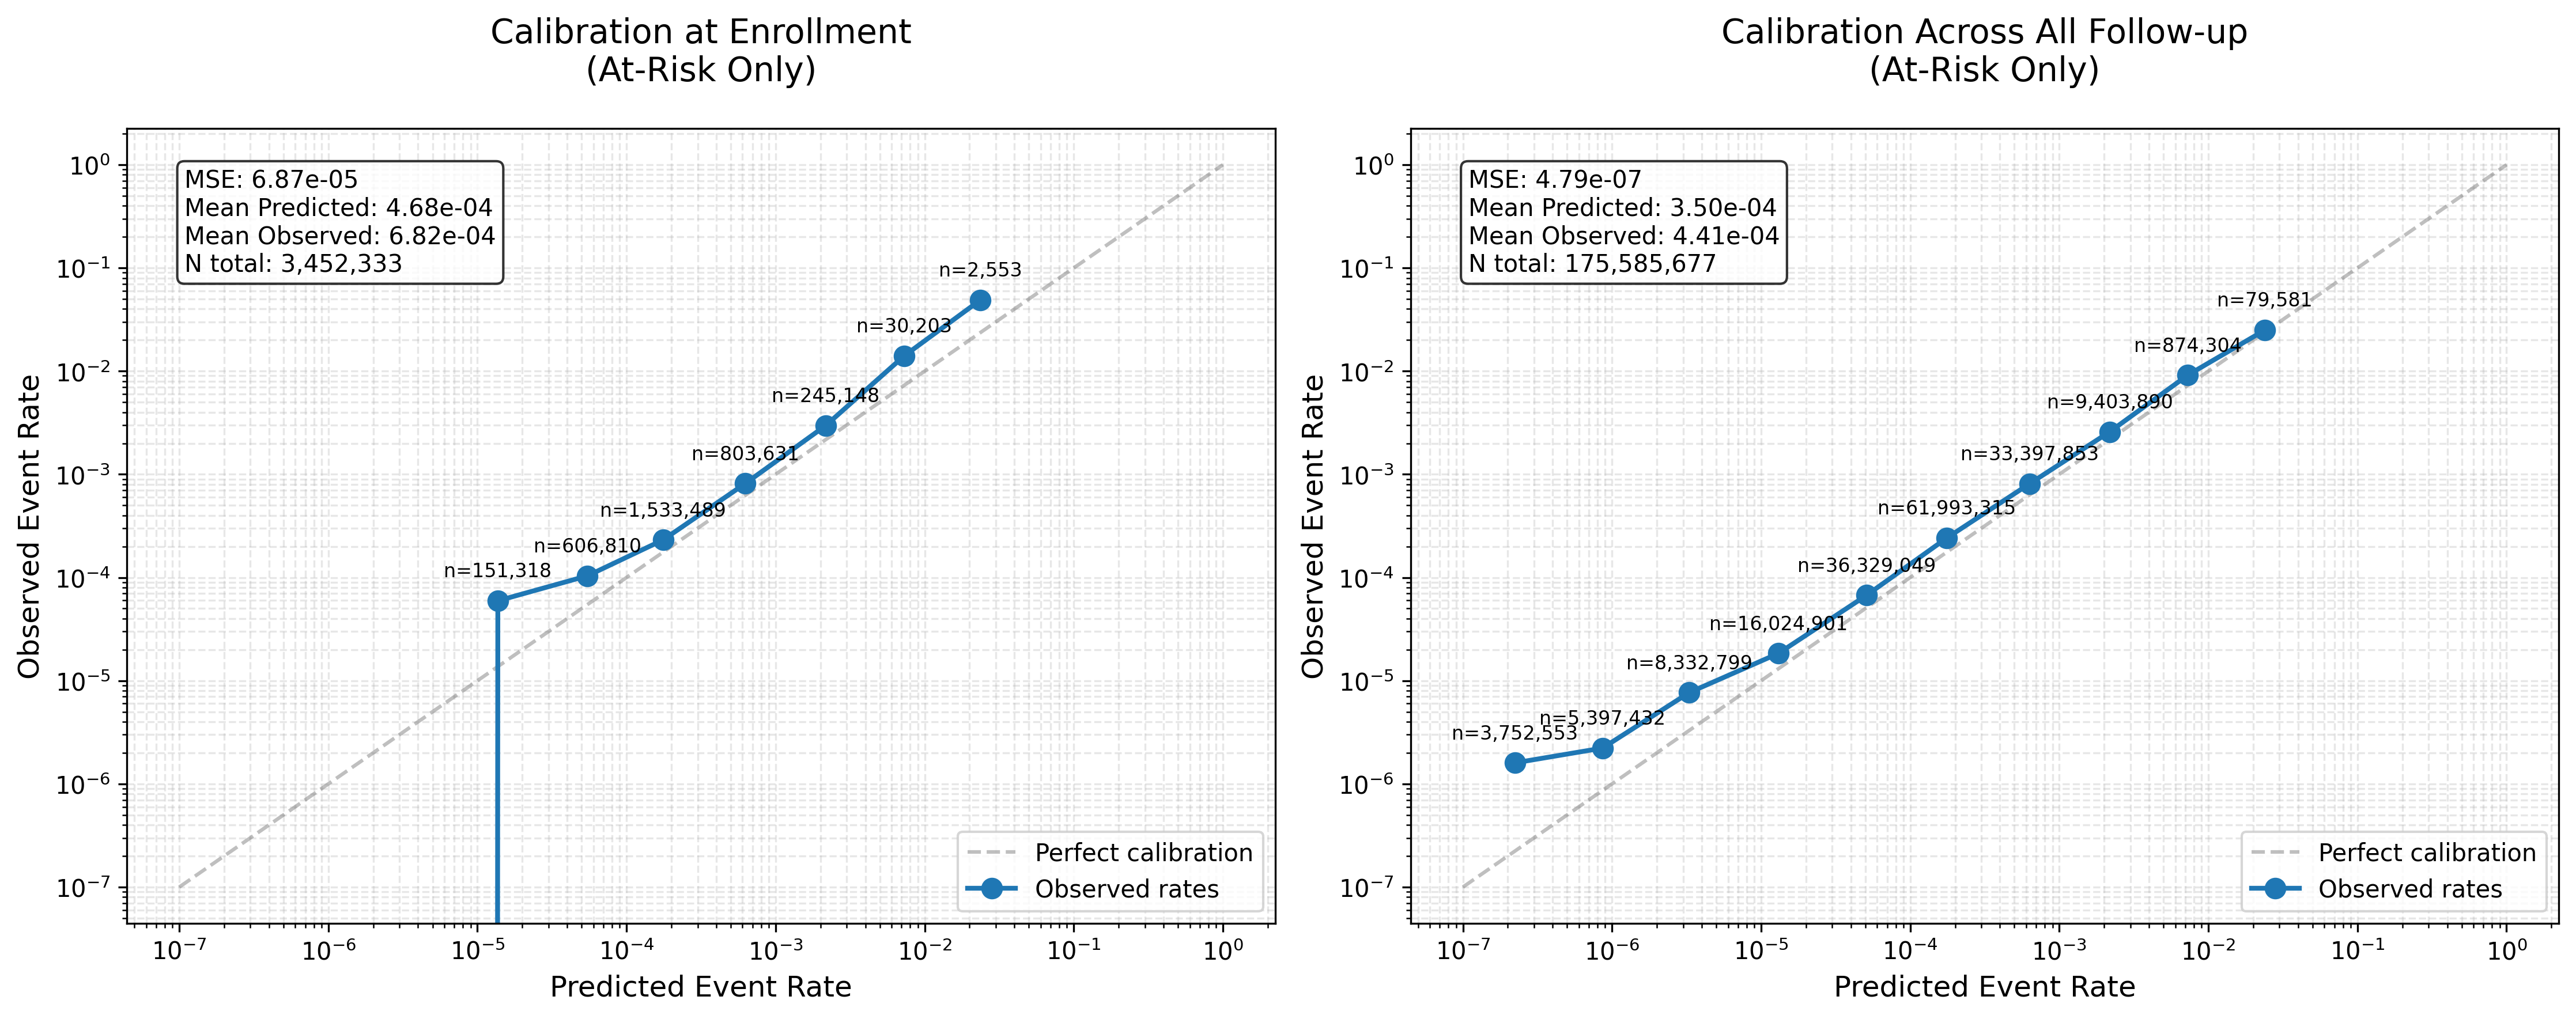

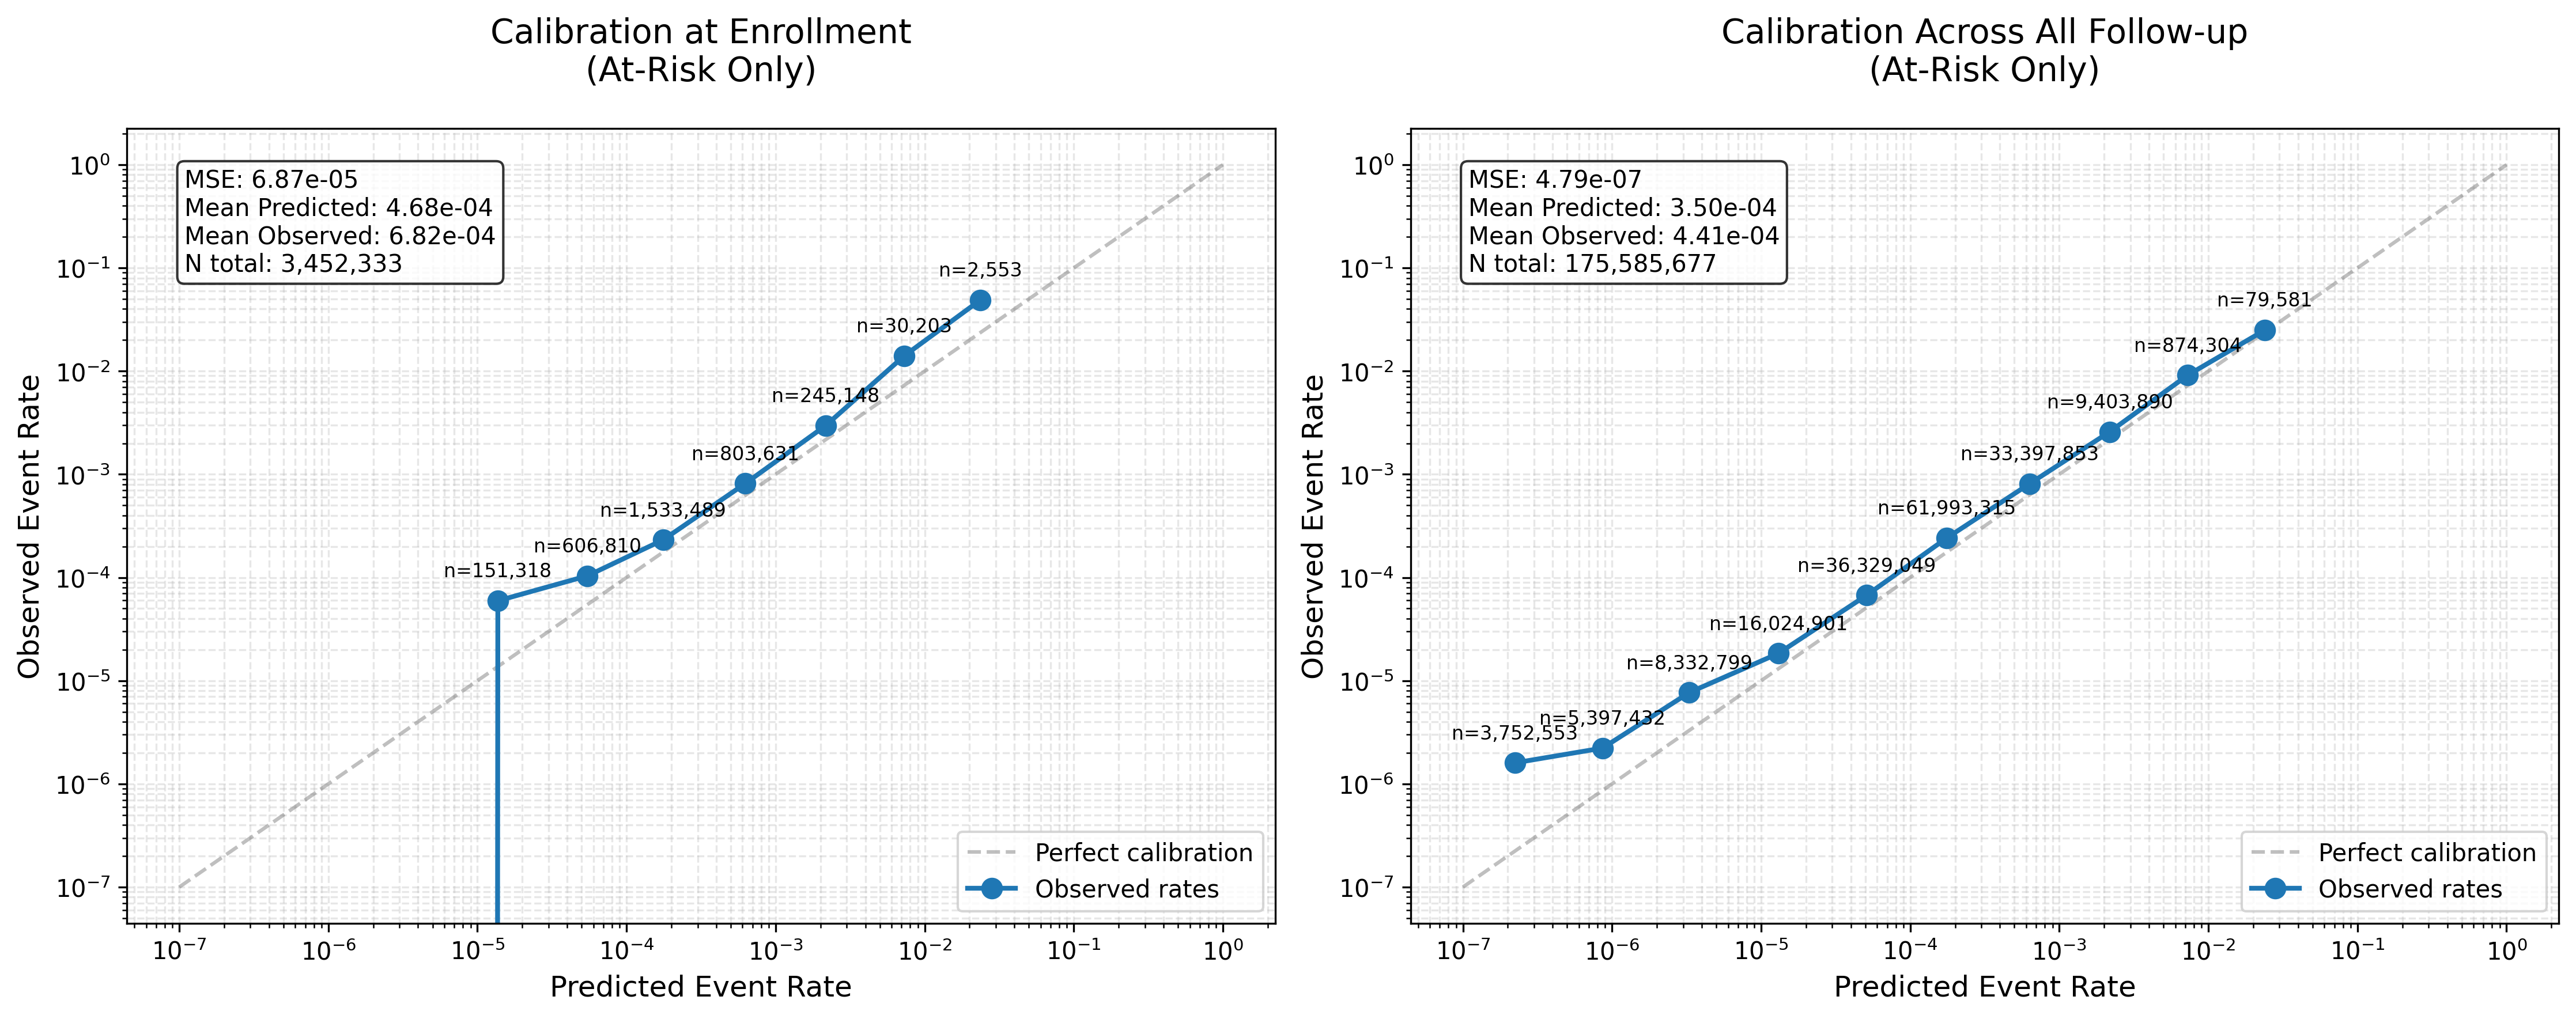

In [17]:
create_proper_calibration_plots(checkpoint_path, pce_df, n_bins=10, use_log_scale=True, min_bin_count=1000, save_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure5/calibration_plot.pdf")

/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


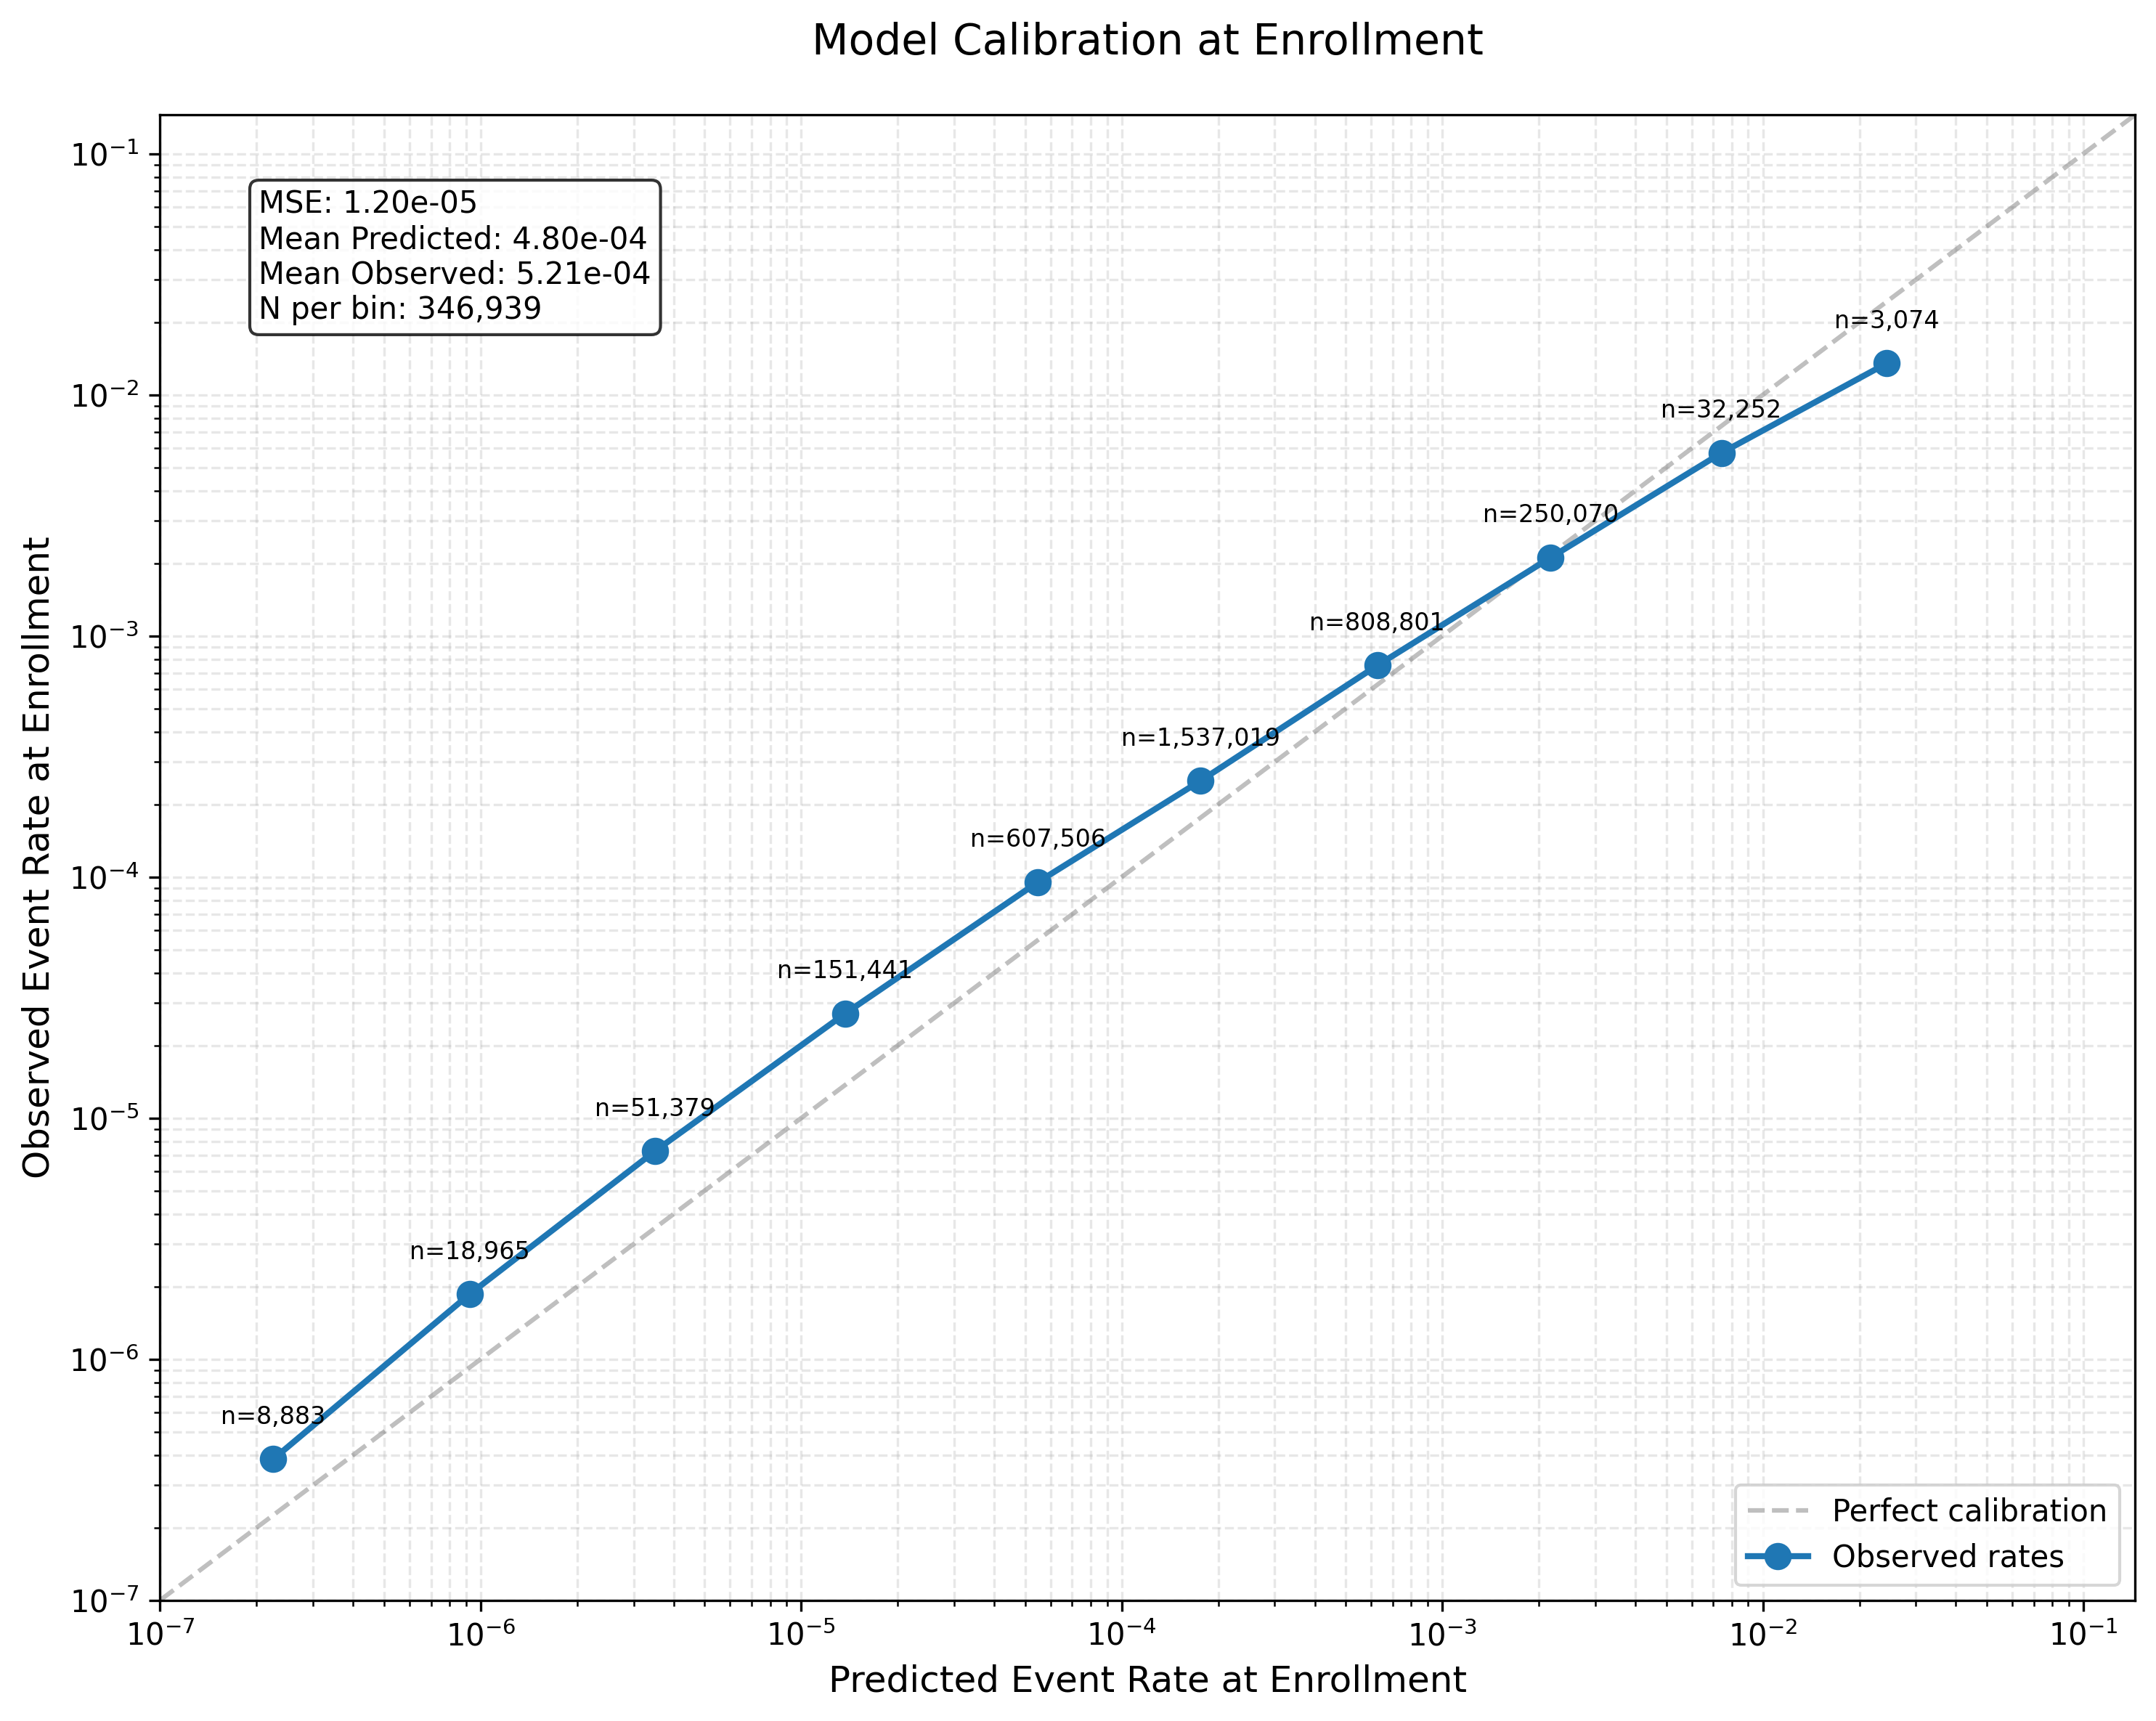

In [18]:
fig = create_traditional_calibration_plot(
    checkpoint_path=checkpoint_path,
    #Y=checkpoint['Y'],
    cov_df=pce_df,
    mu_dt=checkpoint['prevalence_t'], 
    n_bins=10,
    save_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure5/calibration_plot.pdf' # smoothed prevalence rates
    #use_log_scale=True
)

In [6]:
# Example calls:
from fig5utils import *
checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific.pt'
#checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_fulldata_sexspecific.pt'
checkpoint = torch.load(checkpoint_path)


original_G = G # Store the original G - proper tensor copy

Y_100k, E_100k, G_100k, indices = subset_data(Y,E,G, start_index=0, end_index=10000)
G_100k=checkpoint['G']
torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/Cloudstorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
model.load_state_dict(checkpoint['model_state_dict'])

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_7726/928816939.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/var/f


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0008,  0.0071,  0.0117,  0.0152, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

<All keys matched successfully>

In [ ]:
evaluate_major_diseases_wsex_with_bootstrap()

In [224]:
W=0.0001
model_save_path=f'/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_model_W{W}.pt'
checkpoint_fixed=torch.load(model_save_path)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3384838550.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_fixed=torch.load(model_save_path)


In [225]:
checkpoint_fixed['model_state_dict']

OrderedDict([('kappa', tensor([2.3783])),
             ('gamma',
              tensor([[ 2.5653e-03,  3.8026e-03,  3.4959e-03,  8.1386e-03,  2.2573e-04,
                       -3.9014e-03, -8.6537e-04,  2.0647e-03, -1.0775e-02,  9.5915e-04,
                        3.3302e-03, -4.7947e-04, -1.3121e-03, -2.6187e-03, -3.4424e-03,
                        1.5244e-03,  9.8892e-04,  2.3636e-03, -6.8613e-03, -1.1703e-02,
                        0.0000e+00],
                      [-2.3258e-04, -1.0582e-03, -2.9635e-03,  1.7352e-03, -9.3064e-04,
                       -4.2254e-03,  2.3330e-04,  2.2864e-03,  6.7435e-03, -4.1425e-03,
                       -5.2778e-04,  9.1564e-04,  7.2152e-05,  5.0734e-03, -2.8507e-04,
                        1.8931e-03, -1.7598e-03, -1.0145e-02,  2.9016e-04,  2.2372e-03,
                        0.0000e+00],
                      [-3.6116e-03, -1.6112e-03,  3.7788e-03,  1.0820e-02, -2.8141e-03,
                       -5.0312e-03, -1.3019e-04, -1.0119e-03,  9.2593

In [226]:

mu_dt = torch.load(checkpoint_path)['prevalence_t']
# Evaluate using default 10-year outcome window
results_10yr = evaluate_major_diseases_wsex(model, Y_100k, E_100k, model.disease_names, pce_df) 


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/6529206.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mu_dt = torch.load(checkpoint_path)['prevalence_


Evaluating ASCVD (10-Year Outcome, 1-Year Score)...
AUC (Score: 1-Yr Risk, Outcome: 10-Yr Event): 0.6950077951933207 (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (10-Year Outcome, 1-Year Score)...
AUC (Score: 1-Yr Risk, Outcome: 10-Yr Event): 0.6268843745905619 (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (10-Year Outcome, 1-Year Score)...
AUC (Score: 1-Yr Risk, Outcome: 10-Yr Event): 0.6820512080208818 (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (10-Year Outcome, 1-Year Score)...
AUC (Score: 1-Yr Risk, Outcome: 10-Yr Event): 0.707499096021954 (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 207 (2.1%) (from 10000 in

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 1. Build treatment indicator and covariate DataFrame
all_eids = np.concatenate([list(treated_time_idx.keys()), untreated_eids])
treatment = np.array([1]*len(treated_time_idx) + [0]*len(untreated_eids))

covariate_cols = ['sex', 'age_at_enroll'] + [f'PC{i}' for i in range(1, 21)]  # adjust as needed
cov_df = cov.set_index('eid').loc[all_eids, covariate_cols].reset_index()
cov_df['treatment'] = treatment

# 2. Fit propensity score model
X = cov_df[covariate_cols].values
y = cov_df['treatment'].values
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X, y)
cov_df['ps'] = ps_model.predict_proba(X)[:,1]

# 3. Compute IPW weights
cov_df['weight'] = np.where(
    cov_df['treatment'] == 1,
    1 / cov_df['ps'],
    1 / (1 - cov_df['ps'])
)

# 4. For each individual, get event in post-treatment window
eid_to_idx = {eid: np.where(processed_ids == eid)[0][0] for eid in all_eids}
window_post = 10
event_col = []
for i, row in cov_df.iterrows():
    eid = row['eid']
    treat = row['treatment']
    if treat == 1:
        t0 = treated_time_idx[eid]
    else:
        t0 = int(age_at_enroll.get(eid, 0) - 30)
    idx = eid_to_idx[eid]
    if t0 + window_post < Y.shape[2]:
        event = int(np.any(Y[idx, disease_idx, t0:t0+window_post] > 0))
    else:
        event = np.nan
    event_col.append(event)
cov_df['event'] = event_col

# 5. Weighted event rates
treated_mask = (cov_df['treatment'] == 1) & (~cov_df['event'].isna())
untreated_mask = (cov_df['treatment'] == 0) & (~cov_df['event'].isna())

weighted_treated_rate = np.sum(cov_df.loc[treated_mask, 'event'] * cov_df.loc[treated_mask, 'weight']) / np.sum(cov_df.loc[treated_mask, 'weight'])
weighted_untreated_rate = np.sum(cov_df.loc[untreated_mask, 'event'] * cov_df.loc[untreated_mask, 'weight']) / np.sum(cov_df.loc[untreated_mask, 'weight'])

print(f"IPW Treated Event Rate: {weighted_treated_rate*100:.2f}%")
print(f"IPW Untreated Event Rate: {weighted_untreated_rate*100:.2f}%")

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

IPW Treated Event Rate: 3.47%
IPW Untreated Event Rate: 2.77%


In [ ]:
import pandas as pd

# Create DataFrame from both results
df_compare = []
for disease in aladynoulli_results_boot.keys():
    aladyn = aladynoulli_results_boot[disease]
    cox = test_results.get(disease, {})
    
    row = {
        'Disease': disease,
        'Aladynoulli_AUC': f"{aladyn['auc']:.3f} ({aladyn['ci_lower']:.3f}-{aladyn['ci_upper']:.3f})",
        'Cox_Concordance': f"{cox.get('c_index', np.nan):.3f} ({cox.get('ci', (np.nan, np.nan))[0]:.3f}-{cox.get('ci', (np.nan, np.nan))[1]:.3f})" if cox.get('c_index') is not None else "N/A",
        'Events': aladyn['n_events'],
        'Rate': f"{aladyn['event_rate']:.1f}%"
    }
    df_compare.append(row)

df_compare = pd.DataFrame(df_compare)

# Sort by number of events descending
df_compare = df_compare.sort_values('Events', ascending=False)

# Save to CSV for R
df_compare.to_csv('model_comparison_results.csv', index=False)

# Display nicely formatted table in Python
print("\nModel Comparison Results:")
print("-" * 100)
print(df_compare.to_string(index=False))


Model Comparison Results:
----------------------------------------------------------------------------------------------------
             Disease     Aladynoulli_AUC     Cox_Concordance  Events Rate
               ASCVD 0.712 (0.693-0.724) 0.650 (0.630-0.668)     831 8.3%
              Asthma 0.511 (0.485-0.532) 0.520 (0.502-0.539)     606 6.1%
            Diabetes 0.622 (0.606-0.636) 0.606 (0.580-0.628)     581 5.8%
              Anemia 0.593 (0.577-0.613) 0.549 (0.517-0.573)     523 5.2%
         All_Cancers 0.680 (0.664-0.699) 0.615 (0.587-0.641)     480 4.8%
   Thyroid_Disorders 0.579 (0.561-0.601) 0.649 (0.634-0.666)     479 4.8%
          Depression 0.470 (0.449-0.498) 0.559 (0.535-0.584)     405 4.0%
                COPD 0.646 (0.616-0.666) 0.535 (0.510-0.568)     394 3.9%
          Atrial_Fib 0.684 (0.657-0.707) 0.584 (0.562-0.610)     376 3.8%
           Pneumonia 0.683 (0.663-0.708) 0.561 (0.530-0.588)     335 3.4%
    Secondary_Cancer 0.607 (0.585-0.636) 0.474 (0.438-0.51

In [6]:
import torch

# Suppose Y_full is a numpy array or torch tensor, and train_indices is a list or numpy array of indices
# If Y_full is a numpy array, convert to torch tensor
Y_full=Y
del Y
if not torch.is_tensor(Y_full):
    Y_full_tensor = torch.tensor(Y_full)
else:
    Y_full_tensor = Y_full

train_indices=np.arange(20000, 30000)
# Subset
Y_train_tensor = Y_full_tensor[train_indices]

# Save to file
torch.save(Y_train_tensor, "Y_train_tensor.pt")
print("Saved Y_train_tensor.pt")

Saved Y_train_tensor.pt


In [12]:
E.shape
train_indices=np.arange(0, 400000)
E_full=E[train_indices]

E_full_tensor=torch.tensor(E_full)
E_full_tensor.shape

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_52073/396308931.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  E_full_tensor=torch.tensor(E_full)


torch.Size([400000, 348])

In [14]:
torch.save(E_full_tensor, "E_full_tensor.pt")
print("Saved E_full_tensor.pt")

Saved E_full_tensor.pt


In [63]:
fh_processed=pd.read_csv('/Users/sarahurbut/Library/Cloudstorage/Dropbox/baselinagefamh.csv')

In [15]:
train_indices=np.arange(20000, 30000)
FH_train = fh_processed.iloc[train_indices].reset_index(drop=True)
FH_train.shape
FH_train.tail()

identifier  age  sex  heart_disease  stroke  lung_cancer  bowel_cancer  \
9995     1370039   50    1            0.0     0.0          0.0           0.0   
9996     1370047   54    0            1.0     0.0          0.0           0.0   
9997     1370053   45    0            0.0     0.0          0.0           0.0   
9998     1370064   52    1            0.0     0.0          0.0           0.0   
9999     1370072   62    0            0.0     0.0          0.0           0.0   

      breast_cancer  copd  hypertension  ...  bowel_cancer.1  breast_cancer.1  \
9995            0.0   0.0           0.0  ...             1.0              0.0   
9996            0.0   0.0           0.0  ...             0.0              0.0   
9997            0.0   0.0           0.0  ...             0.0              0.0   
9998            0.0   0.0           0.0  ...             0.0              0.0   
9999            0.0   0.0           0.0  ...             0.0              0.0   

      copd.1  hypertension.1  diabetes.1  alzheimer.1  parkinsons.1  \
9995     0.0             0.0         0.0          0.0           0.0   
9996     0.0             0.0         0.0          0.0           0.0   
9997     0.0             0.0         0.0          0.0           0.0   
9998     0.0             1.0         0.0          0.0           0.0   
9999     0.0             0.0         0.0          0.0           0.0   

      depression.1  prostate_cancer.1  hip_fracture.1  
9995           0.0                0.0             0.0  
9996           0.0                0.0             0.0  
9997           0.0                0.0             0.0  
9998           0.0                0.0             0.0  
9999           0.0                0.0             0.0  

[5 rows x 29 columns]

In [17]:
pce_df.head()

id  age   race     Sex SmokingStatusv2       tchol        hdl  SBP  \
1  1000015   69  white    Male        Previous  160.440834  38.592420  146   
2  1000023   44  white    Male         Current  238.631089  35.460170  145   
3  1000037   69  white  Female        Previous  265.003865  54.988399  152   
4  1000042   66  white    Male           Never  187.277648  47.911833  130   
5  1000059   54  white  Female        Previous  203.750965  48.221191  152   

   antihtnbase  dm2_prev  dm1_prev  pce_goff  pce_goff_fuull       pce  \
1            0         0         0  0.208619        0.208619  0.236008   
2            0         0         0  0.128707        0.128707  0.133392   
3            0         0         0  0.128959        0.128959  0.126497   
4            0         0         0  0.137629        0.137629  0.132626   
5            0         0         0  0.029323        0.029323  0.029881   

   prevent_base_ascvd_risk  prevent_impute  
1                 0.088804        0.088804  
2                 0.031418        0.031418  
3                 0.073537        0.073537  
4                 0.062329        0.062329  
5                 0.032188        0.032188

In [7]:
# Calculate bootstrap results
from fig5utils import *

checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific_0_10000.pt'
c=torch.load(checkpoint_path)
model.load_state_dict(c['model_state_dict'])
# static model saving 
aladynoulli_results_boot = evaluate_major_diseases_wsex_with_bootstrap(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)
# 6. Evaluate Baseline Models on TEST data <-- UNCOMMENT THIS


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_7726/3567658709.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  c=torch.load(checkpoint_path)



Evaluating ASCVD (10-Year Outcome, 1-Year Score)...
AUC: 0.712 (0.693-0.724) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

   Sex-stratified analysis:
   Female: AUC = 0.668, Events = 273/5409
   Male: AUC = 0.701, Events = 558/4591

   ASCVD risk in patients with pre-existing conditions:
   RA: AUC = 0.681, Events = 8/37
   Breast_Cancer: AUC = 0.630, Events = 13/170

Evaluating Diabetes (10-Year Outcome, 1-Year Score)...
AUC: 0.622 (0.606-0.636) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

   Sex-stratified analysis:
   Female: AUC = 0.611, Events = 264/5409
   Male: AUC = 0.624, Events = 317/4591

Evaluating Atrial_Fib (10-Year Outcome, 1-Year Score)...
AUC: 0.684 (0.657-0.707) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 10000 individuals)
Excluded 13

In [12]:
from debugrisk import *

aladynoulli_results_two = evaluate_major_diseases_wsex_with_bootstrap_return_risks_too(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)
# 6. Evaluate Baseline Models on TEST data <-- UNCOMMENT THIS



Evaluating ASCVD (10-Year Outcome, 1-Year Score)...
AUC: 0.712 (0.689-0.720) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

   Sex-stratified analysis:
   Female: AUC = 0.668, Events = 273/5409
   Male: AUC = 0.701, Events = 558/4591

   ASCVD risk in patients with pre-existing conditions:
   RA: AUC = 0.681, Events = 8/37
   Breast_Cancer: AUC = 0.630, Events = 13/170

Evaluating Diabetes (10-Year Outcome, 1-Year Score)...
AUC: 0.622 (0.608-0.649) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

   Sex-stratified analysis:
   Female: AUC = 0.611, Events = 264/5409
   Male: AUC = 0.624, Events = 317/4591

Evaluating Atrial_Fib (10-Year Outcome, 1-Year Score)...
AUC: 0.684 (0.669-0.707) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 10000 individuals)
Excluded 13

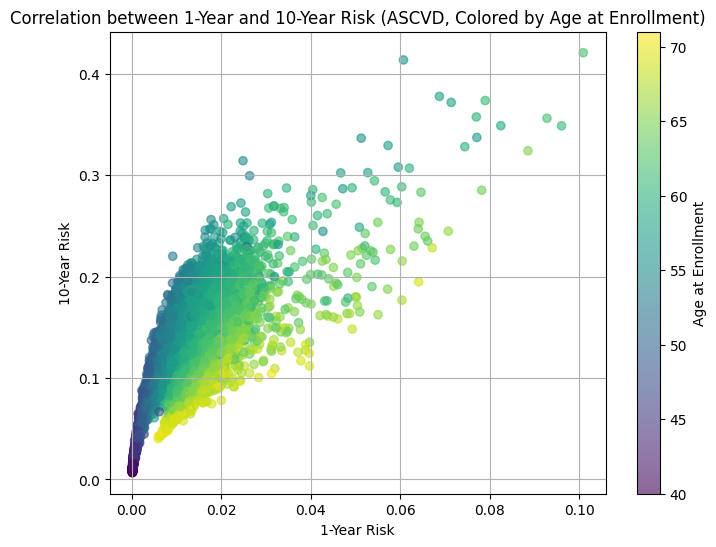

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame as shown:
risk_df = aladynoulli_results_two['ASCVD']['risk_df']

# Scatter plot

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    risk_df['one_year_risk'],
    risk_df['ten_year_risk'],
    c=ages,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('1-Year Risk')
plt.ylabel('10-Year Risk')
plt.title('Correlation between 1-Year and 10-Year Risk (ASCVD, Colored by Age at Enrollment)')
cbar = plt.colorbar(scatter)
cbar.set_label('Age at Enrollment')
plt.grid(True)
plt.show()



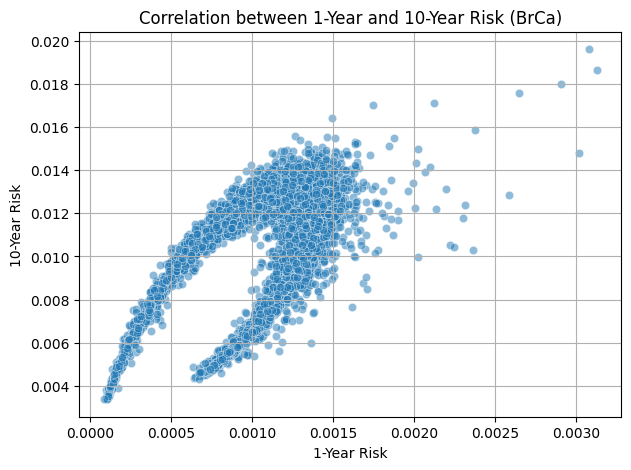

Pearson correlation: 0.605


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame as shown:
risk_df = aladynoulli_results_two['Breast_Cancer']['risk_df']

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x='one_year_risk', y='ten_year_risk', data=risk_df, alpha=0.5)
plt.xlabel('1-Year Risk')
plt.ylabel('10-Year Risk')
plt.title('Correlation between 1-Year and 10-Year Risk (BrCa)')
plt.grid(True)
plt.show()

# Calculate and print the correlation coefficient
corr = risk_df['one_year_risk'].corr(risk_df['ten_year_risk'])
print(f"Pearson correlation: {corr:.3f}")



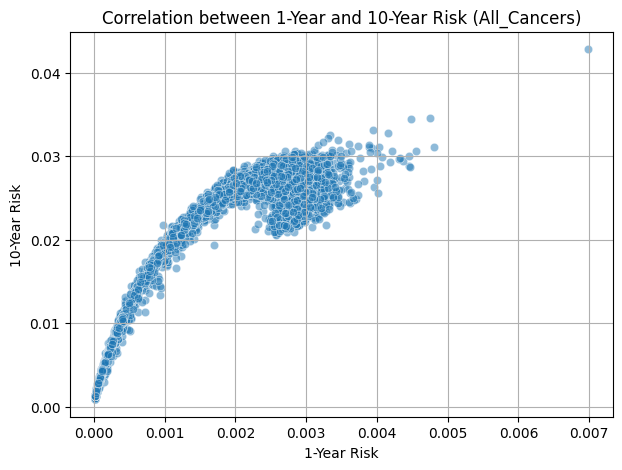

Pearson correlation: 0.907


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame as shown:
risk_df = aladynoulli_results_two['All_Cancers']['risk_df']

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x='one_year_risk', y='ten_year_risk', data=risk_df, alpha=0.5)
plt.xlabel('1-Year Risk')
plt.ylabel('10-Year Risk')
plt.title('Correlation between 1-Year and 10-Year Risk (All_Cancers)')
plt.grid(True)
plt.show()

# Calculate and print the correlation coefficient
corr = risk_df['one_year_risk'].corr(risk_df['ten_year_risk'])
print(f"Pearson correlation: {corr:.3f}")



In [26]:
# Suppose the last possible age in your study is:
T = Y_100k.shape[2]  # total number of time points in your model
pce_df['t_enroll'] = (pce_df['age'] - 30).astype(int)
pce_df['max_followup'] = T - pce_df['t_enroll']

censored_early = pce_df[pce_df['max_followup'] < 10]
print(f"Number of individuals with <10 years possible follow-up: {len(censored_early)}")
print(censored_early[['id', 'age', 'max_followup']])

Number of individuals with <10 years possible follow-up: 0
Empty DataFrame
Columns: [id, age, max_followup]
Index: []


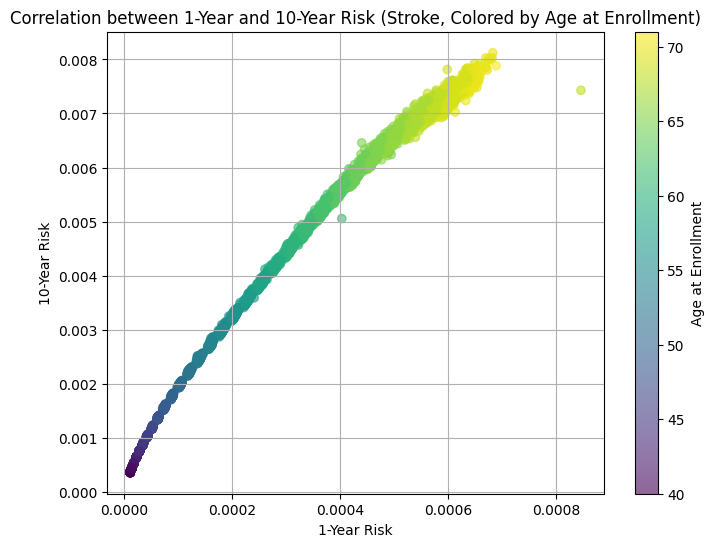

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame as shown:
risk_df = aladynoulli_results_two['Stroke']['risk_df']
ages = pce_df.iloc[risk_df['person_index']]['age'].values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    risk_df['one_year_risk'],
    risk_df['ten_year_risk'],
    c=ages,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('1-Year Risk')
plt.ylabel('10-Year Risk')
plt.title('Correlation between 1-Year and 10-Year Risk (Stroke, Colored by Age at Enrollment)')
cbar = plt.colorbar(scatter)
cbar.set_label('Age at Enrollment')
plt.grid(True)
plt.show()



id  age   race     Sex SmokingStatusv2       tchol        hdl  \
1      1000015   69  white    Male        Previous  160.440834  38.592420   
2      1000023   44  white    Male         Current  238.631089  35.460170   
3      1000037   69  white  Female        Previous  265.003865  54.988399   
4      1000042   66  white    Male           Never  187.277648  47.911833   
5      1000059   54  white  Female        Previous  203.750965  48.221191   
...        ...  ...    ...     ...             ...         ...        ...   
9996   1123554   62  white    Male           Never  215.854600  70.108275   
9997   1123563   66  white    Male        Previous  213.534415  31.786543   
9998   1123575   58  white    Male        Previous  199.845320  36.890951   
9999   1123587   58  white    Male        Previous  205.955142  55.143078   
10000  1123600   48  white  Female           Never  214.539828  67.517401   

       SBP  antihtnbase  dm2_prev  dm1_prev  pce_goff  pce_goff_fuull  \
1      146            0         0         0  0.208619        0.208619   
2      145            0         0         0  0.128707        0.128707   
3      152            0         0         0  0.128959        0.128959   
4      130            0         0         0  0.137629        0.137629   
5      152            0         0         0  0.029323        0.029323   
...    ...          ...       ...       ...       ...             ...   
9996   118            0         0         0  0.075144        0.075144   
9997   170            0         0         0  0.281062        0.281062   
9998   159            0         0         0  0.132017        0.132017   
9999   169            0         0         0  0.110945        0.110945   
10000  119            0         0         0  0.007545        0.007545   

            pce  prevent_base_ascvd_risk  prevent_impute  max_followup  \
1      0.236008                 0.088804        0.088804            13   
2      0.133392                 0.031418        0.031418            38   
3      0.126497                 0.073537        0.073537            13   
4      0.132626                 0.062329        0.062329            16   
5      0.029881                 0.032188        0.032188            28   
...         ...                      ...             ...           ...   
9996   0.077754                      NaN        0.047343            20   
9997   0.286963                 0.124143        0.124143            16   
9998   0.138885                 0.069113        0.069113            24   
9999   0.095907                 0.050440        0.050440            24   
10000  0.007353                 0.007572        0.007572            34   

       t_enroll  
1            39  
2            14  
3            39  
4            36  
5            24  
...         ...  
9996         32  
9997         36  
9998         28  
9999         28  
10000        18  

[10000 rows x 18 columns]

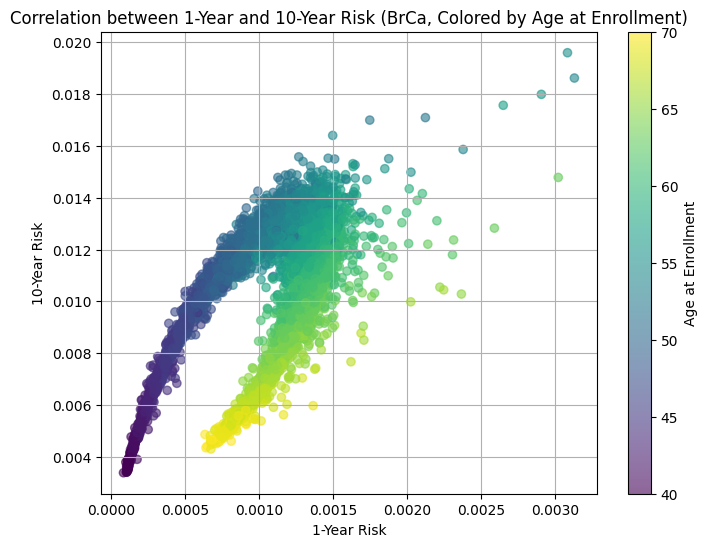

In [37]:
risk_df = aladynoulli_results_two['Breast_Cancer']['risk_df']
ages = pce_df.iloc[risk_df['person_index']]['age'].values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    risk_df['one_year_risk'],
    risk_df['ten_year_risk'],
    c=ages,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('1-Year Risk')
plt.ylabel('10-Year Risk')
plt.title('Correlation between 1-Year and 10-Year Risk (BrCa, Colored by Age at Enrollment)')
cbar = plt.colorbar(scatter)
cbar.set_label('Age at Enrollment')
plt.grid(True)
plt.show()

In [6]:
# use ernollment tested model to make projections forward
checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_fulldata_sexspecific.pt'
c=torch.load(checkpoint_path)
model.load_state_dict(c['model_state_dict'])
dynamic_bootstrap_results = evaluate_major_diseases_wsex_with_bootstrap_dynamic(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_90376/1686319557.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  c=torch.load(checkpoint_path)



Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.875 (0.863-0.885) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.741 (0.722-0.759) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.775 (0.751-0.788) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.751 (0.701-0.776) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 207 (2.1%) (from 10000 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.765 (0.742-0.790) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 480 (4

# use ernollment tested model to make projections forward



In [8]:
# use ernollment tested model to make projections forward
checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific_0_10000.pt'
c=torch.load(checkpoint_path)
model.load_state_dict(c['model_state_dict'])
dynamic_bootstrap_results = evaluate_major_diseases_wsex_with_bootstrap_dynamic(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_93848/1179728415.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  c=torch.load(checkpoint_path)



Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.654 (0.634-0.670) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.568 (0.553-0.589) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.525 (0.505-0.536) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.710 (0.658-0.731) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 207 (2.1%) (from 10000 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.660 (0.641-0.680) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 480 (4

In [9]:
# use ernollment tested model , 1 year input, 10 year oucome
checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific_0_10000.pt'
c=torch.load(checkpoint_path)
model.load_state_dict(c['model_state_dict'])
dynamic_bootstrap_results = evaluate_major_diseases_wsex_with_bootstrap(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_93848/3113315868.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  c=torch.load(checkpoint_path)



Evaluating ASCVD (10-Year Outcome, 1-Year Score)...
AUC: 0.712 (0.689-0.720) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

   Sex-stratified analysis:
   Female: AUC = 0.668, Events = 273/5409
   Male: AUC = 0.701, Events = 558/4591

   ASCVD risk in patients with pre-existing conditions:
   RA: AUC = 0.681, Events = 8/37
   Breast_Cancer: AUC = 0.630, Events = 13/170

Evaluating Diabetes (10-Year Outcome, 1-Year Score)...
AUC: 0.622 (0.608-0.649) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

   Sex-stratified analysis:
   Female: AUC = 0.611, Events = 264/5409
   Male: AUC = 0.624, Events = 317/4591

Evaluating Atrial_Fib (10-Year Outcome, 1-Year Score)...
AUC: 0.684 (0.669-0.707) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 10000 individuals)
Excluded 13

In [9]:
evaluate_major_diseases_wsex_with_bootstrap_dynamic_1year(model,Y_100k,E_100k,model.disease_names,pce_df, n_bootstraps=20, follow_up_duration_years=1)


Evaluating ASCVD (1-Year Risk)...
AUC: 0.887 (0.827-0.942) (calculated on 10000 individuals)
Events (1-Year in Eval Cohort): 78 (0.8%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (1-Year Risk)...
AUC: 0.793 (0.669-0.868) (calculated on 10000 individuals)
Events (1-Year in Eval Cohort): 33 (0.3%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (1-Year Risk)...
AUC: 0.793 (0.683-0.891) (calculated on 9864 individuals)
Events (1-Year in Eval Cohort): 22 (0.2%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (1-Year Risk)...
AUC: 0.888 (0.754-0.999) (calculated on 10000 individuals)
Events (1-Year in Eval Cohort): 4 (0.0%) (from 10000 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (1-Year Risk)...
AUC: 0.775 (0.699-0.858) (calculated on 10000 individuals)
Events (1-Year in Eval Cohort): 26 (0.3%) (from 10000 individuals)
Excluded 0 prevalent cases

{'ASCVD': {'auc': np.float64(0.8868656288279348),
  'n_events': 78,
  'event_rate': 0.7799999999999999,
  'ci_lower': np.float64(0.827148630245299),
  'ci_upper': np.float64(0.9423124352691905)},
 'Diabetes': {'auc': np.float64(0.7933574736022815),
  'n_events': 33,
  'event_rate': 0.33,
  'ci_lower': np.float64(0.6685650080975285),
  'ci_upper': np.float64(0.8676859278511936)},
 'Atrial_Fib': {'auc': np.float64(0.7933808723282407),
  'n_events': 22,
  'event_rate': 0.22303325223033255,
  'ci_lower': np.float64(0.6828156829046864),
  'ci_upper': np.float64(0.8905795014434299)},
 'CKD': {'auc': np.float64(0.8876050420168067),
  'n_events': 4,
  'event_rate': 0.04,
  'ci_lower': np.float64(0.7539602206334213),
  'ci_upper': np.float64(0.9985995133273876)},
 'All_Cancers': {'auc': np.float64(0.7754006570930573),
  'n_events': 26,
  'event_rate': 0.26,
  'ci_lower': np.float64(0.6994001158656663),
  'ci_upper': np.float64(0.8584113892685596)},
 'Stroke': {'auc': np.float64(0.73245622811405

In [143]:
# For RA
from fig5utils import *
disease_names = model.disease_names
ra_results = dynamic_aladynoulli_auc_for_preexisting(model, Y_100k, E_100k, disease_names, pce_df, 'Rheumatoid_Arthritis')
# For Breast Cancer
bc_results = dynamic_aladynoulli_auc_for_preexisting(model, Y_100k, E_100k, disease_names, pce_df, 'Breast_Cancer')



Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.841 (0.553-1.000) (calculated on 37 individuals)
Events (10-Year in Eval Cohort): 8 (21.6%) (from 37 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.602 (0.304-0.813) (calculated on 37 individuals)
Events (10-Year in Eval Cohort): 6 (16.2%) (from 37 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.845 (0.648-0.971) (calculated on 36 individuals)
Events (10-Year in Eval Cohort): 5 (13.9%) (from 36 individuals)
Excluded 1 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.833 (0.557-1.000) (calculated on 37 individuals)
Events (10-Year in Eval Cohort): 3 (8.1%) (from 37 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.278 (0.140-0.438) (calculated on 37 individuals)
Events (10-Year in Eval Cohort): 1 (2.7%) (from 37 individuals)
Exclude

In [149]:
ra_results['auc']

np.float64(0.8405172413793104)

In [150]:

bc_results['auc']

np.float64(0.7927486526212641)

In [ ]:
# Get indices for RA and Breast Cancer
from fig5utils import *
ra_patients = get_preexisting_patient_indices(Y_100k, pce_df, disease_names, 'Rheumatoid_Arthritis')
bc_patients = get_preexisting_patient_indices(Y_100k, pce_df, disease_names, 'Breast_Cancer')

# PCE/PREVENT AUC for the same patients
auc_pce_ra, auc_prevent_ra = pce_prevent_auc_for_preexisting(Y_100k, pce_df, ra_patients, disease_names)
auc_pce_bc, auc_prevent_bc = pce_prevent_auc_for_preexisting(Y_100k, pce_df, bc_patients, disease_names)

PCE AUC: 0.690, PREVENT AUC: 0.659
PCE AUC: 0.528, PREVENT AUC: 0.544


In [ ]:
for disease, res in aladynoulli_results_boot.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.712 (Events: 831)
Diabetes: AUC=0.622 (Events: 581)
Atrial_Fib: AUC=0.684 (Events: 376)
CKD: AUC=0.708 (Events: 207)
All_Cancers: AUC=0.680 (Events: 480)
Stroke: AUC=0.654 (Events: 129)
Heart_Failure: AUC=0.698 (Events: 205)
Pneumonia: AUC=0.683 (Events: 335)
COPD: AUC=0.646 (Events: 394)
Osteoporosis: AUC=0.676 (Events: 219)
Anemia: AUC=0.593 (Events: 523)
Colorectal_Cancer: AUC=0.655 (Events: 105)
Breast_Cancer: AUC=0.574 (Events: 214)
Prostate_Cancer: AUC=0.672 (Events: 204)
Lung_Cancer: AUC=0.691 (Events: 75)
Bladder_Cancer: AUC=0.740 (Events: 49)
Secondary_Cancer: AUC=0.607 (Events: 276)
Depression: AUC=0.470 (Events: 405)
Anxiety: AUC=0.506 (Events: 241)
Bipolar_Disorder: AUC=0.372 (Events: 34)
Rheumatoid_Arthritis: AUC=0.599 (Events: 123)
Psoriasis: AUC=0.432 (Events: 40)
Ulcerative_Colitis: AUC=0.584 (Events: 50)
Crohns_Disease: AUC=0.510 (Events: 31)
Asthma: AUC=0.511 (Events: 606)
Parkinsons: AUC=0.741 (Events: 46)
Multiple_Sclerosis: AUC=0.522 (Events: 21)
Thyro

In [84]:
from fig5utils import *
# 1. Define Train Indices 
train_indices = np.arange(20000, 30000) # Example

# 2. Define Test Data (using Y_100k and FH_processed subset aligned to it)
Y_test_eval = Y_100k 
fh_processed=pd.read_csv('/Users/sarahurbut/Library/Cloudstorage/Dropbox/baselinagefamh.csv')
FH_test_eval = fh_processed.iloc[0:10000] # Make sure FH_test_eval aligns with Y_100k


In [195]:

# 3. Set Follow-up duration
follow_up = 10

fitted_models = fit_cox_baseline_models(
    Y_full=Y,  # Your full Y tensor
    FH_processed=fh_processed,  # Your processed family history DataFrame
    train_indices=np.arange(20000, 30000),  # Training indices
    disease_mapping=disease_mapping,  # Dictionary mapping disease groups to FH columns
    major_diseases=major_diseases,  # Dictionary of disease groups and their names
    disease_names=model.disease_names,  # List of all disease names
    follow_up_duration_years=10  # Optional: follow-up duration in years
)


Fitting Cox models using training indices [20000:30000]...
 - Fitting ASCVD...
   Model fitted for ASCVD using 20000 samples.
 - Fitting Diabetes...
   Model fitted for Diabetes using 20000 samples.
 - Atrial_Fib: No FH columns, fitting Sex only.
 - Fitting Atrial_Fib...
   Model fitted for Atrial_Fib using 9877 samples.
   Excluded 123 prevalent cases for Atrial_Fib.
 - CKD: No FH columns, fitting Sex only.
 - Fitting CKD...
   Model fitted for CKD using 9989 samples.
   Excluded 11 prevalent cases for CKD.
 - All_Cancers: No FH columns, fitting Sex only.
 - Fitting All_Cancers...
   Model fitted for All_Cancers using 30000 samples.
 - Fitting Stroke...
   Model fitted for Stroke using 9978 samples.
   Excluded 22 prevalent cases for Stroke.
 - Fitting Heart_Failure...
   Model fitted for Heart_Failure using 9987 samples.
   Excluded 13 prevalent cases for Heart_Failure.
 - Pneumonia: No FH columns, fitting Sex only.
 - Fitting Pneumonia...
   Model fitted for Pneumonia using 30000 sa

In [196]:
evaluate_cox_baseline_models_auc(
    fitted_models=fitted_models,
    Y_test=Y_100k,
    FH_test=fh_processed.iloc[0:10000],
    disease_mapping=disease_mapping,
    major_diseases=major_diseases,
    disease_names=model.disease_names,
    follow_up_duration_years=10
)


Evaluating Cox models on test data (10-year AUC)...
 - Evaluating ASCVD...
   10-year AUC: 0.684 (0.663-0.705) | Events: 530/10000
 - Evaluating Diabetes...
   10-year AUC: 0.645 (0.621-0.667) | Events: 581/10000
 - Evaluating Atrial_Fib...
   10-year AUC: 0.712 (0.691-0.737) | Events: 376/10000
 - Evaluating CKD...
   10-year AUC: 0.699 (0.652-0.741) | Events: 104/10000
 - Evaluating All_Cancers...
   10-year AUC: 0.713 (0.690-0.741) | Events: 319/10000
 - Evaluating Stroke...
   10-year AUC: 0.647 (0.547-0.724) | Events: 49/10000
 - Evaluating Heart_Failure...
   10-year AUC: 0.769 (0.727-0.813) | Events: 84/10000
 - Evaluating Pneumonia...
   10-year AUC: 0.687 (0.670-0.711) | Events: 335/10000
 - Evaluating COPD...
   10-year AUC: 0.652 (0.623-0.684) | Events: 272/10000
 - Evaluating Osteoporosis...
   10-year AUC: 0.736 (0.695-0.767) | Events: 219/10000
 - Evaluating Anemia...
   10-year AUC: 0.568 (0.531-0.601) | Events: 272/10000
 - Evaluating Colorectal_Cancer...
   10-year AU

{'ASCVD': {'auc': np.float64(0.6839388535793269),
  'ci': (np.float64(0.6630966140080464), np.float64(0.7053161783767739)),
  'n_events': 530,
  'n_total': 10000},
 'Diabetes': {'auc': np.float64(0.6445550146835808),
  'ci': (np.float64(0.6212270094205133), np.float64(0.6670911738910331)),
  'n_events': 581,
  'n_total': 10000},
 'Atrial_Fib': {'auc': np.float64(0.7117945937461311),
  'ci': (np.float64(0.6907355266660091), np.float64(0.7366475329209593)),
  'n_events': 376,
  'n_total': 10000},
 'CKD': {'auc': np.float64(0.6991033673279023),
  'ci': (np.float64(0.651685360064719), np.float64(0.7412284291977649)),
  'n_events': 104,
  'n_total': 10000},
 'All_Cancers': {'auc': np.float64(0.7126250591356433),
  'ci': (np.float64(0.6896798705757221), np.float64(0.740955284545196)),
  'n_events': 319,
  'n_total': 10000},
 'Stroke': {'auc': np.float64(0.6465005055383625),
  'ci': (np.float64(0.5466201075981738), np.float64(0.7236856949671905)),
  'n_events': 49,
  'n_total': 10000},
 'Hear

In [20]:
pce_df.head()

id  age   race     Sex SmokingStatusv2       tchol        hdl  SBP  \
1  1000015   69  white    Male        Previous  160.440834  38.592420  146   
2  1000023   44  white    Male         Current  238.631089  35.460170  145   
3  1000037   69  white  Female        Previous  265.003865  54.988399  152   
4  1000042   66  white    Male           Never  187.277648  47.911833  130   
5  1000059   54  white  Female        Previous  203.750965  48.221191  152   

   antihtnbase  dm2_prev  dm1_prev  pce_goff  pce_goff_fuull       pce  \
1            0         0         0  0.208619        0.208619  0.236008   
2            0         0         0  0.128707        0.128707  0.133392   
3            0         0         0  0.128959        0.128959  0.126497   
4            0         0         0  0.137629        0.137629  0.132626   
5            0         0         0  0.029323        0.029323  0.029881   

   prevent_base_ascvd_risk  prevent_impute  
1                 0.088804        0.088804  
2                 0.031418        0.031418  
3                 0.073537        0.073537  
4                 0.062329        0.062329  
5                 0.032188        0.032188

In [21]:
def evaluate_cox_baseline_models(fitted_models, Y_test, FH_test, disease_mapping, major_diseases, disease_names, follow_up_duration_years=10):
    from lifelines.utils import concordance_index
    test_results = {}
    print("\nEvaluating Cox models on test data...")

    if not (len(Y_test) == len(FH_test)):
        raise ValueError(f"Test data size mismatch: Y_test ({len(Y_test)}), FH_test ({len(FH_test)})")

    FH_test = FH_test.reset_index(drop=True)

    for disease_group, model in fitted_models.items():
        if model is None:
            test_results[disease_group] = {'c_index': np.nan, 'ci': (np.nan, np.nan), 'n_events': 0, 'n_total': 0}
            continue

        print(f" - Evaluating {disease_group}...")
        fh_cols = disease_mapping.get(disease_group, [])

        target_sex_code = None
        if disease_group == 'Breast_Cancer': target_sex_code = 0
        elif disease_group == 'Prostate_Cancer': target_sex_code = 1

        if target_sex_code is not None:
            mask_test = (FH_test['sex'] == target_sex_code)
        else:
            mask_test = pd.Series(True, index=FH_test.index)

        current_FH_test = FH_test[mask_test].copy()
        current_Y_test = Y_test[mask_test]

        if len(current_FH_test) == 0:
            print(f"   Warning: No individuals for target sex code {target_sex_code}.")
            test_results[disease_group] = {'c_index': np.nan, 'ci': (np.nan, np.nan), 'n_events': 0, 'n_total': 0}
            continue

        # Find disease indices
        disease_indices = []
        unique_indices = set()
        for disease in major_diseases.get(disease_group, []):
            indices = [i for i, name in enumerate(disease_names) if disease.lower() in name.lower()]
            for idx in indices:
                if idx not in unique_indices and idx < Y_test.shape[1]:
                    disease_indices.append(idx)
                    unique_indices.add(idx)

        if not disease_indices:
            test_results[disease_group] = {'c_index': np.nan, 'ci': (np.nan, np.nan), 'n_events': 0, 'n_total': 0}
            continue

        # Prepare data for evaluation
        eval_data = []
        n_prevalent_excluded = 0

        for i in range(len(current_FH_test)):
            age_at_enrollment = current_FH_test.iloc[i]['age']
            t_enroll = int(age_at_enrollment - 30)
            if t_enroll < 0 or t_enroll >= current_Y_test.shape[2]:
                continue

            # Exclude prevalent cases for single-disease groups only
            if len(disease_indices) == 1:
                d_idx = disease_indices[0]
                if torch.any(current_Y_test[i, d_idx, :t_enroll] > 0):
                    n_prevalent_excluded += 1
                    continue

            end_time = min(t_enroll + follow_up_duration_years, current_Y_test.shape[2])
            if end_time <= t_enroll:
                continue

            for d_idx in disease_indices:
                Y_slice = current_Y_test[i, d_idx, t_enroll:end_time]
                if (torch.is_tensor(Y_slice) and torch.any(Y_slice > 0)) or \
                   (isinstance(Y_slice, np.ndarray) and np.any(Y_slice > 0)):
                    event_time = np.where(Y_slice > 0)[0][0] + t_enroll
                    age_at_event = 30 + event_time
                    event = 1
                else:
                    age_at_event = 30 + end_time - 1
                    event = 0

                row = {
                    'age': age_at_event,
                    'event': event,
                    'sex': current_FH_test.iloc[i]['sex']
                }
                if fh_cols:
                    valid_fh_cols = [col for col in fh_cols if col in current_FH_test.columns]
                    if valid_fh_cols:
                        row['fh'] = current_FH_test.iloc[i][valid_fh_cols].any()
                eval_data.append(row)

        if not eval_data:
            print("   Warning: No individuals processed for evaluation.")
            test_results[disease_group] = {'c_index': np.nan, 'ci': (np.nan, np.nan), 'n_events': 0, 'n_total': 0}
            continue

        eval_df = pd.DataFrame(eval_data)

        try:
            formula = 'sex'
            if 'fh' in eval_df.columns:
                formula += ' + fh'

            risk_scores = model.predict_partial_hazard(eval_df)

            c_index = concordance_index(
                eval_df['age'],
                -risk_scores,
                eval_df['event']
            )

            n_bootstraps = 100
            c_indices = []
            for _ in range(n_bootstraps):
                bootstrap_idx = np.random.choice(len(eval_df), len(eval_df), replace=True)
                bootstrap_df = eval_df.iloc[bootstrap_idx]
                bootstrap_risk = model.predict_partial_hazard(bootstrap_df)
                c_idx = concordance_index(
                    bootstrap_df['age'],
                    -bootstrap_risk,
                    bootstrap_df['event']
                )
                c_indices.append(c_idx)

            ci_lower = np.percentile(c_indices, 2.5)
            ci_upper = np.percentile(c_indices, 97.5)

            n_events = eval_df['event'].sum()
            n_total = len(eval_df)

            test_results[disease_group] = {
                'c_index': c_index,
                'ci': (ci_lower, ci_upper),
                'n_events': n_events,
                'n_total': n_total
            }

            print(f"   Overall C-index: {c_index:.3f} ({ci_lower:.3f}-{ci_upper:.3f})")
            print(f"   Events: {n_events}/{n_total}")
            if len(disease_indices) == 1:
                print(f"   Excluded {n_prevalent_excluded} prevalent cases for {disease_group}.")

            if disease_group not in ['Breast_Cancer', 'Prostate_Cancer']:
                print("\n   Sex-stratified analysis:")
                for sex in [0, 1]:
                    sex_mask = eval_df['sex'] == sex
                    sex_df = eval_df[sex_mask]
                    if len(sex_df) > 0:
                        sex_risk = model.predict_partial_hazard(sex_df)
                        sex_c_index = concordance_index(
                            sex_df['age'],
                            -sex_risk,
                            sex_df['event']
                        )
                        sex_events = sex_df['event'].sum()
                        print(f"   {'Female' if sex == 0 else 'Male'}: C-index = {sex_c_index:.3f}, Events = {sex_events}/{len(sex_df)}")

        except Exception as e:
            print(f"   Error evaluating {disease_group}: {e}")
            test_results[disease_group] = {'c_index': np.nan, 'ci': (np.nan, np.nan), 'n_events': 0, 'n_total': 0}

    print("Finished evaluating Cox models.")
    return test_results

In [ ]:
from fig5utils import *
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message="DataFrame Index is not unique")
test_results = evaluate_cox_baseline_models(
    fitted_models=fitted_models,  # The models we just fitted
    Y_test=Y_100k,  # Test portion of Y tensor
    FH_test=fh_processed.iloc[0:10000],  # Test portion of FH data
    disease_mapping=disease_mapping,
    major_diseases=major_diseases,
    disease_names=model.disease_names,
    #pce_df=pce_df,
    follow_up_duration_years=10  # Should match the training duration
)


Evaluating Cox models on test data...
 - Evaluating ASCVD...
   Overall C-index: 0.650 (0.630-0.668)
   Events: 708/20000

   Sex-stratified analysis:
   Female: C-index = 0.519, Events = 195/10818
   Male: C-index = 0.541, Events = 513/9182
 - Evaluating Diabetes...
   Overall C-index: 0.606 (0.580-0.628)
   Events: 598/20000

   Sex-stratified analysis:
   Female: C-index = 0.591, Events = 271/10818
   Male: C-index = 0.562, Events = 327/9182
 - Evaluating Atrial_Fib...
   Overall C-index: 0.584 (0.562-0.610)
   Events: 376/9864
   Excluded 136 prevalent cases for Atrial_Fib.

   Sex-stratified analysis:
   Female: C-index = 0.500, Events = 139/5372
   Male: C-index = 0.500, Events = 237/4492
 - Evaluating CKD...
   Overall C-index: 0.555 (0.499-0.607)
   Events: 104/9980
   Excluded 20 prevalent cases for CKD.

   Sex-stratified analysis:
   Female: C-index = 0.500, Events = 48/5401
   Male: C-index = 0.500, Events = 56/4579
 - Evaluating All_Cancers...
   Overall C-index: 0.615 (0

In [69]:
from fig5utils import *
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message="DataFrame Index is not unique")
train_indices = np.arange(0, 20000)
test_indices = np.arange(20000, 30000)

glm_results = fit_and_eval_glm_baseline_models(
    Y_full=Y,
    FH_processed=fh_processed,
    train_indices=train_indices,
    test_indices=test_indices,
    disease_mapping=disease_mapping,
    major_diseases=major_diseases,
    disease_names=model.disease_names,
    follow_up_duration_years=10
)

- Fitting GLM for ASCVD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for ASCVD: 0.702 (Events: 535/10000)
- Fitting GLM for Diabetes...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Diabetes: 0.655 (Events: 586/10000)
- Fitting GLM for Atrial_Fib...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Atrial_Fib: 0.708 (Events: 366/10000)
- Fitting GLM for CKD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for CKD: 0.724 (Events: 120/10000)
- Fitting GLM for All_Cancers...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for All_Cancers: 0.740 (Events: 319/10000)
- Fitting GLM for Stroke...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Stroke: 0.631 (Events: 50/10000)
- Fitting GLM for Heart_Failure...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Heart_Failure: 0.711 (Events: 74/10000)
- Fitting GLM for Pneumonia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Pneumonia: 0.651 (Events: 358/10000)
- Fitting GLM for COPD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for COPD: 0.668 (Events: 281/10000)
- Fitting GLM for Osteoporosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Osteoporosis: 0.753 (Events: 210/10000)
- Fitting GLM for Anemia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Anemia: 0.573 (Events: 281/10000)
- Fitting GLM for Colorectal_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Colorectal_Cancer: 0.649 (Events: 81/10000)
- Fitting GLM for Breast_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Breast_Cancer: 0.481 (Events: 37/5395)
- Fitting GLM for Prostate_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Prostate_Cancer: 0.685 (Events: 204/4605)
- Fitting GLM for Lung_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Lung_Cancer: 0.641 (Events: 83/10000)
- Fitting GLM for Bladder_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Bladder_Cancer: 0.751 (Events: 56/10000)
- Fitting GLM for Secondary_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Secondary_Cancer: 0.590 (Events: 153/10000)
- Fitting GLM for Depression...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Depression: 0.575 (Events: 393/10000)
- Fitting GLM for Anxiety...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Anxiety: 0.563 (Events: 260/10000)
- Fitting GLM for Bipolar_Disorder...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Bipolar_Disorder: 0.489 (Events: 23/10000)
- Fitting GLM for Rheumatoid_Arthritis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Rheumatoid_Arthritis: 0.654 (Events: 109/10000)
- Fitting GLM for Psoriasis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Psoriasis: 0.574 (Events: 57/10000)
- Fitting GLM for Ulcerative_Colitis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Ulcerative_Colitis: 0.437 (Events: 37/10000)
- Fitting GLM for Crohns_Disease...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Crohns_Disease: 0.554 (Events: 30/10000)
- Fitting GLM for Asthma...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Asthma: 0.525 (Events: 589/10000)
- Fitting GLM for Parkinsons...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Parkinsons: 0.728 (Events: 47/10000)
- Fitting GLM for Multiple_Sclerosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

  GLM AUC for Multiple_Sclerosis: 0.650 (Events: 19/10000)
- Fitting GLM for Thyroid_Disorders...
  GLM AUC for Thyroid_Disorders: 0.650 (Events: 381/10000)


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

In [72]:
aladynoulli_results_boot

{'ASCVD': {'auc': np.float64(0.7118249781906516),
  'n_events': 831,
  'event_rate': 8.309999999999999,
  'ci_lower': np.float64(0.6932021894098899),
  'ci_upper': np.float64(0.7242366226255361)},
 'Diabetes': {'auc': np.float64(0.622152937657231),
  'n_events': 581,
  'event_rate': 5.81,
  'ci_lower': np.float64(0.6058565294421374),
  'ci_upper': np.float64(0.6355719011286998)},
 'Atrial_Fib': {'auc': np.float64(0.6839643188708694),
  'n_events': 376,
  'event_rate': 3.7600000000000002,
  'ci_lower': np.float64(0.6565115608781751),
  'ci_upper': np.float64(0.7067753009745348)},
 'CKD': {'auc': np.float64(0.7077790455669064),
  'n_events': 207,
  'event_rate': 2.07,
  'ci_lower': np.float64(0.6541313137683541),
  'ci_upper': np.float64(0.7301516090646004)},
 'All_Cancers': {'auc': np.float64(0.6797875087535014),
  'n_events': 480,
  'event_rate': 4.8,
  'ci_lower': np.float64(0.6639043424471028),
  'ci_upper': np.float64(0.6991142919440022)},
 'Stroke': {'auc': np.float64(0.65396129449

In [80]:
from fig5utils import *


In [90]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/')
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3000481659.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/L


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [92]:
checkpoint=torch.load('/Users/sarahurbut/Library/Cloudstorage/Dropbox/resultshighamp/results/output_0_10000/model.pt')

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3922804010.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint=torch.load('/Users/sarahurbut/Libr

In [93]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [159]:

disease_names = model.disease_names
result_dynamic = evaluate_major_diseases_wsex_with_bootstrap_dynamic(model, Y_100k, E_100k, disease_names, pce_df, n_bootstraps=100, follow_up_duration_years=10)


Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.875 (0.861-0.887) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.741 (0.717-0.766) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.775 (0.745-0.802) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.751 (0.720-0.780) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 207 (2.1%) (from 10000 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.765 (0.746-0.792) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 480 (4

In [116]:
# Find the index for breast cancer in your disease_names
#bc_indices = [i for i, name in enumerate(disease_names) if 'Malignant Neoplasm of Breast' in name.lower()]
bc_indices = [17]
# Find patients with breast cancer before or at enrollment
pre_existing_bc = []
for i, row in enumerate(pce_df.itertuples()):
    enroll_time = int(row.age - 30)
    if any(torch.any(Y_100k[i, idx, :enroll_time+1] > 0) for idx in bc_indices):
        pre_existing_bc.append(i)

# Subset your data
Y_bc = Y_100k[pre_existing_bc]
E_bc = E_100k[pre_existing_bc]
pce_df_bc = pce_df.iloc[pre_existing_bc].reset_index(drop=True)

# Evaluate
results_bc = evaluate_major_diseases_wsex_with_bootstrap_dynamic(
   model, Y_bc, E_bc, disease_names, pce_df_bc, n_bootstraps=100, follow_up_duration_years=10
)



Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.574 (0.428-0.721) (calculated on 165 individuals)
Events (10-Year in Eval Cohort): 13 (7.9%) (from 165 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.620 (0.520-0.724) (calculated on 165 individuals)
Events (10-Year in Eval Cohort): 9 (5.5%) (from 165 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.569 (0.405-0.749) (calculated on 163 individuals)
Events (10-Year in Eval Cohort): 8 (4.9%) (from 163 individuals)
Excluded 2 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.689 (0.407-0.890) (calculated on 165 individuals)
Events (10-Year in Eval Cohort): 5 (3.0%) (from 165 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.618 (0.460-0.746) (calculated on 165 individuals)
Events (10-Year in Eval Cohort): 17 (10.3%) (from 165 individual

In [ ]:
# 1. Find patients with pre-existing breast cancer at enrollment
bc_indices = [i for i, name in enumerate(disease_names) if 'breast cancer' in name.lower()]
pre_existing_bc = []
for i, row in enumerate(pce_df.itertuples()):
    enroll_time = int(row.age - 30)
    if any(torch.any(Y_100k[i, idx, :enroll_time+1] > 0) for idx in bc_indices):
        pre_existing_bc.append(i)

# 2. Subset data
Y_bc = Y_100k[pre_existing_bc]
pce_df_bc = pce_df.iloc[pre_existing_bc].reset_index(drop=True)

# 3. Get PCE/PREVENT scores and Aladynoulli 10-year risk at enrollment
pce_scores = pce_df_bc['pce'].values  # or whatever your column is
prevent_scores = pce_df_bc['prevent_impute'].values  # or your column

# For Aladynoulli, calculate 10-year risk at enrollment for each patient
aladynoulli_10yr = []
for i, row in enumerate(pce_df_bc.itertuples()):
    enroll_time = int(row.age - 30)
    # Get yearly risks for years 1-10 after enrollment
    yearly_risks = []
    for t in range(1, 11):
        pi_diseases = model.forward()[0][i, bc_indices, enroll_time + t]
        yearly_risk = 1 - torch.prod(1 - pi_diseases)
        yearly_risks.append(yearly_risk.item())
    survival_prob = np.prod([1 - r for r in yearly_risks])
    ten_year_risk = 1 - survival_prob
    aladynoulli_10yr.append(ten_year_risk)

aladynoulli_10yr = np.array(aladynoulli_10yr)

# 4. Define binary outcome: event in 10 years after enrollment
outcomes = []
for i, row in enumerate(pce_df_bc.itertuples()):
    enroll_time = int(row.age - 30)
    end_time = min(enroll_time + 10, Y_bc.shape[2])
    had_event = 0
    for idx in bc_indices:
        if torch.any(Y_bc[i, idx, enroll_time:end_time] > 0):
            had_event = 1
            break
    outcomes.append(had_event)
outcomes = np.array(outcomes)

# 5. Compute AUCs
from sklearn.metrics import roc_auc_score
print('Aladynoulli AUC:', roc_auc_score(outcomes, aladynoulli_10yr))
print('PCE AUC:', roc_auc_score(outcomes, pce_scores))
print('PREVENT AUC:', roc_auc_score(outcomes, prevent_scores))

In [ ]:
for disease, res in aladynoulli_results_boot.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.712 (Events: 831)
Diabetes: AUC=0.622 (Events: 581)
Atrial_Fib: AUC=0.684 (Events: 376)
CKD: AUC=0.708 (Events: 207)
All_Cancers: AUC=0.680 (Events: 480)
Stroke: AUC=0.654 (Events: 129)
Heart_Failure: AUC=0.698 (Events: 205)
Pneumonia: AUC=0.683 (Events: 335)
COPD: AUC=0.646 (Events: 394)
Osteoporosis: AUC=0.676 (Events: 219)
Anemia: AUC=0.593 (Events: 523)
Colorectal_Cancer: AUC=0.655 (Events: 105)
Breast_Cancer: AUC=0.574 (Events: 214)
Prostate_Cancer: AUC=0.672 (Events: 204)
Lung_Cancer: AUC=0.691 (Events: 75)
Bladder_Cancer: AUC=0.740 (Events: 49)
Secondary_Cancer: AUC=0.607 (Events: 276)
Depression: AUC=0.470 (Events: 405)
Anxiety: AUC=0.506 (Events: 241)
Bipolar_Disorder: AUC=0.372 (Events: 34)
Rheumatoid_Arthritis: AUC=0.599 (Events: 123)
Psoriasis: AUC=0.432 (Events: 40)
Ulcerative_Colitis: AUC=0.584 (Events: 50)
Crohns_Disease: AUC=0.510 (Events: 31)
Asthma: AUC=0.511 (Events: 606)
Parkinsons: AUC=0.741 (Events: 46)
Multiple_Sclerosis: AUC=0.522 (Events: 21)
Thyro

In [ ]:
for disease, res in aladynoulli_results_boot.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.712 (Events: 831)
Diabetes: AUC=0.622 (Events: 581)
Atrial_Fib: AUC=0.684 (Events: 376)
CKD: AUC=0.708 (Events: 207)
All_Cancers: AUC=0.680 (Events: 480)
Stroke: AUC=0.654 (Events: 129)
Heart_Failure: AUC=0.698 (Events: 205)
Pneumonia: AUC=0.683 (Events: 335)
COPD: AUC=0.646 (Events: 394)
Osteoporosis: AUC=0.676 (Events: 219)
Anemia: AUC=0.593 (Events: 523)
Colorectal_Cancer: AUC=0.655 (Events: 105)
Breast_Cancer: AUC=0.574 (Events: 214)
Prostate_Cancer: AUC=0.672 (Events: 204)
Lung_Cancer: AUC=0.691 (Events: 75)
Bladder_Cancer: AUC=0.740 (Events: 49)
Secondary_Cancer: AUC=0.607 (Events: 276)
Depression: AUC=0.470 (Events: 405)
Anxiety: AUC=0.506 (Events: 241)
Bipolar_Disorder: AUC=0.372 (Events: 34)
Rheumatoid_Arthritis: AUC=0.599 (Events: 123)
Psoriasis: AUC=0.432 (Events: 40)
Ulcerative_Colitis: AUC=0.584 (Events: 50)
Crohns_Disease: AUC=0.510 (Events: 31)
Asthma: AUC=0.511 (Events: 606)
Parkinsons: AUC=0.741 (Events: 46)
Multiple_Sclerosis: AUC=0.522 (Events: 21)
Thyro

In [ ]:
for disease, res in aladynoulli_results_boot.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.712 (Events: 831)
Diabetes: AUC=0.622 (Events: 581)
Atrial_Fib: AUC=0.684 (Events: 376)
CKD: AUC=0.708 (Events: 207)
All_Cancers: AUC=0.680 (Events: 480)
Stroke: AUC=0.654 (Events: 129)
Heart_Failure: AUC=0.698 (Events: 205)
Pneumonia: AUC=0.683 (Events: 335)
COPD: AUC=0.646 (Events: 394)
Osteoporosis: AUC=0.676 (Events: 219)
Anemia: AUC=0.593 (Events: 523)
Colorectal_Cancer: AUC=0.655 (Events: 105)
Breast_Cancer: AUC=0.574 (Events: 214)
Prostate_Cancer: AUC=0.672 (Events: 204)
Lung_Cancer: AUC=0.691 (Events: 75)
Bladder_Cancer: AUC=0.740 (Events: 49)
Secondary_Cancer: AUC=0.607 (Events: 276)
Depression: AUC=0.470 (Events: 405)
Anxiety: AUC=0.506 (Events: 241)
Bipolar_Disorder: AUC=0.372 (Events: 34)
Rheumatoid_Arthritis: AUC=0.599 (Events: 123)
Psoriasis: AUC=0.432 (Events: 40)
Ulcerative_Colitis: AUC=0.584 (Events: 50)
Crohns_Disease: AUC=0.510 (Events: 31)
Asthma: AUC=0.511 (Events: 606)
Parkinsons: AUC=0.741 (Events: 46)
Multiple_Sclerosis: AUC=0.522 (Events: 21)
Thyro

In [161]:
for disease, res in result_dynamic.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.875 (Events: 831)
Diabetes: AUC=0.741 (Events: 581)
Atrial_Fib: AUC=0.775 (Events: 376)
CKD: AUC=0.751 (Events: 207)
All_Cancers: AUC=0.765 (Events: 480)
Stroke: AUC=0.675 (Events: 129)
Heart_Failure: AUC=0.819 (Events: 205)
Pneumonia: AUC=0.784 (Events: 335)
COPD: AUC=0.760 (Events: 394)
Osteoporosis: AUC=0.738 (Events: 219)
Anemia: AUC=0.719 (Events: 523)
Colorectal_Cancer: AUC=0.830 (Events: 105)
Breast_Cancer: AUC=0.720 (Events: 214)
Prostate_Cancer: AUC=0.833 (Events: 204)
Lung_Cancer: AUC=0.776 (Events: 75)
Bladder_Cancer: AUC=0.883 (Events: 49)
Secondary_Cancer: AUC=0.715 (Events: 276)
Depression: AUC=0.673 (Events: 405)
Anxiety: AUC=0.680 (Events: 241)
Bipolar_Disorder: AUC=0.746 (Events: 34)
Rheumatoid_Arthritis: AUC=0.797 (Events: 123)
Psoriasis: AUC=0.613 (Events: 40)
Ulcerative_Colitis: AUC=0.776 (Events: 50)
Crohns_Disease: AUC=0.804 (Events: 31)
Asthma: AUC=0.691 (Events: 606)
Parkinsons: AUC=0.806 (Events: 46)
Multiple_Sclerosis: AUC=0.639 (Events: 21)
Thyro

In [6]:
# Example calls:
from fig5utils import *
checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific.pt'
#checkpoint_path = '/Users/sarahurbut/Library/Cloudstorage/Dropbox/resultshighamp/results/output_0_10000/model.pt'
checkpoint = torch.load(checkpoint_path)


original_G = G # Store the original G - proper tensor copy

Y_100k, E_100k, G_100k, indices = subset_data(Y,E,G, start_index=0, end_index=10000)
G_100k=checkpoint['G']
torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/Cloudstorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
model.load_state_dict(checkpoint['model_state_dict'])

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_93848/1993625522.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/var


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0008,  0.0071,  0.0117,  0.0152, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

<All keys matched successfully>

In [ ]:
## enrollment tested model with updated risks
disease_names = model.disease_names
enroll_dynamic = evaluate_major_diseases_wsex_with_bootstrap_dynamic(model, Y_100k, E_100k, disease_names, pce_df, n_bootstraps=100, follow_up_duration_years=10)


Evaluating ASCVD (Dynamic 10-Year Risk)...
AUC: 0.654 (0.634-0.678) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

Evaluating Diabetes (Dynamic 10-Year Risk)...
AUC: 0.568 (0.543-0.591) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

Evaluating Atrial_Fib (Dynamic 10-Year Risk)...
AUC: 0.525 (0.500-0.555) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 9864 individuals)
Excluded 136 prevalent cases for Atrial_Fib.

Evaluating CKD (Dynamic 10-Year Risk)...
AUC: 0.710 (0.678-0.736) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 207 (2.1%) (from 10000 individuals)
Excluded 0 prevalent cases for CKD.

Evaluating All_Cancers (Dynamic 10-Year Risk)...
AUC: 0.660 (0.641-0.685) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 480 (4

In [ ]:
for disease, res in enroll_dynamic.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

In [85]:
results_cox_1year_10outcome = evaluate_cox_baseline_models_1yrscore_10youtcome_auc(
    fitted_models, Y_100k, FH_test_eval, disease_mapping, major_diseases, disease_names, follow_up_duration_years=10, n_bootstraps=100
)


Evaluating Cox models (1-year risk at enrollment, 10-year outcome AUC)...
 - Evaluating ASCVD...
   1-year risk AUC (10-year outcome): 0.670 (0.647-0.691) | Events: 530/10000
 - Evaluating Diabetes...
   1-year risk AUC (10-year outcome): 0.640 (0.621-0.659) | Events: 581/10000
 - Evaluating Atrial_Fib...
   1-year risk AUC (10-year outcome): 0.706 (0.678-0.728) | Events: 376/10000
 - Evaluating CKD...
   1-year risk AUC (10-year outcome): 0.676 (0.627-0.723) | Events: 104/10000
 - Evaluating All_Cancers...
   1-year risk AUC (10-year outcome): 0.700 (0.670-0.727) | Events: 319/10000
 - Evaluating Stroke...
   1-year risk AUC (10-year outcome): 0.625 (0.551-0.684) | Events: 49/10000
 - Evaluating Heart_Failure...
   1-year risk AUC (10-year outcome): 0.754 (0.711-0.802) | Events: 84/10000
 - Evaluating Pneumonia...
   1-year risk AUC (10-year outcome): 0.677 (0.647-0.703) | Events: 335/10000
 - Evaluating COPD...
   1-year risk AUC (10-year outcome): 0.650 (0.619-0.681) | Events: 272/

In [89]:
for disease, res in aladynoulli_results_boot.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.712 (Events: 831)
Diabetes: AUC=0.622 (Events: 581)
Atrial_Fib: AUC=0.684 (Events: 376)
CKD: AUC=0.708 (Events: 207)
All_Cancers: AUC=0.680 (Events: 480)
Stroke: AUC=0.654 (Events: 129)
Heart_Failure: AUC=0.698 (Events: 205)
Pneumonia: AUC=0.683 (Events: 335)
COPD: AUC=0.646 (Events: 394)
Osteoporosis: AUC=0.676 (Events: 219)
Anemia: AUC=0.593 (Events: 523)
Colorectal_Cancer: AUC=0.655 (Events: 105)
Breast_Cancer: AUC=0.574 (Events: 214)
Prostate_Cancer: AUC=0.672 (Events: 204)
Lung_Cancer: AUC=0.691 (Events: 75)
Bladder_Cancer: AUC=0.740 (Events: 49)
Secondary_Cancer: AUC=0.607 (Events: 276)
Depression: AUC=0.470 (Events: 405)
Anxiety: AUC=0.506 (Events: 241)
Bipolar_Disorder: AUC=0.372 (Events: 34)
Rheumatoid_Arthritis: AUC=0.599 (Events: 123)
Psoriasis: AUC=0.432 (Events: 40)
Ulcerative_Colitis: AUC=0.584 (Events: 50)
Crohns_Disease: AUC=0.510 (Events: 31)
Asthma: AUC=0.511 (Events: 606)
Parkinsons: AUC=0.741 (Events: 46)
Multiple_Sclerosis: AUC=0.522 (Events: 21)
Thyro

In [73]:
for disease, res in glm_results.items():
    print(f"{disease}: AUC={res['auc']:.3f} (Events: {res['n_events']})")

ASCVD: AUC=0.702 (Events: 535)
Diabetes: AUC=0.655 (Events: 586)
Atrial_Fib: AUC=0.708 (Events: 366)
CKD: AUC=0.724 (Events: 120)
All_Cancers: AUC=0.740 (Events: 319)
Stroke: AUC=0.631 (Events: 50)
Heart_Failure: AUC=0.711 (Events: 74)
Pneumonia: AUC=0.651 (Events: 358)
COPD: AUC=0.668 (Events: 281)
Osteoporosis: AUC=0.753 (Events: 210)
Anemia: AUC=0.573 (Events: 281)
Colorectal_Cancer: AUC=0.649 (Events: 81)
Breast_Cancer: AUC=0.481 (Events: 37)
Prostate_Cancer: AUC=0.685 (Events: 204)
Lung_Cancer: AUC=0.641 (Events: 83)
Bladder_Cancer: AUC=0.751 (Events: 56)
Secondary_Cancer: AUC=0.590 (Events: 153)
Depression: AUC=0.575 (Events: 393)
Anxiety: AUC=0.563 (Events: 260)
Bipolar_Disorder: AUC=0.489 (Events: 23)
Rheumatoid_Arthritis: AUC=0.654 (Events: 109)
Psoriasis: AUC=0.574 (Events: 57)
Ulcerative_Colitis: AUC=0.437 (Events: 37)
Crohns_Disease: AUC=0.554 (Events: 30)
Asthma: AUC=0.525 (Events: 589)
Parkinsons: AUC=0.728 (Events: 47)
Multiple_Sclerosis: AUC=0.650 (Events: 19)
Thyroid_D

In [23]:
test_results2 = evaluate_cox_baseline_models_auc(
    fitted_models=fitted_models,
    Y_test=Y_100k,
    FH_test=fh_processed.iloc[0:10000],
    disease_mapping=disease_mapping,
    major_diseases=major_diseases,
    disease_names=model.disease_names,
    #pce_df=pce_df,  # (optional, if you want to align with PCE/PREVENT)
    follow_up_duration_years=10,
    n_bootstraps=100
)


Evaluating Cox models on test data (10-year AUC)...
 - Evaluating ASCVD...
   10-year AUC: 0.684 (0.664-0.703) | Events: 530/10000
 - Evaluating Diabetes...
   10-year AUC: 0.645 (0.624-0.664) | Events: 581/10000
 - Evaluating Atrial_Fib...
   10-year AUC: 0.712 (0.689-0.735) | Events: 376/10000
 - Evaluating CKD...
   10-year AUC: 0.699 (0.653-0.747) | Events: 104/10000
 - Evaluating All_Cancers...
   10-year AUC: 0.713 (0.691-0.735) | Events: 319/10000
 - Evaluating Stroke...
   10-year AUC: 0.647 (0.568-0.732) | Events: 49/10000
 - Evaluating Heart_Failure...
   10-year AUC: 0.769 (0.714-0.810) | Events: 84/10000
 - Evaluating Pneumonia...
   10-year AUC: 0.687 (0.662-0.711) | Events: 335/10000
 - Evaluating COPD...
   10-year AUC: 0.652 (0.617-0.679) | Events: 272/10000
 - Evaluating Osteoporosis...
   10-year AUC: 0.736 (0.702-0.768) | Events: 219/10000
 - Evaluating Anemia...
   10-year AUC: 0.568 (0.532-0.607) | Events: 272/10000
 - Evaluating Colorectal_Cancer...
   10-year AU


ROC AUC Comparison (10-year prediction from enrollment):
Our model: 0.695
PCE: 0.678


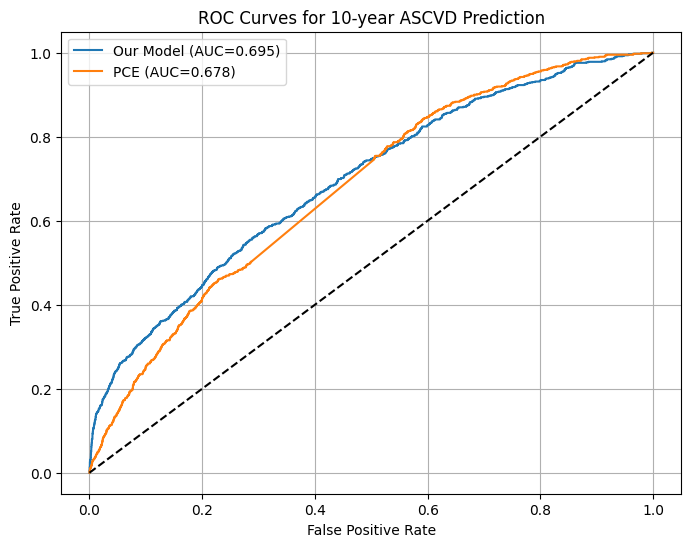

In [33]:
from utils import *
compare_with_pce(model, pce_df, ascvd_indices=[111,112,113,114,115,116])



ROC AUC Comparison (10-year prediction from enrollment):
Our model: 0.712
Prevent: 0.653
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent.pdf


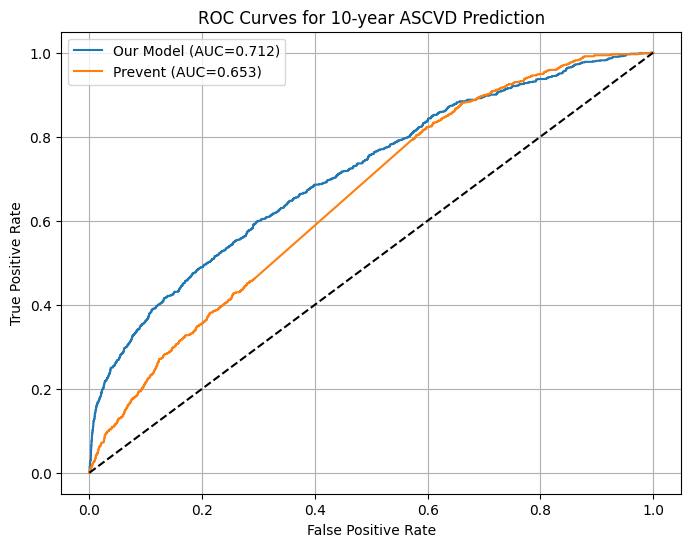

In [62]:
from utils import *
compare_with_prevent(model, pce_df, ascvd_indices=[111,112,113,114,115,116])

In [51]:
def compare_with_prevent_sex(model, pce_df, gender=None, ascvd_indices=[111,112,113,114,115,116]):
    """
    Compare 10-year predictions using single timepoint prediction
    Optional gender parameter to filter by 'Male' or 'Female'
    """
    # Filter by gender if specified
    if gender is not None:
        # Create a boolean mask for the specified gender
        gender_mask = pce_df['Sex'] == gender
        # Get the indices of patients with the specified gender
        gender_indices = np.where(gender_mask)[0]
    else:
        # If no gender specified, include all patients
        gender_indices = range(len(pce_df))
    
    our_10yr_risks = []
    actual_10yr = []
    
    # Get predictions
    pi = model.forward()[0].detach().numpy()
    # Get mean risks across patients for calibration
    predicted_risk_2d = pi.mean(axis=0)  # Shape: [D, T]
    observed_risk_2d = model.Y.numpy().mean(axis=0)  # Shape: [D, T]
    
    # Sort and get LOESS calibration curve
    pred_flat = predicted_risk_2d.flatten()
    obs_flat = observed_risk_2d.flatten()
    sort_idx = np.argsort(pred_flat)
    smoothed = lowess(obs_flat[sort_idx], pred_flat[sort_idx], frac=0.3)
    
    # Apply calibration to all predictions using interpolation
    pi_calibrated = np.interp(pi.flatten(), smoothed[:, 0], smoothed[:, 1]).reshape(pi.shape)
    
    # Calculate 10-year risks using only enrollment time prediction
    for i, patient_idx in enumerate(gender_indices):
        row = pce_df.iloc[patient_idx]
        enroll_time = int(row.age - 30)
        
        if enroll_time + 10 >= model.T:
            continue
            
        # Only use predictions at enrollment time
        pi_ascvd = pi_calibrated[patient_idx, ascvd_indices, enroll_time]
        # Calculate 1-year risk first
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        # Convert to 10-year risk
        risk = 1 - (1 - yearly_risk)**10
        our_10yr_risks.append(risk)
        
        # Still look at actual events over 10 years
        Y_ascvd = model.Y[patient_idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr.append(actual.item())
    
    # Rest of the function remains the same
    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    
    # Get corresponding Prevent risks (careful to match indices from the subset)
    if gender is not None:
        # Filter pce_risks to only include the patients we evaluated
        patient_indices_evaluated = [idx for idx in gender_indices 
                                     if int(pce_df.iloc[idx].age - 30) + 10 < model.T]
        pce_risks = pce_df.iloc[patient_indices_evaluated]['prevent_impute'].values
    else:
        pce_risks = pce_df['prevent_impute'].values[:len(our_10yr_risks)]
    
    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    pce_auc = roc_auc_score(actual_10yr, pce_risks)
    
    gender_str = f" ({gender})" if gender else ""
    print(f"\nROC AUC Comparison (10-year prediction from enrollment){gender_str}:")
    print(f"Our model: {our_auc:.3f}")
    print(f"Prevent: {pce_auc:.3f}")
    
    fig = plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, pce_risks, label=f'Prevent (AUC={pce_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for 10-year ASCVD Prediction{gender_str}')
    plt.legend()
    plt.grid(True)
    
    # Save the figure with gender-specific filename if applicable
    filename = f'roc_curve_prevent{"_" + gender.lower() if gender else ""}.pdf'
    plt.savefig(filename, bbox_inches='tight')
    print(f"Figure saved to {os.getcwd()}/{filename}")
    
    # Show the figure
    plt.show()
    # Close after showing
    plt.close(fig)

In [202]:
def compare_with_prevent_prior_condition(
    model, pce_df, prior_condition_indices, gender=None, ascvd_indices=[111,112,113,114,115,116]
):
    """
    Compare 10-year predictions using single timepoint prediction, filtering by prior condition in model.Y.
    Parameters:
    - prior_condition_indices: list of disease indices in model.Y indicating the prior condition (e.g., [RA_index], [breast_cancer_index])
    - gender: optional filter for 'Male' or 'Female'
    """
    # For each patient, check if they have the prior condition at or before enrollment
    prior_condition_mask = []
    for i in range(model.Y.shape[0]):
        # Check if any of the prior_condition_indices are present at any time up to enrollment
        has_condition = torch.any(model.Y[i, prior_condition_indices, :])
        prior_condition_mask.append(has_condition)
    prior_condition_mask = np.array(prior_condition_mask)
    condition_indices = np.where(prior_condition_mask)[0]

    # Then filter by gender if specified
    if gender is not None:
        gender_mask = pce_df.iloc[condition_indices]['Sex'] == gender
        final_indices = condition_indices[gender_mask]
    else:
        final_indices = condition_indices

    our_10yr_risks = []
    actual_10yr = []

    # Get predictions
    pi = model.forward()[0].detach().numpy()
    # Get mean risks across patients for calibration
    predicted_risk_2d = pi.mean(axis=0)  # Shape: [D, T]
    observed_risk_2d = model.Y.numpy().mean(axis=0)  # Shape: [D, T]

    # Sort and get LOESS calibration curve
    pred_flat = predicted_risk_2d.flatten()
    obs_flat = observed_risk_2d.flatten()
    sort_idx = np.argsort(pred_flat)
    smoothed = lowess(obs_flat[sort_idx], pred_flat[sort_idx], frac=0.3)

    # Apply calibration to all predictions using interpolation
    pi_calibrated = np.interp(pi.flatten(), smoothed[:, 0], smoothed[:, 1]).reshape(pi.shape)

    # Calculate 10-year risks using only enrollment time prediction
    for i, patient_idx in enumerate(final_indices):
        row = pce_df.iloc[patient_idx]
        enroll_time = int(row.age - 30)

        if enroll_time + 10 >= model.T:
            continue

        # Only use predictions at enrollment time
        pi_ascvd = pi_calibrated[patient_idx, ascvd_indices, enroll_time]
        # Calculate 1-year risk first
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        # Convert to 10-year risk
        risk = 1 - (1 - yearly_risk) ** 10
        our_10yr_risks.append(risk)

        # Still look at actual events over 10 years
        Y_ascvd = model.Y[patient_idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr.append(actual.item())

    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)

    # Get corresponding Prevent risks
    pce_risks = pce_df.iloc[final_indices]['prevent_impute'].values[:len(our_10yr_risks)]

    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    pce_auc = roc_auc_score(actual_10yr, pce_risks)

    condition_str = f" with prior condition (indices: {prior_condition_indices})"
    gender_str = f" ({gender})" if gender else ""
    print(f"\nROC AUC Comparison (10-year prediction from enrollment){condition_str}{gender_str}:")
    print(f"Our model: {our_auc:.3f}")
    print(f"Prevent: {pce_auc:.3f}")

    fig = plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, pce_risks, label=f'Prevent (AUC={pce_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for 10-year ASCVD Prediction{condition_str}{gender_str}')
    plt.legend()
    plt.grid(True)

    # Save the figure with condition and gender-specific filename
    filename = f'roc_curve_prevent_priorcondition{"_" + gender.lower() if gender else ""}.pdf'
    plt.savefig(filename, bbox_inches='tight')
    print(f"Figure saved to {os.getcwd()}/{filename}")

    plt.show()
    plt.close(fig)

    return our_auc, pce_auc, len(final_indices)

In [214]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/')
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3000481659.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/L


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [215]:
model.load_state_dict(torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_model_W0.0001_jointphi.pt')['model_state_dict'])

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/2217133853.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/Users/sara

<All keys matched successfully>


ROC AUC Comparison (10-year prediction from enrollment) with prior condition (indices: [53]) (Female):
Our model: 0.677
Prevent: 0.524
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_priorcondition_female.pdf


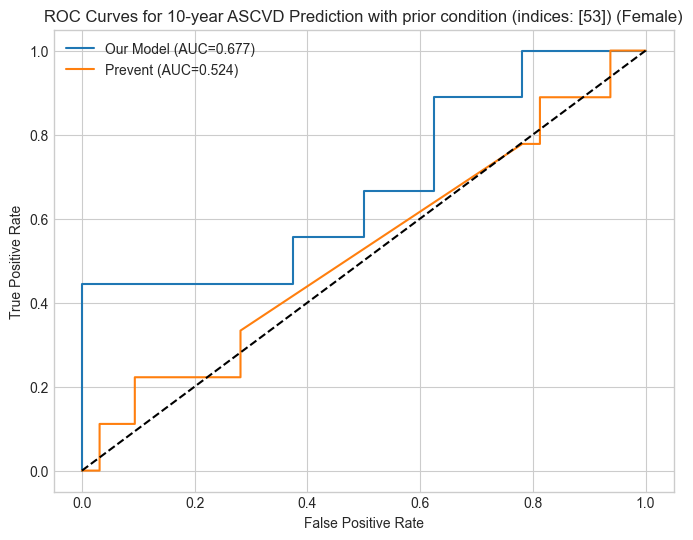

(np.float64(0.6770833333333333), np.float64(0.5243055555555556), 41)

In [216]:
# For RA (suppose RA_index = 42)
import matplotlib.pyplot as plt
import os
compare_with_prevent_prior_condition(model, pce_df, prior_condition_indices=[53], gender='Female')

In [222]:
model.disease_names[297]

np.str_('Rheumatoid arthritis')


ROC AUC Comparison (10-year prediction from enrollment) with prior condition (indices: [297]):
Our model: 0.577
Prevent: 0.597
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_priorcondition.pdf


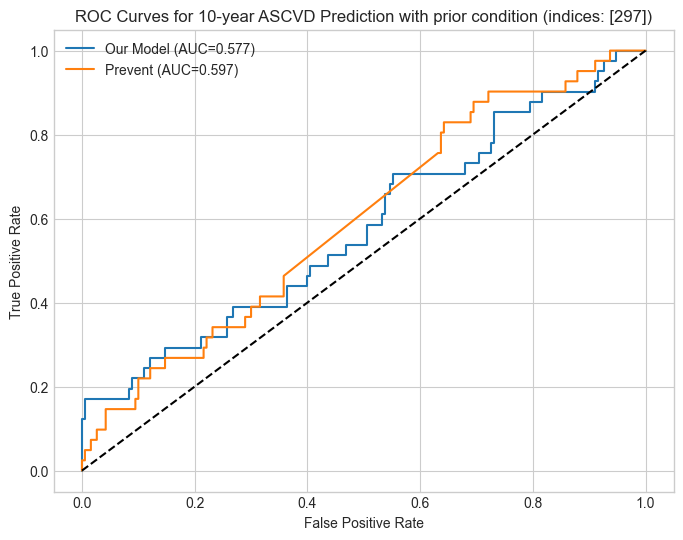

In [223]:
# For patients with RA
ra_aucs = compare_with_prevent_prior_condition(model, pce_df, [297])


In [165]:

# For patients with breast cancer
bc_aucs = compare_with_prevent_prior_condition(model, pce_df, 'Malignant neoplasm of female breast')

# For female patients with RA
ra_female_aucs = compare_with_prevent_prior_condition(model, pce_df, 'Rheumatoid arthritis', gender='Female')

NameError: name 'compare_with_prevent_prior_condition' is not defined


ROC AUC Comparison (10-year prediction from enrollment):
Our model: 0.712
Prevent: 0.653
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent.pdf


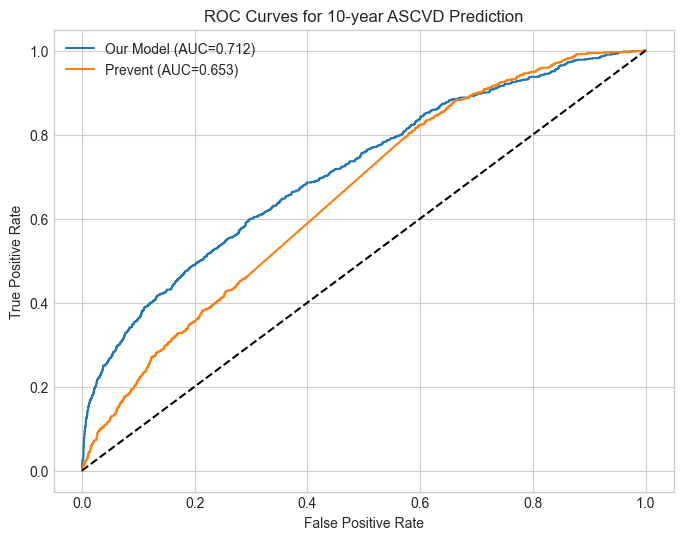


ROC AUC Comparison (10-year prediction from enrollment) (Male):
Our model: 0.701
Prevent: 0.597
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_male.pdf


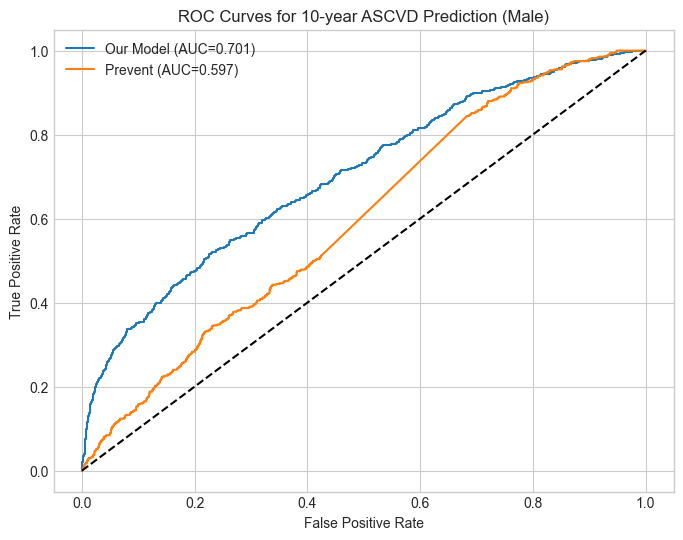


ROC AUC Comparison (10-year prediction from enrollment) (Female):
Our model: 0.667
Prevent: 0.655
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_female.pdf


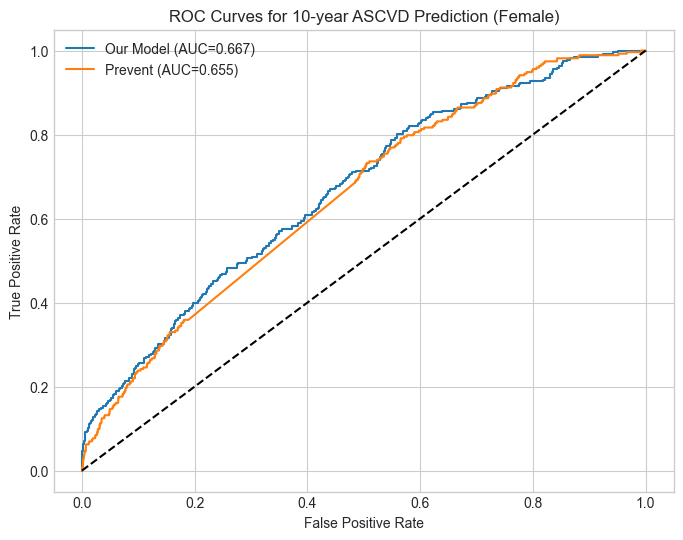

In [52]:
# For all patients (original behavior)
compare_with_prevent_sex(model, pce_df)

# For male patients only
compare_with_prevent_sex(model, pce_df, gender='Male')

# For female patients only
compare_with_prevent_sex(model, pce_df, gender='Female')

In [46]:
def compare_with_pce_sex(model, pce_df, gender=None, ascvd_indices=[111,112,113,114,115,116]):
    """
    Compare 10-year predictions using single timepoint prediction
    Optional gender parameter to filter by 'Male' or 'Female'
    """
    # Filter by gender if specified
    if gender is not None:
        # Create a boolean mask for the specified gender
        gender_mask = pce_df['Sex'] == gender
        # Get the indices of patients with the specified gender
        gender_indices = np.where(gender_mask)[0]
    else:
        # If no gender specified, include all patients
        gender_indices = range(len(pce_df))
    
    our_10yr_risks = []
    actual_10yr = []
    
    # Get predictions
    pi = model.forward()[0].detach().numpy()
    # Get mean risks across patients for calibration
    predicted_risk_2d = pi.mean(axis=0)  # Shape: [D, T]
    observed_risk_2d = model.Y.numpy().mean(axis=0)  # Shape: [D, T]
    
    # Sort and get LOESS calibration curve
    pred_flat = predicted_risk_2d.flatten()
    obs_flat = observed_risk_2d.flatten()
    sort_idx = np.argsort(pred_flat)
    smoothed = lowess(obs_flat[sort_idx], pred_flat[sort_idx], frac=0.3)
    
    # Apply calibration to all predictions using interpolation
    pi_calibrated = np.interp(pi.flatten(), smoothed[:, 0], smoothed[:, 1]).reshape(pi.shape)
    
    # Calculate 10-year risks using only enrollment time prediction
    for i, patient_idx in enumerate(gender_indices):
        row = pce_df.iloc[patient_idx]
        enroll_time = int(row.age - 30)
        
        if enroll_time + 10 >= model.T:
            continue
            
        # Only use predictions at enrollment time
        pi_ascvd = pi_calibrated[patient_idx, ascvd_indices, enroll_time]
        # Calculate 1-year risk first
        yearly_risk = 1 - np.prod(1 - pi_ascvd)
        # Convert to 10-year risk
        risk = 1 - (1 - yearly_risk)**10
        our_10yr_risks.append(risk)
        
        # Still look at actual events over 10 years
        Y_ascvd = model.Y[patient_idx, ascvd_indices, enroll_time:enroll_time+10]
        actual = torch.any(torch.any(Y_ascvd, dim=0))
        actual_10yr.append(actual.item())
    
    # Rest of the function remains the same
    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    
    # Get corresponding Prevent risks (careful to match indices from the subset)
    if gender is not None:
        # Filter pce_risks to only include the patients we evaluated
        patient_indices_evaluated = [idx for idx in gender_indices 
                                     if int(pce_df.iloc[idx].age - 30) + 10 < model.T]
        pce_risks = pce_df.iloc[patient_indices_evaluated]['pce_goff_fuull'].values
    else:
        pce_risks = pce_df['pce_goff_fuull'].values[:len(our_10yr_risks)]
    
    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    pce_auc = roc_auc_score(actual_10yr, pce_risks)
    
    gender_str = f" ({gender})" if gender else ""
    print(f"\nROC AUC Comparison (10-year prediction from enrollment){gender_str}:")
    print(f"Our model: {our_auc:.3f}")
    print(f"PCE: {pce_auc:.3f}")
    
    fig = plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, pce_risks, label=f'Prevent (AUC={pce_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for 10-year ASCVD Prediction{gender_str}')
    plt.legend()
    plt.grid(True)
    
    # Save the figure with gender-specific filename if applicable
    filename = f'roc_curve_prevent{"_" + gender.lower() if gender else ""}.pdf'
    plt.savefig(filename, bbox_inches='tight')
    print(f"Figure saved to {os.getcwd()}/{filename}")
    
    # Show the figure
    plt.show()
    # Close after showing
    plt.close(fig)


ROC AUC Comparison (10-year prediction from enrollment):
Our model: 0.695
Prevent: 0.678
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent.pdf


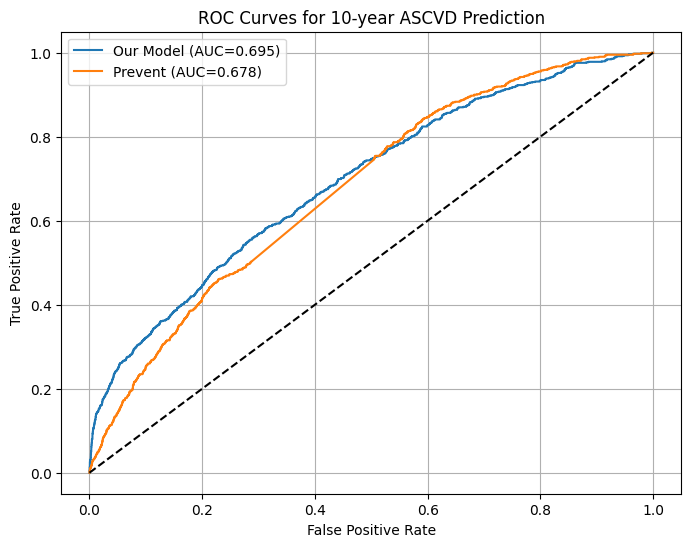


ROC AUC Comparison (10-year prediction from enrollment) (Male):
Our model: 0.707
Prevent: 0.619
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_male.pdf


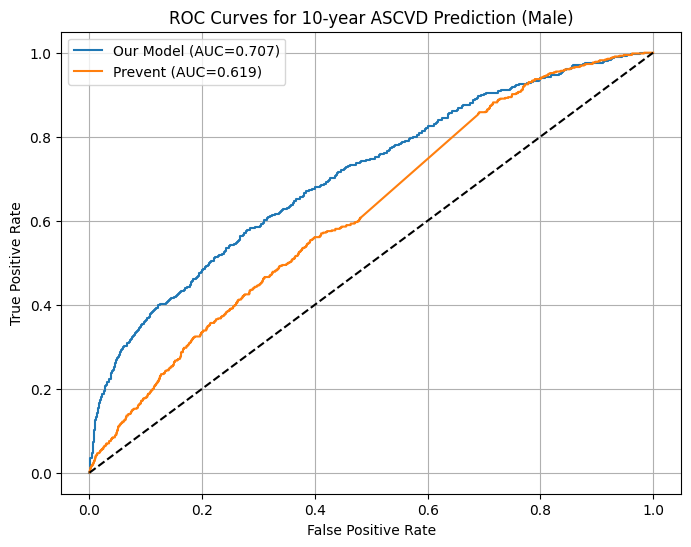


ROC AUC Comparison (10-year prediction from enrollment) (Female):
Our model: 0.669
Prevent: 0.656
Figure saved to /Users/sarahurbut/aladynoulli2/pyScripts/roc_curve_prevent_female.pdf


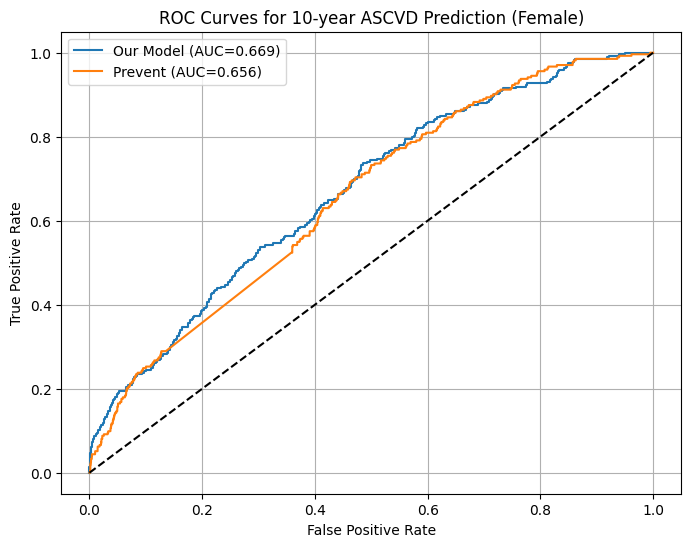

In [47]:
# For all patients (original behavior)
compare_with_pce_sex(model, pce_df)

# For male patients only
compare_with_pce_sex(model, pce_df, gender='Male')

# For female patients only
compare_with_pce_sex(model, pce_df, gender='Female')

In [168]:
# Calculate bootstrap results
from fig5utils import *
check=torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_model_W0.0001_jointphi_sexspecific.pt')
model.load_state_dict(check['model_state_dict'])
aladynoulli_results_boot_enrolle = evaluate_major_diseases_wsex_with_bootstrap(model, Y_100k, E_100k, model.disease_names, pce_df, n_bootstraps=20, follow_up_duration_years=10)
# 6. Evaluate Baseline Models on TEST data <-- UNCOMMENT THIS


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3806022721.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check=torch.load('/Users/sarahurbut/Library/C


Evaluating ASCVD (10-Year Outcome, 1-Year Score)...
AUC: 0.712 (0.702-0.722) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 831 (8.3%) (from 10000 individuals)
Excluded 0 prevalent cases for ASCVD.

   Sex-stratified analysis:
   Female: AUC = 0.668, Events = 273/5409
   Male: AUC = 0.701, Events = 558/4591

   ASCVD risk in patients with pre-existing conditions:
   RA: AUC = 0.681, Events = 8/37
   Breast_Cancer: AUC = 0.630, Events = 13/170

Evaluating Diabetes (10-Year Outcome, 1-Year Score)...
AUC: 0.622 (0.608-0.640) (calculated on 10000 individuals)
Events (10-Year in Eval Cohort): 581 (5.8%) (from 10000 individuals)
Excluded 0 prevalent cases for Diabetes.

   Sex-stratified analysis:
   Female: AUC = 0.611, Events = 264/5409
   Male: AUC = 0.624, Events = 317/4591

Evaluating Atrial_Fib (10-Year Outcome, 1-Year Score)...
AUC: 0.684 (0.660-0.710) (calculated on 9864 individuals)
Events (10-Year in Eval Cohort): 376 (3.8%) (from 10000 individuals)
Excluded 13

In [169]:
import pandas as pd

# Create DataFrame from both results
df_compare = []
for disease in aladynoulli_results_boot.keys():
    aladyn = aladynoulli_results_boot_enrolle[disease]
    cox = test_results.get(disease, {})
    
    row = {
        'Disease': disease,
        'Aladynoulli_AUC': f"{aladyn['auc']:.3f} ({aladyn['ci_lower']:.3f}-{aladyn['ci_upper']:.3f})",
        'Cox_Concordance': f"{cox.get('c_index', np.nan):.3f} ({cox.get('ci', (np.nan, np.nan))[0]:.3f}-{cox.get('ci', (np.nan, np.nan))[1]:.3f})" if cox.get('c_index') is not None else "N/A",
        'Events': aladyn['n_events'],
        'Rate': f"{aladyn['event_rate']:.1f}%"
    }
    df_compare.append(row)

df_compare = pd.DataFrame(df_compare)

# Sort by number of events descending
df_compare = df_compare.sort_values('Events', ascending=False)

# Save to CSV for R
df_compare.to_csv('model_comparison_results.csv', index=False)

# Display nicely formatted table in Python
print("\nModel Comparison Results:")
print("-" * 100)
print(df_compare.to_string(index=False))


Model Comparison Results:
----------------------------------------------------------------------------------------------------
             Disease     Aladynoulli_AUC     Cox_Concordance  Events Rate
               ASCVD 0.712 (0.702-0.722) 0.650 (0.630-0.668)     831 8.3%
              Asthma 0.511 (0.480-0.551) 0.520 (0.502-0.539)     606 6.1%
            Diabetes 0.622 (0.608-0.640) 0.606 (0.580-0.628)     581 5.8%
              Anemia 0.593 (0.571-0.627) 0.549 (0.517-0.573)     523 5.2%
         All_Cancers 0.680 (0.661-0.699) 0.615 (0.587-0.641)     480 4.8%
   Thyroid_Disorders 0.579 (0.556-0.605) 0.649 (0.634-0.666)     479 4.8%
          Depression 0.470 (0.448-0.500) 0.559 (0.535-0.584)     405 4.0%
                COPD 0.646 (0.625-0.680) 0.535 (0.510-0.568)     394 3.9%
          Atrial_Fib 0.684 (0.660-0.710) 0.584 (0.562-0.610)     376 3.8%
           Pneumonia 0.683 (0.658-0.705) 0.561 (0.530-0.588)     335 3.4%
    Secondary_Cancer 0.607 (0.571-0.636) 0.474 (0.438-0.51

In [163]:
import pandas as pd

# Create DataFrame from both results
df_compare = []
for disease in aladynoulli_results_boot.keys():
    aladyn = aladynoulli_results_boot[disease]
    cox = test_results.get(disease, {})
    
    row = {
        'Disease': disease,
        'Aladynoulli_AUC': f"{aladyn['auc']:.3f} ({aladyn['ci_lower']:.3f}-{aladyn['ci_upper']:.3f})",
        'Cox_Concordance': f"{cox.get('c_index', np.nan):.3f} ({cox.get('ci', (np.nan, np.nan))[0]:.3f}-{cox.get('ci', (np.nan, np.nan))[1]:.3f})" if cox.get('c_index') is not None else "N/A",
        'Events': aladyn['n_events'],
        'Rate': f"{aladyn['event_rate']:.1f}%"
    }
    df_compare.append(row)

df_compare = pd.DataFrame(df_compare)

# Sort by number of events descending
df_compare = df_compare.sort_values('Events', ascending=False)

# Save to CSV for R
df_compare.to_csv('model_comparison_results.csv', index=False)

# Display nicely formatted table in Python
print("\nModel Comparison Results:")
print("-" * 100)
print(df_compare.to_string(index=False))


Model Comparison Results:
----------------------------------------------------------------------------------------------------
             Disease     Aladynoulli_AUC     Cox_Concordance  Events Rate
               ASCVD 0.801 (0.787-0.817) 0.650 (0.630-0.668)     831 8.3%
              Asthma 0.608 (0.596-0.635) 0.520 (0.502-0.539)     606 6.1%
            Diabetes 0.671 (0.650-0.686) 0.606 (0.580-0.628)     581 5.8%
              Anemia 0.637 (0.616-0.662) 0.549 (0.517-0.573)     523 5.2%
         All_Cancers 0.705 (0.689-0.721) 0.615 (0.587-0.641)     480 4.8%
   Thyroid_Disorders 0.638 (0.616-0.658) 0.649 (0.634-0.666)     479 4.8%
          Depression 0.558 (0.532-0.604) 0.559 (0.535-0.584)     405 4.0%
                COPD 0.673 (0.654-0.691) 0.535 (0.510-0.568)     394 3.9%
          Atrial_Fib 0.750 (0.719-0.763) 0.584 (0.562-0.610)     376 3.8%
           Pneumonia 0.707 (0.680-0.731) 0.561 (0.530-0.588)     335 3.4%
    Secondary_Cancer 0.630 (0.601-0.666) 0.474 (0.438-0.51

In [33]:
test_results2

{'ASCVD': {'auc': np.float64(0.6839388535793269),
  'ci': (np.float64(0.6635473202898621), np.float64(0.7025495214170411)),
  'n_events': 530,
  'n_total': 10000},
 'Diabetes': {'auc': np.float64(0.6445550146835808),
  'ci': (np.float64(0.624431314314788), np.float64(0.6644882252507779)),
  'n_events': 581,
  'n_total': 10000},
 'Atrial_Fib': {'auc': np.float64(0.7117945937461311),
  'ci': (np.float64(0.6885084242811853), np.float64(0.7351374065619379)),
  'n_events': 376,
  'n_total': 10000},
 'CKD': {'auc': np.float64(0.6991033673279023),
  'ci': (np.float64(0.652631469386943), np.float64(0.7473325814699752)),
  'n_events': 104,
  'n_total': 10000},
 'All_Cancers': {'auc': np.float64(0.7126250591356433),
  'ci': (np.float64(0.6908899903924174), np.float64(0.7346742335748655)),
  'n_events': 319,
  'n_total': 10000},
 'Stroke': {'auc': np.float64(0.6465005055383625),
  'ci': (np.float64(0.5675206520640493), np.float64(0.731634863192526)),
  'n_events': 49,
  'n_total': 10000},
 'Heart

In [162]:
import pandas as pd

# Create DataFrame from both results
df_compare = []
for disease in aladynoulli_results_boot.keys():
    aladyn = result_dynamic[disease]
    cox = test_results2.get(disease, {})
    
    row = {
        'Disease': disease,
        'Aladynoulli_AUC': f"{aladyn['auc']:.3f} ({aladyn['ci_lower']:.3f}-{aladyn['ci_upper']:.3f})",
        'Cox_AUC': f"{cox.get('auc', np.nan):.3f} ({cox.get('ci', (np.nan, np.nan))[0]:.3f}-{cox.get('ci', (np.nan, np.nan))[1]:.3f})" if cox.get('auc') is not None else "N/A",
        'Events': aladyn['n_events'],
        'Rate': f"{aladyn['event_rate']:.1f}%"
    }
    df_compare.append(row)

df_compare = pd.DataFrame(df_compare)

# Sort by number of events descending
df_compare = df_compare.sort_values('Events', ascending=False)

# Save to CSV for R
df_compare.to_csv('model_comparison_results2.csv', index=False)

# Display nicely formatted table in Python
print("\nModel Comparison Results:")
print("-" * 100)
print(df_compare.to_string(index=False))


Model Comparison Results:
----------------------------------------------------------------------------------------------------
             Disease     Aladynoulli_AUC             Cox_AUC  Events Rate
               ASCVD 0.875 (0.861-0.887) 0.684 (0.664-0.703)     831 8.3%
              Asthma 0.691 (0.669-0.712) 0.499 (0.472-0.524)     606 6.3%
            Diabetes 0.741 (0.717-0.766) 0.645 (0.624-0.664)     581 5.8%
              Anemia 0.719 (0.688-0.743) 0.568 (0.532-0.607)     523 5.2%
         All_Cancers 0.765 (0.746-0.792) 0.713 (0.691-0.735)     480 4.8%
   Thyroid_Disorders 0.709 (0.683-0.729) 0.634 (0.611-0.658)     479 4.8%
          Depression 0.673 (0.646-0.701) 0.474 (0.439-0.499)     405 4.1%
                COPD 0.760 (0.733-0.788) 0.652 (0.617-0.679)     394 3.9%
          Atrial_Fib 0.775 (0.745-0.802) 0.712 (0.689-0.735)     376 3.8%
           Pneumonia 0.784 (0.760-0.809) 0.687 (0.662-0.711)     335 3.4%
    Secondary_Cancer 0.715 (0.678-0.758) 0.630 (0.600-0.66

In [171]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/')
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

import torch
import numpy as np


Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/983871033.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/Li


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [172]:

# Load the model
model_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox/resultsenrollAWS/results/output_20000_30000/model.pt'
model.load_state_dict(torch.load(model_path)['model_state_dict'])

# Get predictions (pi) from the model
with torch.no_grad():
    pi, _, _ = model.forward()  # pi shape: (N, D, T)

# For each subject, get their enrollment age (from your covariate DataFrame)
# Suppose FH_train is your DataFrame for the training set (reset index to match order)
aladynoulli_1yr_risk_train = []
for i, row in FH_train.iterrows():
    enroll_time = int(row['age'] - 30)
    # Choose the disease indices you want (e.g., ASCVD indices)
    # For a single disease: d_idx = ...
    # For a group: d_indices = [...]
    # Example for ASCVD:
    d_indices = [111, 112, 113, 114, 115, 116]  # adjust as needed
    if enroll_time < 0 or enroll_time >= pi.shape[2]:
        aladynoulli_1yr_risk_train.append(np.nan)
        continue
    # 1-year risk for ASCVD group at enrollment
    pi_diseases = pi[i, d_indices, enroll_time]
    yearly_risk = 1 - torch.prod(1 - pi_diseases)
    aladynoulli_1yr_risk_train.append(yearly_risk.item())

aladynoulli_1yr_risk_train = np.array(aladynoulli_1yr_risk_train)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/3921578381.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)[

In [176]:
batch_start = 20000
batch_end = 30000

# Slice your data for the batch
Y_batch = Y[batch_start:batch_end]
FH_batch = fh_processed.iloc[batch_start:batch_end].reset_index(drop=True)
aladynoulli_1yr_risk_batch = aladynoulli_1yr_risk_train  # Should already be length 10,000

# Indices are now 0-based for this batch
relative_train_indices = np.arange(0, batch_end - batch_start)

# Fit the Cox model with Aladynoulli 1-year risk as covariate
fitted_models = fit_cox_baseline_models_with_aladynoulli(
    Y_batch,
    FH_batch,
    aladynoulli_1yr_risk_batch,
    train_indices=relative_train_indices,
    disease_mapping=disease_mapping,
    major_diseases=major_diseases,
    disease_names=disease_names,
    follow_up_duration_years=10
)

Fitting Cox models (with Aladynoulli 1-year risk) using training indices [0:10000]...
 - Fitting ASCVD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for ASCVD using 20000 samples.
 - Fitting Diabetes...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Diabetes using 20000 samples.
 - Fitting Atrial_Fib...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Atrial_Fib using 9877 samples.
   Excluded 123 prevalent cases for Atrial_Fib.
 - Fitting CKD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for CKD using 9989 samples.
   Excluded 11 prevalent cases for CKD.
 - Fitting All_Cancers...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for All_Cancers using 30000 samples.
 - Fitting Stroke...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Stroke using 9978 samples.
   Excluded 22 prevalent cases for Stroke.
 - Fitting Heart_Failure...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Heart_Failure using 9987 samples.
   Excluded 13 prevalent cases for Heart_Failure.
 - Fitting Pneumonia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Pneumonia using 30000 samples.
 - Fitting COPD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for COPD using 9971 samples.
   Excluded 29 prevalent cases for COPD.
 - Fitting Osteoporosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Osteoporosis using 9976 samples.
   Excluded 24 prevalent cases for Osteoporosis.
 - Fitting Anemia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Anemia using 9937 samples.
   Excluded 63 prevalent cases for Anemia.
 - Fitting Colorectal_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Colorectal_Cancer using 9975 samples.
   Excluded 25 prevalent cases for Colorectal_Cancer.
 - Fitting Breast_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Breast_Cancer using 5356 samples.
   Excluded 39 prevalent cases for Breast_Cancer.
 - Fitting Prostate_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Prostate_Cancer using 4554 samples.
   Excluded 51 prevalent cases for Prostate_Cancer.
 - Fitting Lung_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Lung_Cancer using 9996 samples.
   Excluded 4 prevalent cases for Lung_Cancer.
 - Fitting Bladder_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Bladder_Cancer using 9979 samples.
   Excluded 21 prevalent cases for Bladder_Cancer.
 - Fitting Secondary_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Secondary_Cancer using 30000 samples.
 - Fitting Depression...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Depression using 9918 samples.
   Excluded 82 prevalent cases for Depression.
 - Fitting Anxiety...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Anxiety using 9979 samples.
   Excluded 21 prevalent cases for Anxiety.
 - Fitting Bipolar_Disorder...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Bipolar_Disorder using 9985 samples.
   Excluded 15 prevalent cases for Bipolar_Disorder.
 - Fitting Rheumatoid_Arthritis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Rheumatoid_Arthritis using 9950 samples.
   Excluded 50 prevalent cases for Rheumatoid_Arthritis.
 - Fitting Psoriasis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Psoriasis using 9982 samples.
   Excluded 18 prevalent cases for Psoriasis.
 - Fitting Ulcerative_Colitis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Ulcerative_Colitis using 9949 samples.
   Excluded 51 prevalent cases for Ulcerative_Colitis.
 - Fitting Crohns_Disease...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Crohns_Disease using 9971 samples.
   Excluded 29 prevalent cases for Crohns_Disease.
 - Fitting Asthma...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Asthma using 9694 samples.
   Excluded 306 prevalent cases for Asthma.
 - Fitting Parkinsons...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Parkinsons using 9996 samples.
   Excluded 4 prevalent cases for Parkinsons.
 - Fitting Multiple_Sclerosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   Model fitted for Multiple_Sclerosis using 9970 samples.
   Excluded 30 prevalent cases for Multiple_Sclerosis.
 - Fitting Thyroid_Disorders...
   Model fitted for Thyroid_Disorders using 9873 samples.
   Excluded 127 prevalent cases for Thyroid_Disorders.
Finished fitting Cox models (with Aladynoulli 1-year risk).


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


In [193]:
model_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/resultsenrollAWS/results/output_10000_20000/model.pt'
model.load_state_dict(torch.load(model_path)['model_state_dict'])

# Get predictions (pi) from the model
with torch.no_grad():
    pi, _, _ = model.forward()  # pi shape: (N, D, T)

# For each subject, get their enrollment age (from your covariate DataFrame)
# Suppose FH_train is your DataFrame for the training set (reset index to match order)
aladynoulli_1yr_risk_test = []
for i, row in FH_train.iterrows():
    enroll_time = int(row['age'] - 30)
    # Choose the disease indices you want (e.g., ASCVD indices)
    # For a single disease: d_idx = ...
    # For a group: d_indices = [...]
    # Example for ASCVD:
    d_indices = [111, 112, 113, 114, 115, 116]  # adjust as needed
    if enroll_time < 0 or enroll_time >= pi.shape[2]:
        aladynoulli_1yr_risk_train.append(np.nan)
        continue
    # 1-year risk for ASCVD group at enrollment
    pi_diseases = pi[i, d_indices, enroll_time]
    yearly_risk = 1 - torch.prod(1 - pi_diseases)
    aladynoulli_1yr_risk_test.append(yearly_risk.item())

aladynoulli_1yr_risk_test = np.array(aladynoulli_1yr_risk_test)
aladynoulli_1yr_risk_test.shape

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/554536434.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['

(10000,)

In [199]:
from fig5utils import *
test_start = 0
test_end = 10000

Y_test = Y[test_start:test_end]
FH_test = fh_processed.iloc[test_start:test_end].reset_index(drop=True)
   # If you have Aladynoulli 1-year risk for the test set, use:
aladynoulli_1yr_risk_test = aladynoulli_1yr_risk_test  # Should be length 10,000, one per patient in this batch

results = evaluate_cox_baseline_models_auc_with_aladynoulli(
    fitted_models,
    Y_test,
    FH_test,
    disease_mapping,
    major_diseases,
    disease_names,
    aladynoulli_1yr_risk_test,
    follow_up_duration_years=10,
    n_bootstraps=100
)



Evaluating Cox models (with Aladynoulli 1-year risk as covariate, 10-year AUC)...
 - Evaluating ASCVD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.661 (0.638-0.681) | Events: 530/10000
 - Evaluating Diabetes...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.598 (0.577-0.622) | Events: 581/10000
 - Evaluating Atrial_Fib...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.593 (0.567-0.623) | Events: 376/10000
 - Evaluating CKD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.546 (0.499-0.594) | Events: 104/10000
 - Evaluating All_Cancers...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.640 (0.609-0.663) | Events: 319/10000
 - Evaluating Stroke...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.583 (0.501-0.644) | Events: 49/10000
 - Evaluating Heart_Failure...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.610 (0.548-0.676) | Events: 84/10000
 - Evaluating Pneumonia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.579 (0.543-0.613) | Events: 335/10000
 - Evaluating COPD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.535 (0.495-0.570) | Events: 272/10000
 - Evaluating Osteoporosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.649 (0.619-0.678) | Events: 219/10000
 - Evaluating Anemia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.515 (0.481-0.550) | Events: 272/10000
 - Evaluating Colorectal_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.570 (0.510-0.633) | Events: 75/10000
 - Evaluating Breast_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.508 (0.435-0.598) | Events: 42/5409
 - Evaluating Prostate_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.514 (0.476-0.559) | Events: 204/4591
 - Evaluating Lung_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.554 (0.479-0.612) | Events: 75/10000
 - Evaluating Bladder_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.737 (0.680-0.790) | Events: 49/10000
 - Evaluating Secondary_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.564 (0.521-0.609) | Events: 154/10000
 - Evaluating Depression...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.554 (0.528-0.585) | Events: 405/10000
 - Evaluating Anxiety...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.555 (0.520-0.593) | Events: 241/10000
 - Evaluating Bipolar_Disorder...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.609 (0.542-0.690) | Events: 34/10000
 - Evaluating Rheumatoid_Arthritis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.552 (0.498-0.592) | Events: 123/10000
 - Evaluating Psoriasis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.558 (0.477-0.646) | Events: 40/10000
 - Evaluating Ulcerative_Colitis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.566 (0.481-0.653) | Events: 50/10000
 - Evaluating Crohns_Disease...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.558 (0.465-0.672) | Events: 31/10000
 - Evaluating Asthma...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.532 (0.515-0.552) | Events: 606/10000
 - Evaluating Parkinsons...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.536 (0.422-0.600) | Events: 46/10000
 - Evaluating Multiple_Sclerosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.685 (0.565-0.783) | Events: 21/10000
 - Evaluating Thyroid_Disorders...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.641 (0.614-0.665) | Events: 424/10000
Finished evaluating Cox models (with Aladynoulli 1-year risk, 10-year AUC).


In [ ]:
from fig5utils import *
test_start = 0
test_end = 10000

Y_test = Y[test_start:test_end]
FH_test = fh_processed.iloc[test_start:test_end].reset_index(drop=True)
   # If you have Aladynoulli 1-year risk for the test set, use:
aladynoulli_1yr_risk_test = aladynoulli_1yr_risk_test  # Should be length 10,000, one per patient in this batch

results = evaluate_cox_baseline_models_auc_with_aladynoulli(
    fitted_models,
    Y_test,
    FH_test,
    disease_mapping,
    major_diseases,
    disease_names,
    aladynoulli_1yr_risk_test,
    follow_up_duration_years=10,
    n_bootstraps=100
)



Evaluating Cox models (with Aladynoulli 1-year risk as covariate, 10-year AUC)...
 - Evaluating ASCVD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.661 (0.638-0.681) | Events: 530/10000
 - Evaluating Diabetes...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.598 (0.577-0.622) | Events: 581/10000
 - Evaluating Atrial_Fib...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.593 (0.567-0.623) | Events: 376/10000
 - Evaluating CKD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.546 (0.499-0.594) | Events: 104/10000
 - Evaluating All_Cancers...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.640 (0.609-0.663) | Events: 319/10000
 - Evaluating Stroke...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.583 (0.501-0.644) | Events: 49/10000
 - Evaluating Heart_Failure...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.610 (0.548-0.676) | Events: 84/10000
 - Evaluating Pneumonia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.579 (0.543-0.613) | Events: 335/10000
 - Evaluating COPD...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.535 (0.495-0.570) | Events: 272/10000
 - Evaluating Osteoporosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.649 (0.619-0.678) | Events: 219/10000
 - Evaluating Anemia...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.515 (0.481-0.550) | Events: 272/10000
 - Evaluating Colorectal_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.570 (0.510-0.633) | Events: 75/10000
 - Evaluating Breast_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.508 (0.435-0.598) | Events: 42/5409
 - Evaluating Prostate_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.514 (0.476-0.559) | Events: 204/4591
 - Evaluating Lung_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.554 (0.479-0.612) | Events: 75/10000
 - Evaluating Bladder_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.737 (0.680-0.790) | Events: 49/10000
 - Evaluating Secondary_Cancer...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.564 (0.521-0.609) | Events: 154/10000
 - Evaluating Depression...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.554 (0.528-0.585) | Events: 405/10000
 - Evaluating Anxiety...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.555 (0.520-0.593) | Events: 241/10000
 - Evaluating Bipolar_Disorder...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.609 (0.542-0.690) | Events: 34/10000
 - Evaluating Rheumatoid_Arthritis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.552 (0.498-0.592) | Events: 123/10000
 - Evaluating Psoriasis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.558 (0.477-0.646) | Events: 40/10000
 - Evaluating Ulcerative_Colitis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.566 (0.481-0.653) | Events: 50/10000
 - Evaluating Crohns_Disease...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.558 (0.465-0.672) | Events: 31/10000
 - Evaluating Asthma...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.532 (0.515-0.552) | Events: 606/10000
 - Evaluating Parkinsons...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.536 (0.422-0.600) | Events: 46/10000
 - Evaluating Multiple_Sclerosis...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.685 (0.565-0.783) | Events: 21/10000
 - Evaluating Thyroid_Disorders...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['aladynoulli_1yr'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


   10-year AUC (Cox+Aladynoulli 1yr): 0.641 (0.614-0.665) | Events: 424/10000
Finished evaluating Cox models (with Aladynoulli 1-year risk, 10-year AUC).


In [200]:
results

{'ASCVD': {'auc': np.float64(0.6605596620908132),
  'ci': (np.float64(0.6383607522966973), np.float64(0.6813388026066137)),
  'n_events': 530,
  'n_total': 10000},
 'Diabetes': {'auc': np.float64(0.597883959967393),
  'ci': (np.float64(0.5774157809204221), np.float64(0.6222279150757102)),
  'n_events': 581,
  'n_total': 10000},
 'Atrial_Fib': {'auc': np.float64(0.5926882704586053),
  'ci': (np.float64(0.5666477004745255), np.float64(0.6228856554759845)),
  'n_events': 376,
  'n_total': 10000},
 'CKD': {'auc': np.float64(0.5457969614762763),
  'ci': (np.float64(0.4993715832282642), np.float64(0.5938760646902729)),
  'n_events': 104,
  'n_total': 10000},
 'All_Cancers': {'auc': np.float64(0.6399752415535196),
  'ci': (np.float64(0.6086566326431123), np.float64(0.663253323653342)),
  'n_events': 319,
  'n_total': 10000},
 'Stroke': {'auc': np.float64(0.5831236323290245),
  'ci': (np.float64(0.500879913785702), np.float64(0.6443812849329942)),
  'n_events': 49,
  'n_total': 10000},
 'Heart

In [191]:
aladynoulli_1yr_risk_test.shape


(10000,)

In [166]:
import pandas as pd

# Create DataFrame from both results
df_compare = []
for disease in aladynoulli_results_boot.keys():
    aladyn = result_dynamic[disease]
    cox = test_results2.get(disease, {})
    
    row = {
        'Disease': disease,
        'Aladynoulli_AUC': f"{aladyn['auc']:.3f} ({aladyn['ci_lower']:.3f}-{aladyn['ci_upper']:.3f})",
        'Cox_AUC': f"{cox.get('auc', np.nan):.3f} ({cox.get('ci', (np.nan, np.nan))[0]:.3f}-{cox.get('ci', (np.nan, np.nan))[1]:.3f})" if cox.get('auc') is not None else "N/A",
        'Events': aladyn['n_events'],
        'Rate': f"{aladyn['event_rate']:.1f}%"
    }
    df_compare.append(row)

df_compare = pd.DataFrame(df_compare)

# Sort by number of events descending
df_compare = df_compare.sort_values('Events', ascending=False)

# Save to CSV for R
df_compare.to_csv('model_comparison_results2.csv', index=False)

# Display nicely formatted table in Python
print("\nModel Comparison Results:")
print("-" * 100)
print(df_compare.to_string(index=False))


Model Comparison Results:
----------------------------------------------------------------------------------------------------
             Disease     Aladynoulli_AUC             Cox_AUC  Events Rate
               ASCVD 0.875 (0.861-0.887) 0.684 (0.664-0.703)     831 8.3%
              Asthma 0.691 (0.669-0.712) 0.499 (0.472-0.524)     606 6.3%
            Diabetes 0.741 (0.717-0.766) 0.645 (0.624-0.664)     581 5.8%
              Anemia 0.719 (0.688-0.743) 0.568 (0.532-0.607)     523 5.2%
         All_Cancers 0.765 (0.746-0.792) 0.713 (0.691-0.735)     480 4.8%
   Thyroid_Disorders 0.709 (0.683-0.729) 0.634 (0.611-0.658)     479 4.8%
          Depression 0.673 (0.646-0.701) 0.474 (0.439-0.499)     405 4.1%
                COPD 0.760 (0.733-0.788) 0.652 (0.617-0.679)     394 3.9%
          Atrial_Fib 0.775 (0.745-0.802) 0.712 (0.689-0.735)     376 3.8%
           Pneumonia 0.784 (0.760-0.809) 0.687 (0.662-0.711)     335 3.4%
    Secondary_Cancer 0.715 (0.678-0.758) 0.630 (0.600-0.66

In [45]:
checkpoint_full=torch.load("/Users/sarahurbut/Library/Cloudstorage/Dropbox/")


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48825/1968068960.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_full=torch.load("/Users/sarahurbut

In [47]:
checkpoint_full['model_state_dict']['phi'][5,112,:]

tensor([-12.4683, -12.4135, -12.2447, -11.9759, -11.6268, -11.2202, -10.7786,
        -10.3210,  -9.8620,  -9.4117,  -8.9761,  -8.5580,  -8.1571,  -7.7739,
         -7.4086,  -7.0609,  -6.7316,  -6.4201,  -6.1355,  -5.8704,  -5.6319,
         -5.4229,  -5.2419,  -5.0898,  -4.9653,  -4.8698,  -4.7978,  -4.7452,
         -4.7127,  -4.6941,  -4.6798,  -4.6734,  -4.6644,  -4.6572,  -4.6427,
         -4.6187,  -4.5941,  -4.5637,  -4.5272,  -4.4997,  -4.4738,  -4.4596,
         -4.4629,  -4.5004,  -4.5557,  -4.6492,  -4.7768,  -4.9428,  -5.1451,
         -5.3818,  -5.6511,  -5.9535])

In [44]:
model.phi[5,112,:]

tensor([-12.6056, -12.4968, -12.2764, -11.9613, -11.5738, -11.1388, -10.6800,
        -10.2176,  -9.7664,  -9.3356,  -8.9301,  -8.5506,  -8.1948,  -7.8604,
         -7.5439,  -7.2423,  -6.9525,  -6.6727,  -6.4078,  -6.1511,  -5.9065,
         -5.6765,  -5.4623,  -5.2650,  -5.0847,  -4.9275,  -4.7924,  -4.6797,
         -4.5910,  -4.5286,  -4.4856,  -4.4677,  -4.4711,  -4.4964,  -4.5391,
         -4.5981,  -4.6759,  -4.7644,  -4.8615,  -4.9699,  -5.0830,  -5.1999,
         -5.3158,  -5.4288,  -5.5332,  -5.6246,  -5.6966,  -5.7434,  -5.7583,
         -5.7359,  -5.6714,  -5.5621], grad_fn=<SliceBackward0>)

In [ ]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1]+1,
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_41147/1483308362.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/D


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07


RuntimeError: The expanded size of the tensor (37) must match the existing size (36) at non-singleton dimension 0.  Target sizes: [37].  Tensor sizes: [36]

In [ ]:

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()
# When initializing the model:
original_G = G # Store the original G - proper tensor copy

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1]+1,
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters

Loading components...


/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/Users/sarahurbut/aladynoul

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_41147/1483308362.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/D


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07


RuntimeError: The expanded size of the tensor (37) must match the existing size (36) at non-singleton dimension 0.  Target sizes: [37].  Tensor sizes: [36]

In [7]:
from fig5utils import *
enrollment_df_full=pd.read_csv('/Users/sarahurbut/Dropbox/baselinagefamh.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahurbut/Dropbox/baselinagefamh.csv'

In [ ]:
event_rate_results = calculate_enrollment_event_rates(Y, enrollment_df_full, model.disease_names, major_diseases)

In [51]:
import pandas as pd
import numpy as np

def calc_binomial_se(p, n):
    se = np.sqrt((p * (1-p)) / n)
    ci_lower = p - 1.96*se
    ci_upper = p + 1.96*se
    return se, ci_lower, ci_upper

# Create dataframe
df_data = []
for disease, results in event_rate_results.items():
    # Get event rates from results
    rate = results['rate_10y']
    n = results['processed_10y']
    events = results['count_10y']
    
    # Calculate CIs for event rate
    rate_se, rate_ci_lower, rate_ci_upper = calc_binomial_se(rate, n)
    
    # Get model performances
    aladyn_perf = aladyn_results.get(disease, {})
    cox_perf = test_results.get(disease, {})
    
    # Calculate CIs for Aladynoulli AUC
    if aladyn_perf.get('auc') is not None:
        auc = aladyn_perf['auc']
        n_test = aladyn_perf.get('n_events', 0)  # number of events in test set
        if n_test > 0:
            auc_se, auc_ci_lower, auc_ci_upper = calc_binomial_se(auc, n_test)
        else:
            auc_se, auc_ci_lower, auc_ci_upper = np.nan, np.nan, np.nan
    else:
        auc, auc_se, auc_ci_lower, auc_ci_upper = np.nan, np.nan, np.nan, np.nan
    
    row = {
        'disease': disease,
        'event_rate': rate,
        'event_rate_se': rate_se,
        'event_rate_ci_lower': rate_ci_lower,
        'event_rate_ci_upper': rate_ci_upper,
        'n_total': n,
        'n_events_10yr': events,
        'aladynoulli_auc': auc,
        'aladynoulli_se': auc_se,
        'aladynoulli_ci_lower': auc_ci_lower,
        'aladynoulli_ci_upper': auc_ci_upper,
        'cox_auc': cox_perf.get('c_index', np.nan),
        'cox_ci_lower': cox_perf.get('ci', (np.nan, np.nan))[0],
        'cox_ci_upper': cox_perf.get('ci', (np.nan, np.nan))[1],
        'n_events_test': cox_perf.get('n_events', np.nan),
        'n_total_test': cox_perf.get('n_total', np.nan)
    }
    df_data.append(row)

df_final = pd.DataFrame(df_data)

# Show preview
print("\nFirst few rows of the dataframe:")
print(df_final.head())

# Save to CSV for R
df_final.to_csv('disease_performance_summary.csv', index=False)


First few rows of the dataframe:
       disease  event_rate  event_rate_se  event_rate_ci_lower  \
0        ASCVD    0.055313       0.000358             0.054612   
1     Diabetes    0.059430       0.000370             0.058704   
2   Atrial_Fib    0.038144       0.000300             0.037556   
3          CKD    0.011891       0.000170             0.011558   
4  All_Cancers    0.031215       0.000272             0.030682   

   event_rate_ci_upper  n_total  n_events_10yr  aladynoulli_auc  \
0             0.056015   407878          22561         0.695008   
1             0.060155   407878          24240         0.626884   
2             0.038732   407878          15558         0.677583   
3             0.012223   407878           4850         0.707499   
4             0.031749   407878          12732         0.636691   

   aladynoulli_se  aladynoulli_ci_lower  aladynoulli_ci_upper   cox_auc  \
0        0.015971              0.663704              0.726311  0.649502   
1        0.02006

In [53]:
# Calculate bootstrap results
from fig5utils import *
aladynoulli_bootstrap_results = calculate_bootstrap_aucs(model, Y_100k, pce_df, model.disease_names, major_diseases)



Processing ASCVD...
AUC: 0.683 (0.664-0.707)
Events: 530/10000

Processing Diabetes...
AUC: 0.627 (0.602-0.651)
Events: 581/10000

Processing Atrial_Fib...
AUC: 0.678 (0.655-0.700)
Events: 376/10000

Processing CKD...
AUC: 0.687 (0.638-0.738)
Events: 104/10000

Processing All_Cancers...
AUC: 0.655 (0.623-0.678)
Events: 319/10000

Processing Stroke...
AUC: 0.637 (0.566-0.725)
Events: 49/10000

Processing Heart_Failure...
AUC: 0.774 (0.715-0.821)
Events: 84/10000

Processing Pneumonia...
AUC: 0.682 (0.655-0.704)
Events: 335/10000

Processing COPD...
AUC: 0.648 (0.615-0.675)
Events: 272/10000

Processing Osteoporosis...
AUC: 0.666 (0.632-0.699)
Events: 219/10000

Processing Anemia...
AUC: 0.571 (0.533-0.608)
Events: 272/10000

Processing Colorectal_Cancer...
AUC: 0.661 (0.589-0.725)
Events: 75/10000

Processing Breast_Cancer...
AUC: 0.627 (0.555-0.716)
Events: 42/5409

Processing Prostate_Cancer...
AUC: 0.670 (0.639-0.696)
Events: 204/4591

Processing Lung_Cancer...
AUC: 0.691 (0.642-0.7

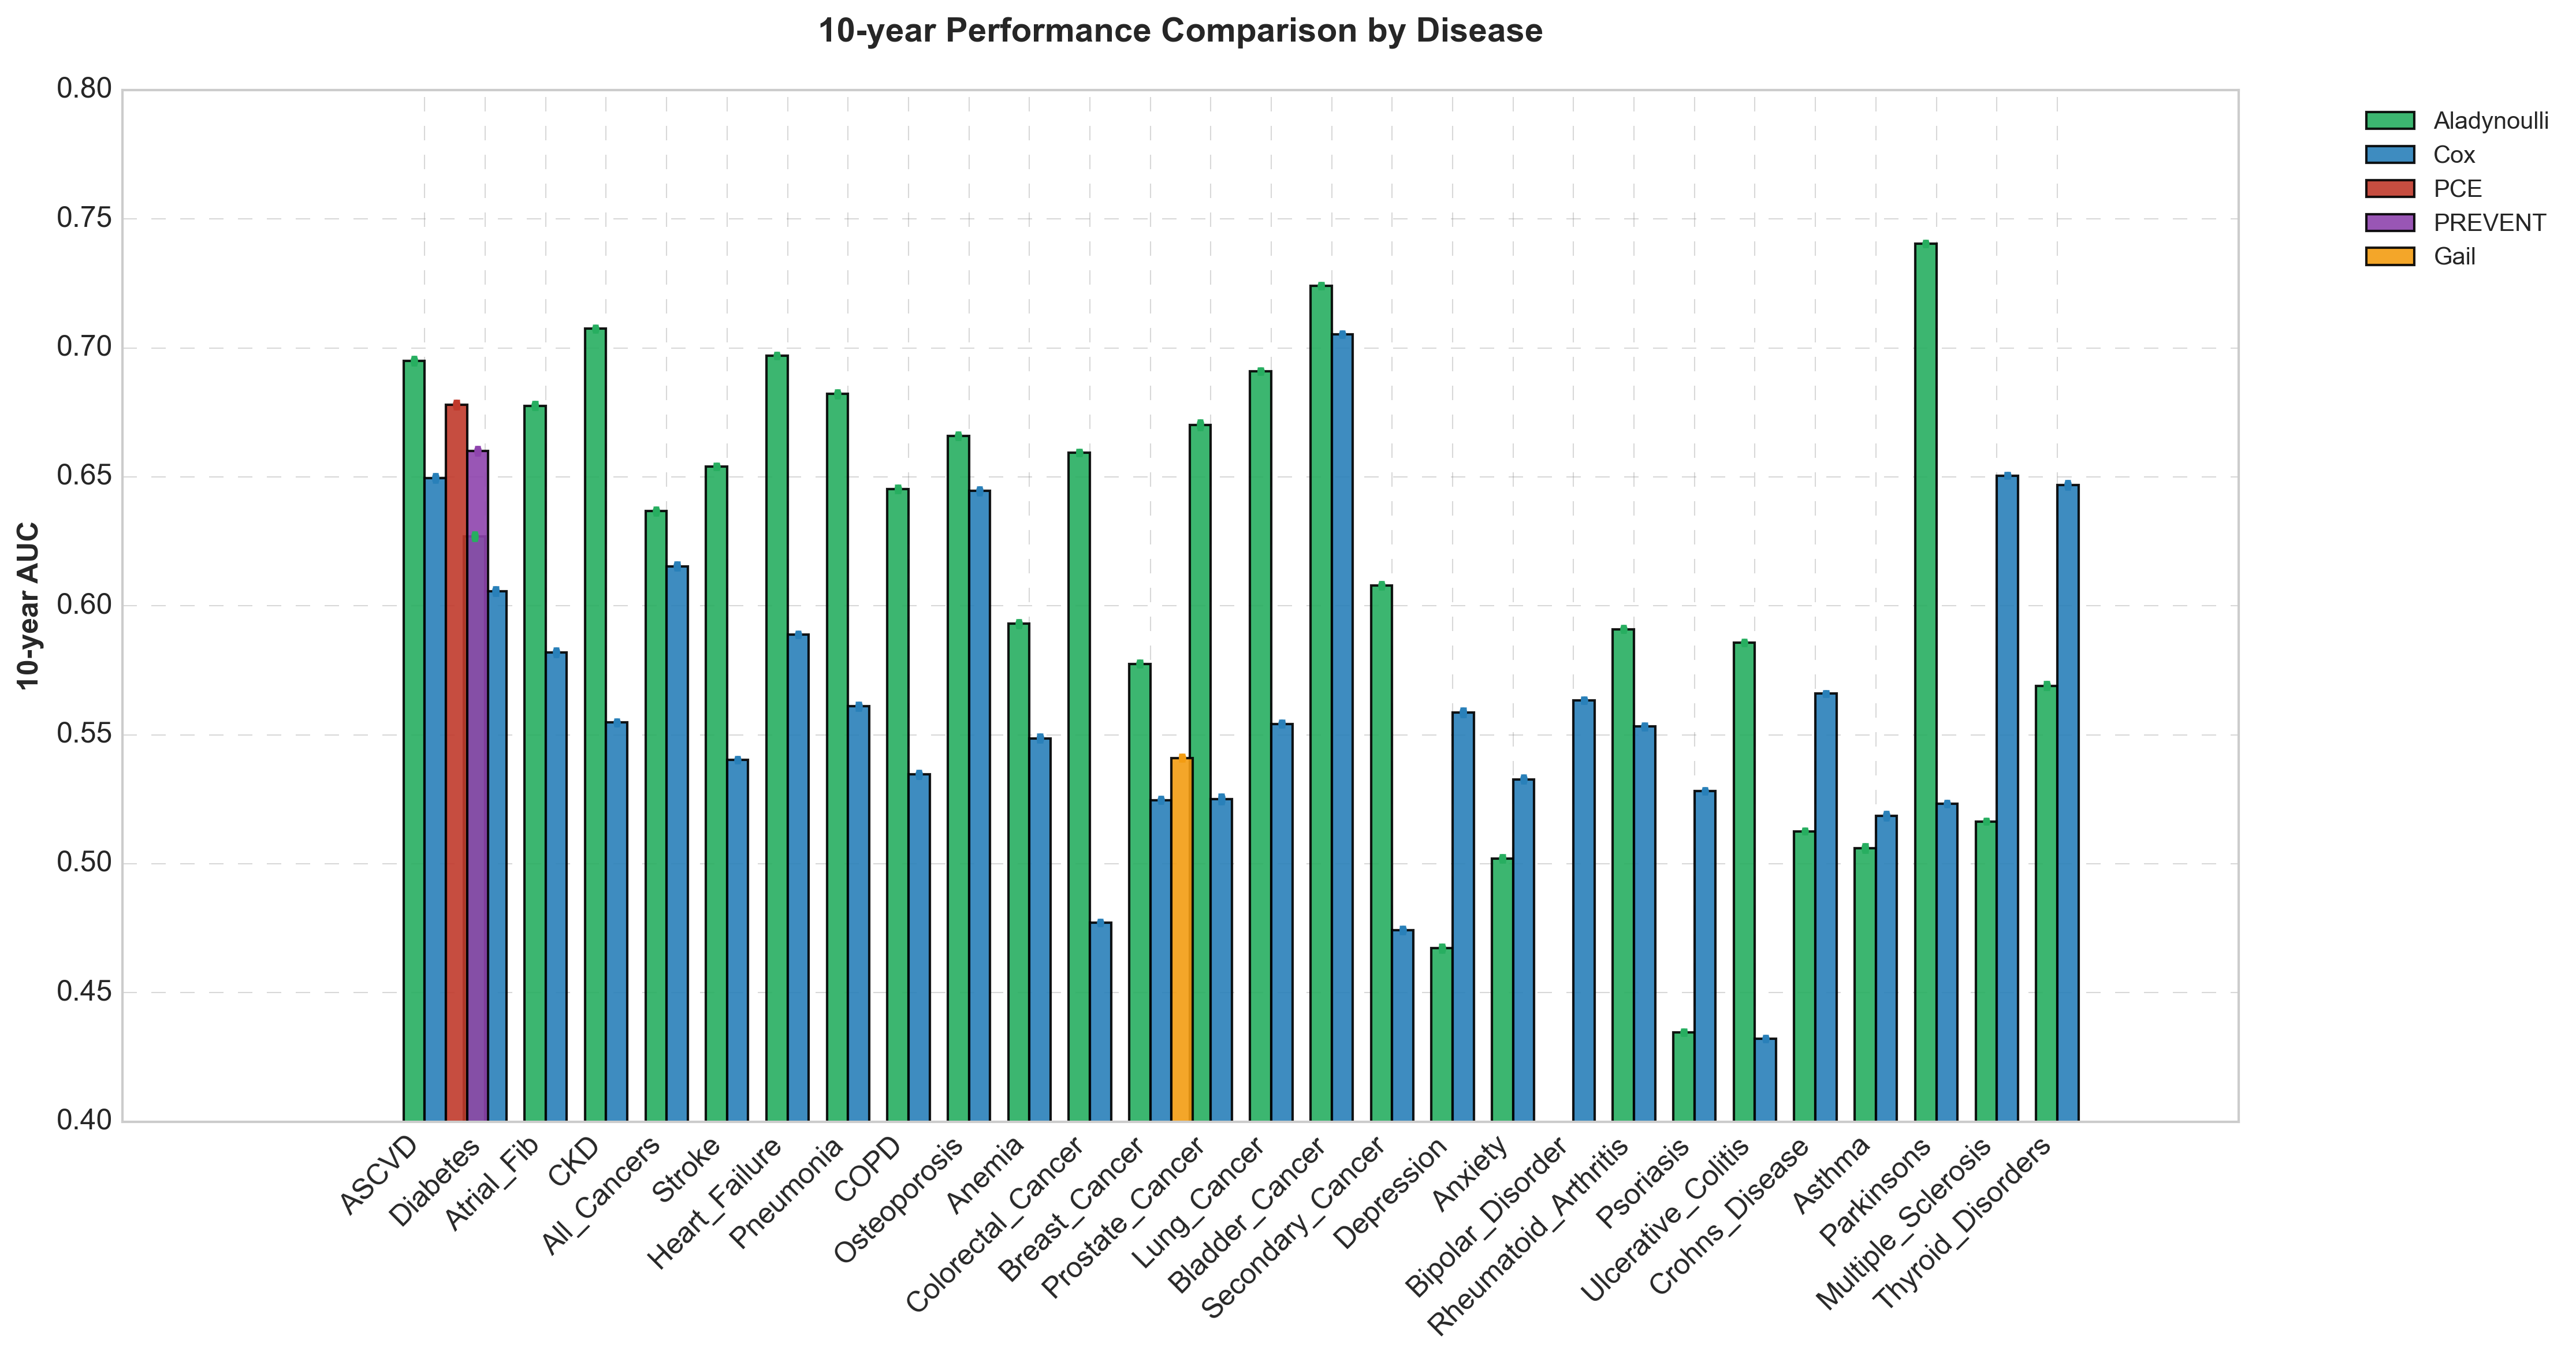

In [216]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Optional, Any 
from fig5utils import *
fig = plot_ten_year_comparison_bars(aladyn_results, 
                                    cox_results, 
                                    event_rate_results,
                                     major_diseases,
                                     save_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure5/ten_year_comparison_plot.pdf')

In [136]:
print("Aladynoulli results keys:", aladyn_results.keys())
print("Cox results keys:", cox_results.keys())
print("Event rate results keys:", event_rate_results.keys())

Aladynoulli results keys: dict_keys(['ASCVD', 'Diabetes', 'Atrial_Fib', 'CKD', 'All_Cancers', 'Stroke', 'Heart_Failure', 'Pneumonia', 'COPD', 'Osteoporosis', 'Anemia', 'Colorectal_Cancer', 'Breast_Cancer', 'Prostate_Cancer', 'Lung_Cancer', 'Bladder_Cancer', 'Secondary_Cancer', 'Depression', 'Anxiety', 'Bipolar_Disorder', 'Rheumatoid_Arthritis', 'Psoriasis', 'Ulcerative_Colitis', 'Crohns_Disease', 'Asthma', 'Parkinsons', 'Multiple_Sclerosis', 'Thyroid_Disorders'])
Cox results keys: dict_keys(['ASCVD', 'Diabetes', 'Atrial_Fib', 'CKD', 'All_Cancers', 'Stroke', 'Heart_Failure', 'Pneumonia', 'COPD', 'Osteoporosis', 'Anemia', 'Colorectal_Cancer', 'Breast_Cancer', 'Prostate_Cancer', 'Lung_Cancer', 'Bladder_Cancer', 'Secondary_Cancer', 'Depression', 'Anxiety', 'Bipolar_Disorder', 'Rheumatoid_Arthritis', 'Psoriasis', 'Ulcerative_Colitis', 'Crohns_Disease', 'Asthma', 'Parkinsons', 'Multiple_Sclerosis', 'Thyroid_Disorders'])
Event rate results keys: dict_keys(['ASCVD', 'Diabetes', 'Atrial_Fib', '

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_11863/1277519250.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkdl=torch.load("/Users/sarahurbut/Dropbox

torch.Size([10000, 348, 52])
torch.Size([10000, 348])
torch.Size([10000, 348])


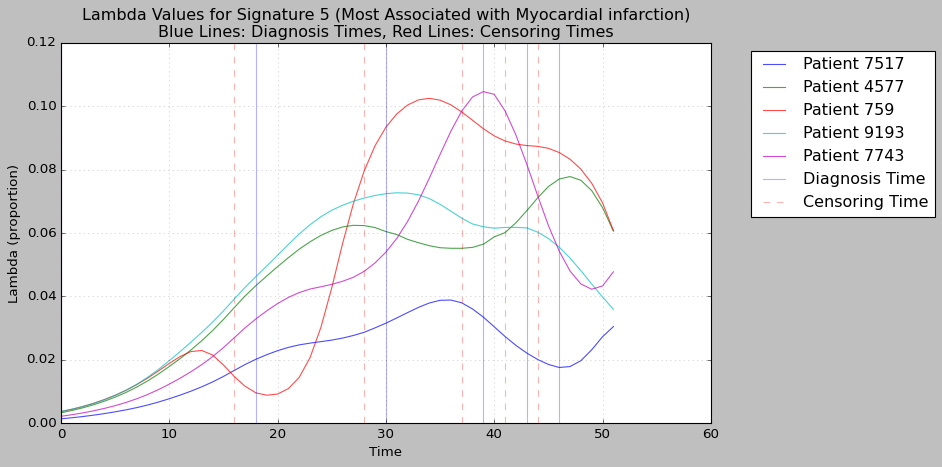

In [172]:
# Usage example:
from fig5utils import *
checkdl=torch.load("/Users/sarahurbut/Dropbox/model_with_kappa_bigam_2.pt")
model_dl=model
model_dl.load_state_dict(checkdl['model_state_dict'])

ascvd_indices = [111, 112, 113, 114, 115, 116]
print(Y_100k.shape)
print(E_100k.shape)
# Create censored event times
E_censored, censored_indices, original_event_times = create_censored_event_times(
     Y_100k, E_100k, ascvd_indices=ascvd_indices, censoring_window=2
)
print(E_censored.shape)


Y_test=Y_100k
patient_info = plot_disease_lambda_alignment_for_test(
     model_dl, Y_test, censored_indices, original_event_times, 
     disease_idx=112  # MI
)

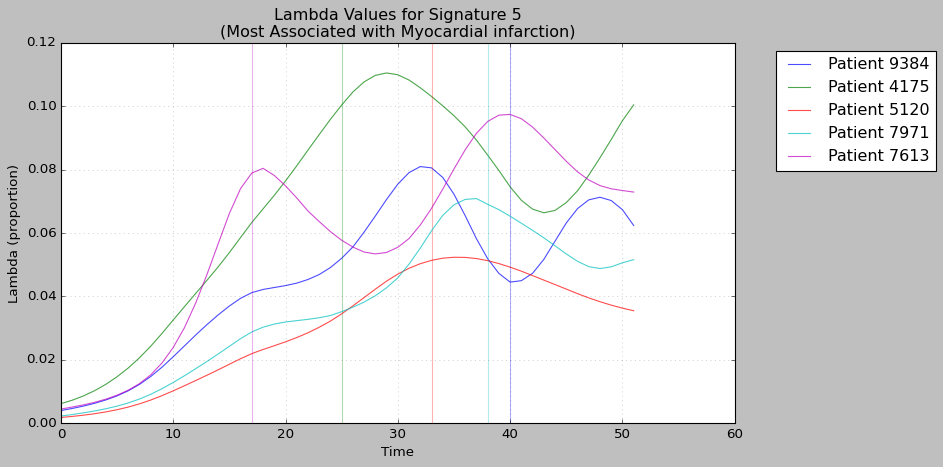

In [210]:
# List of patients to analyze
from fig5utils import *
patients = [9384, 4175, 5120, 7971, 7613]

# Create the plot
fig = analyze_specific_patients(model_dl, patients,
save_pdf='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure5/specific_patients_plot.pdf')


Analyzing Unstable Angina...
Found 198 cases and 100 controls


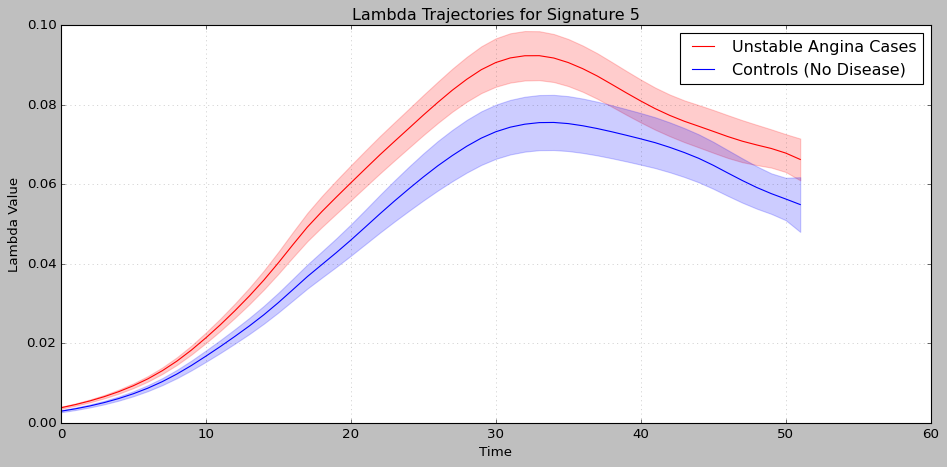

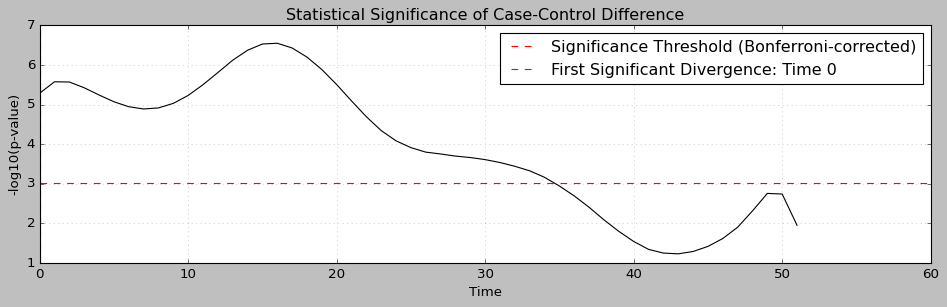

Trajectories significantly diverge at time 0
Average diagnosis time: 32.3
Average lead time: 32.3 time units

Analyzing Myocardial Infarction...
Found 635 cases and 100 controls


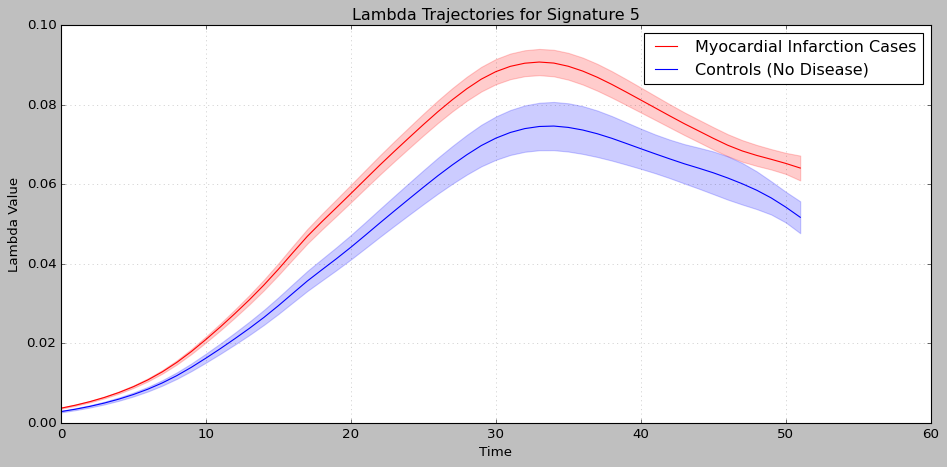

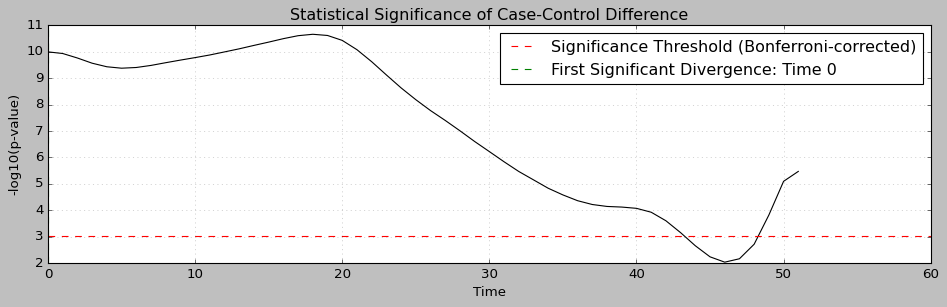

Trajectories significantly diverge at time 0
Average diagnosis time: 34.8
Average lead time: 34.8 time units

Analyzing Coronary Atherosclerosis...
Found 731 cases and 100 controls


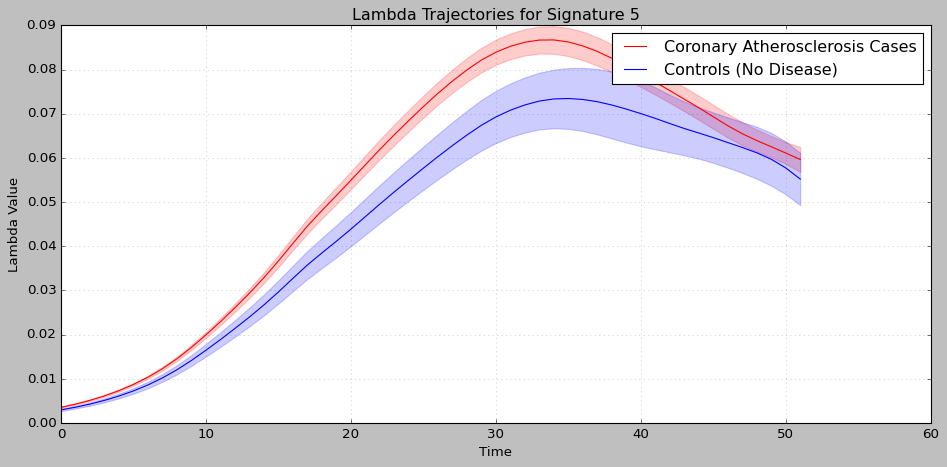

Trajectories significantly diverge at time 0
Average diagnosis time: 34.3
Average lead time: 34.3 time units

Analyzing Other Chronic Ischemic Heart Disease...
Found 847 cases and 100 controls


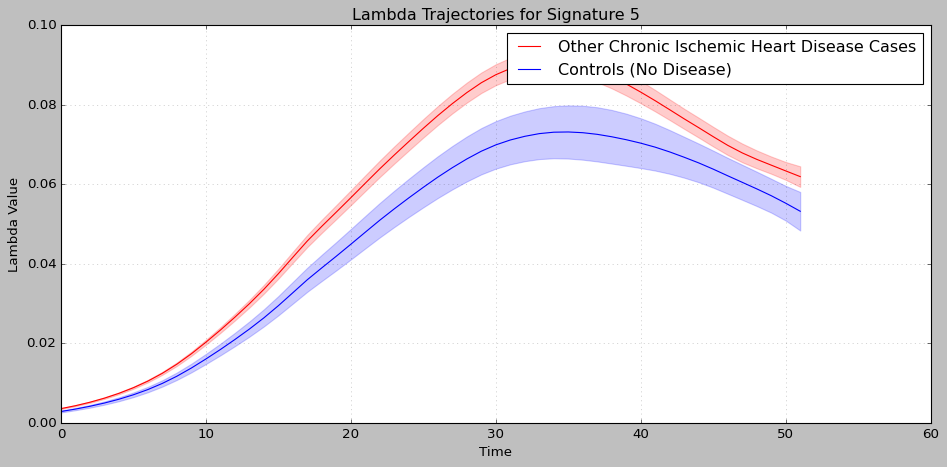

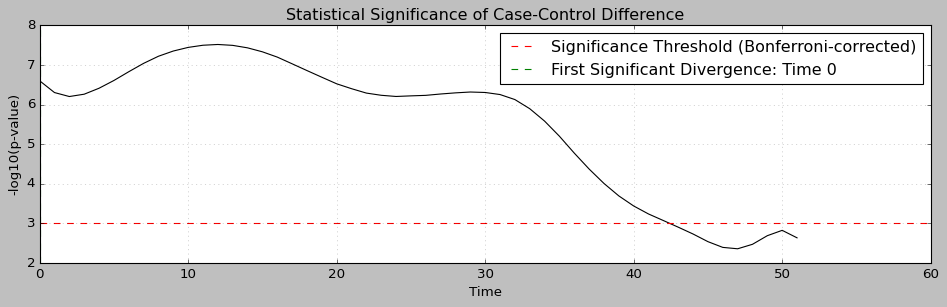

Trajectories significantly diverge at time 0
Average diagnosis time: 34.3
Average lead time: 34.3 time units

Analyzing Heart Failure...
Found 744 cases and 100 controls


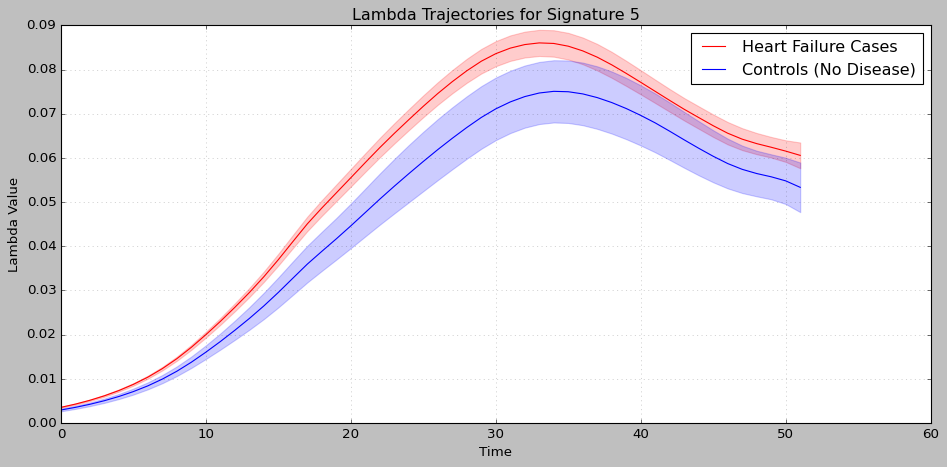

Trajectories significantly diverge at time 0
Average diagnosis time: 36.1
Average lead time: 36.1 time units

Analyzing Atrial Fibrillation...
Found 93 cases and 100 controls


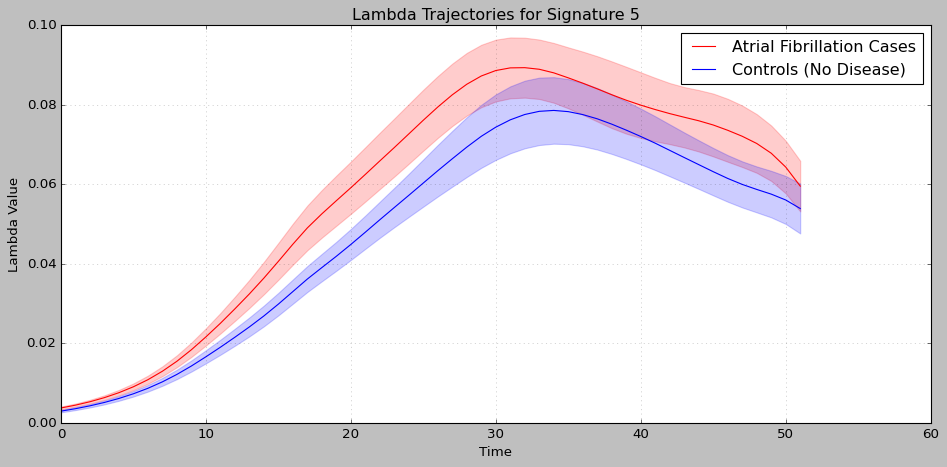

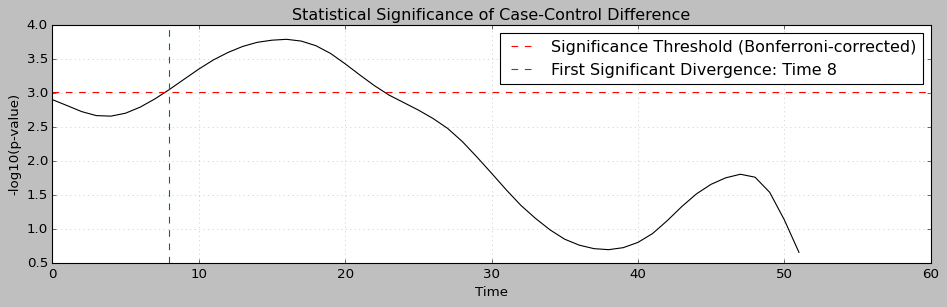

Trajectories significantly diverge at time 8
Average diagnosis time: 36.1
Average lead time: 28.1 time units


In [197]:
from  fig5utils import *
for disease_idx in [111, 112, 113, 114, 115, 116]:
    print(f"\nAnalyzing {get_disease_name(disease_idx)}...")
    compare_case_control_trajectories(model, Y_100k, disease_idx=disease_idx)

In [209]:
from fig5utils import *
fig = create_combined_mi_plots(model, Y_test, censored_indices, original_event_times)

# Optionally save to PDF
plt.savefig('/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure5/mi_trajectories_combined.pdf', bbox_inches='tight', dpi=300)

In [217]:
plot_ascvd_risk_comparison(n_batches=40, batch_size=10000, ascvd_indices=[111, 112, 113, 114, 115, 116])

/Users/sarahurbut/aladynoulli2/pyScripts/fig5utils.py:560: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(first_model_path)
/Users/sarahurbut/aladyno

Loaded prevalence_t from first model, shape: (348, 52)
Processing batches...
Processed batch 0 for predictions
Processed batch 1 for predictions
Processed batch 2 for predictions
Processed batch 3 for predictions
Processed batch 4 for predictions
Processed batch 5 for predictions
Processed batch 6 for predictions
Processed batch 7 for predictions
Processed batch 8 for predictions
Processed batch 9 for predictions
Processed batch 10 for predictions
Processed batch 11 for predictions
Processed batch 12 for predictions
Processed batch 13 for predictions
Processed batch 14 for predictions
Processed batch 15 for predictions
Processed batch 16 for predictions
Processed batch 17 for predictions
Processed batch 18 for predictions
Processed batch 19 for predictions
Processed batch 20 for predictions
Processed batch 21 for predictions
Processed batch 22 for predictions
Processed batch 23 for predictions
Processed batch 24 for predictions
Processed batch 25 for predictions
Processed batch 26 for 

(40     0.750738
 41     1.002469
 42     1.315740
 43     1.697156
 44     2.149208
 45     2.672515
 46     3.262303
 47     3.911304
 48     4.605620
 49     5.332103
 50     6.071465
 51     6.807099
 52     7.517794
 53     8.190776
 54     8.813304
 55     9.378895
 56     9.880095
 57    10.317180
 58    10.689321
 59    10.998984
 60    11.244161
 61    11.426126
 62    11.541025
 63    11.581147
 64    11.536525
 65    11.396853
 66    11.152010
 67    10.794563
 68    10.325526
 69     9.750450
 70     9.086648
 dtype: float64,
 array([0.6106291 , 0.80374641, 1.04147009, 1.32827071, 1.66611251,
        2.05595833, 2.49458643, 2.97659996, 3.4932697 , 4.03531316,
        4.58929369, 5.14383163, 5.68428096, 6.20137852, 6.68303646,
        7.12577882, 7.52172519, 7.86989079, 8.16726327, 8.41258107,
        8.60868828, 8.75227804, 8.84554198, 8.87824319, 8.84286676,
        8.7344715 , 8.54515961, 8.27067804, 7.91173073, 7.47857565,
        6.98347807]),
 array([ 0.82692488,  1.10